### SBS23038 CA2

In [169]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
import warnings

warnings.filterwarnings('ignore')

### API JSON Import

In [171]:
import requests

In [172]:
response = requests.get("https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%22STATISTIC%22,%22C02402V02895%22%5D,%22dimension%22:%7B%22STATISTIC%22:%7B%22category%22:%7B%22index%22:%5B%22BEQ04C04%22%5D%7D%7D,%22C02402V02895%22:%7B%22category%22:%7B%22index%22:%5B%22-%22%5D%7D%7D%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22JSON-stat%22,%22version%22:%222.0%22%7D,%22matrix%22:%22BEQ04%22%7D,%22version%22:%222.0%22%7D%7D").text

In [173]:
import json 

In [174]:
response_info = json.loads(response)

In [176]:
alt = requests.get("https://ws.cso.ie/public/api.jsonrpc?data=%7B%22jsonrpc%22:%222.0%22,%22method%22:%22PxStat.Data.Cube_API.ReadDataset%22,%22params%22:%7B%22class%22:%22query%22,%22id%22:%5B%22STATISTIC%22%5D,%22dimension%22:%7B%22STATISTIC%22:%7B%22category%22:%7B%22index%22:%5B%22BEQ04C04%22%5D%7D%7D%7D,%22extension%22:%7B%22pivot%22:null,%22codes%22:false,%22language%22:%7B%22code%22:%22en%22%7D,%22format%22:%7B%22type%22:%22JSON-stat%22,%22version%22:%222.0%22%7D,%22matrix%22:%22BEQ04%22%7D,%22version%22:%222.0%22%7D%7D").json()

In [177]:
json_dict = response_info['result']
json_dict.keys()

dict_keys(['class', 'dimension', 'extension', 'href', 'id', 'label', 'link', 'note', 'role', 'size', 'updated', 'value', 'version'])

In [178]:
json_dict_1 = json_dict['dimension']
json_dict_1.keys()

dict_keys(['STATISTIC', 'TLIST(Q1)', 'C02402V02895'])

In [179]:
label_keys = json_dict_1['TLIST(Q1)']
label = label_keys['category']

In [180]:
quarters_list = label['index']

In [181]:
json_dict.keys()

dict_keys(['class', 'dimension', 'extension', 'href', 'id', 'label', 'link', 'note', 'role', 'size', 'updated', 'value', 'version'])

In [182]:
vals = json_dict['value']
len(vals)

92

In [183]:
ie_prod_df = pd.DataFrame()
ie_prod_df['Date'] = quarters_list
ie_prod_df['Value'] = vals
ie_prod_df

Date       Value
0   20001  216.612217
1   20002  218.514305
2   20003  220.424981
3   20004  218.552402
4   20011  222.520017
..    ...         ...
87  20214  140.611706
88  20221  135.517776
89  20222  131.527912
90  20223  129.135626
91  20224  125.102539

[92 rows x 2 columns]

### Dataset Import

In [184]:
constr_costs = pd.read_excel('constr_costs_eu_1.xlsx', sheet_name = 'Sheet 1')
constr_costs.head()

Data extracted on 18/05/2023 21:45:20 from [ESTAT]  \
0                                          Dataset:    
1                                     Last updated:    
2                                                NaN   
3                                     Time frequency   
4                           Business trend indicator   

                                          Unnamed: 1  \
0  Construction producer prices or costs, new res...   
1                                   17/05/2023 11:00   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          Unnamed: 2 Unnamed: 3  Unnamed: 4  \
0                                                NaN        NaN         NaN   
1                                                NaN        NaN         NaN   
2                                                NaN        NaN         NaN   
3                                          Quarterly        NaN         NaN   
4  Output price index in construction - in nation...        NaN         NaN   

  Unnamed: 5  Unnamed: 6 Unnamed: 7  Unnamed: 8 Unnamed: 9  ...  Unnamed: 546  \
0        NaN         NaN        NaN         NaN        NaN  ...           NaN   
1        NaN         NaN        NaN         NaN        NaN  ...           NaN   
2        NaN         NaN        NaN         NaN        NaN  ...           NaN   
3        NaN         NaN        NaN         NaN        NaN  ...           NaN   
4        NaN         NaN        NaN         NaN        NaN  ...           NaN   

  Unnamed: 547  Unnamed: 548 Unnamed: 549  Unnamed: 550 Unnamed: 551  \
0          NaN           NaN          NaN           NaN          NaN   
1          NaN           NaN          NaN           NaN          NaN   
2          NaN           NaN          NaN           NaN          NaN   
3          NaN           NaN          NaN           NaN          NaN   
4          NaN           NaN          NaN           NaN          NaN   

   Unnamed: 552 Unnamed: 553  Unnamed: 554 Unnamed: 555  
0           NaN          NaN           NaN          NaN  
1           NaN          NaN           NaN          NaN  
2           NaN          NaN           NaN          NaN  
3           NaN          NaN           NaN          NaN  
4           NaN          NaN           NaN          NaN  

[5 rows x 556 columns]

In [185]:
labour_input = pd.read_excel('labour_input.xlsx', sheet_name = 'Sheet 1')
labour_input.head()

Data extracted on 18/05/2023 21:51:41 from [ESTAT]  \
0                                          Dataset:    
1                                     Last updated:    
2                                                NaN   
3                                     Time frequency   
4                           Business trend indicator   

                                          Unnamed: 1  \
0  Labour input in construction - quarterly data ...   
1                                   18/05/2023 11:00   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                Unnamed: 2 Unnamed: 3  Unnamed: 4 Unnamed: 5  \
0                                      NaN        NaN         NaN        NaN   
1                                      NaN        NaN         NaN        NaN   
2                                      NaN        NaN         NaN        NaN   
3                                Quarterly        NaN         NaN        NaN   
4  Employment (number of persons employed)        NaN         NaN        NaN   

   Unnamed: 6 Unnamed: 7  Unnamed: 8 Unnamed: 9  ...  Unnamed: 259  \
0         NaN        NaN         NaN        NaN  ...           NaN   
1         NaN        NaN         NaN        NaN  ...           NaN   
2         NaN        NaN         NaN        NaN  ...           NaN   
3         NaN        NaN         NaN        NaN  ...           NaN   
4         NaN        NaN         NaN        NaN  ...           NaN   

  Unnamed: 260  Unnamed: 261 Unnamed: 262  Unnamed: 263 Unnamed: 264  \
0          NaN           NaN          NaN           NaN          NaN   
1          NaN           NaN          NaN           NaN          NaN   
2          NaN           NaN          NaN           NaN          NaN   
3          NaN           NaN          NaN           NaN          NaN   
4          NaN           NaN          NaN           NaN          NaN   

   Unnamed: 265 Unnamed: 266  Unnamed: 267 Unnamed: 268  
0           NaN          NaN           NaN          NaN  
1           NaN          NaN           NaN          NaN  
2           NaN          NaN           NaN          NaN  
3           NaN          NaN           NaN          NaN  
4           NaN          NaN           NaN          NaN  

[5 rows x 269 columns]

In [186]:
constr_prod = pd.read_excel('production_1.xlsx', sheet_name = 'Sheet 1')
constr_prod.head()

Data extracted on 18/05/2023 21:47:11 from [ESTAT]  \
0                                          Dataset:    
1                                     Last updated:    
2                                                NaN   
3                                     Time frequency   
4                           Business trend indicator   

                                          Unnamed: 1  \
0  Production in construction - monthly data [STS...   
1                                   17/05/2023 11:00   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                   Unnamed: 2 Unnamed: 3  Unnamed: 4 Unnamed: 5  Unnamed: 6  \
0                         NaN        NaN         NaN        NaN         NaN   
1                         NaN        NaN         NaN        NaN         NaN   
2                         NaN        NaN         NaN        NaN         NaN   
3                     Monthly        NaN         NaN        NaN         NaN   
4  Volume index of production        NaN         NaN        NaN         NaN   

  Unnamed: 7  Unnamed: 8 Unnamed: 9  ...  Unnamed: 1029 Unnamed: 1030  \
0        NaN         NaN        NaN  ...            NaN           NaN   
1        NaN         NaN        NaN  ...            NaN           NaN   
2        NaN         NaN        NaN  ...            NaN           NaN   
3        NaN         NaN        NaN  ...            NaN           NaN   
4        NaN         NaN        NaN  ...            NaN           NaN   

   Unnamed: 1031 Unnamed: 1032  Unnamed: 1033 Unnamed: 1034  Unnamed: 1035  \
0            NaN           NaN            NaN           NaN            NaN   
1            NaN           NaN            NaN           NaN            NaN   
2            NaN           NaN            NaN           NaN            NaN   
3            NaN           NaN            NaN           NaN            NaN   
4            NaN           NaN            NaN           NaN            NaN   

  Unnamed: 1036  Unnamed: 1037 Unnamed: 1038  
0           NaN            NaN           NaN  
1           NaN            NaN           NaN  
2           NaN            NaN           NaN  
3           NaN            NaN           NaN  
4           NaN            NaN           NaN  

[5 rows x 1039 columns]

In [187]:
def clean_eurostat_df(init_df_raw):
    init_df_corr = init_df_raw.iloc[9:,:]
    cols = [init_df_corr.iloc[0,:]]
    init_df_corr.columns = cols
    init_df = init_df_corr.iloc[2:9,:]
    init_df = init_df[init_df.columns.dropna()]
    init_df = init_df.T
    cols2 = [init_df.iloc[0,:]]
    init_df.columns = cols2
    init_df = init_df.iloc[1:,:]
    init_df.columns = init_df.columns.map(''.join)
    
    dates = init_df.index
    init_df['ind'] = None
    for x in range(0,len(dates)):
        init_df['ind'][x] = dates[x][0]
    init_df = init_df.reset_index(level=0, drop=True)
    init_df = init_df.replace(':', np.NaN)
    return init_df

In [188]:
constr_costs_df = clean_eurostat_df(constr_costs)
#test = constr_costs_df.index
#constr_costs_df.reset_index(level=0, drop=True)
constr_costs_df.head()

European Union - 27 countries (from 2020)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Euro area – 20 countries (from 2023)  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   Germany (until 1990 former territory of the FRG)  Ireland  France  \
0                                               NaN      NaN     6.2   
1                                               NaN      NaN     6.1   
2                                               NaN      NaN     6.2   
3                                               NaN      NaN     6.0   
4                                               NaN      NaN     6.0   

   Netherlands  United Kingdom      ind  
0          NaN             NaN  1953-Q4  
1          NaN             NaN  1954-Q1  
2          NaN             NaN  1954-Q2  
3          NaN             NaN  1954-Q3  
4          NaN             NaN  1954-Q4

In [189]:
print('The shape of the construction costs dataset is:', constr_costs_df.shape)

The shape of the construction costs dataset is: (278, 8)


In [190]:
constr_costs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   European Union - 27 countries (from 2020)         114 non-null    float64
 1   Euro area – 20 countries (from 2023)              172 non-null    float64
 2   Germany (until 1990 former territory of the FRG)  213 non-null    float64
 3   Ireland                                           93 non-null     float64
 4   France                                            277 non-null    float64
 5   Netherlands                                       72 non-null     float64
 6   United Kingdom                                    111 non-null    float64
 7   ind                                               278 non-null    object 
dtypes: float64(7), object(1)
memory usage: 17.5+ KB


In [191]:
labour_input_df = clean_eurostat_df(labour_input)
labour_input_df.head()

European Union - 27 countries (from 2020)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Euro area – 20 countries (from 2023)  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   Germany (until 1990 former territory of the FRG)  Ireland  France  \
0                                               NaN      NaN   104.0   
1                                               NaN      NaN   104.1   
2                                               NaN      NaN   105.1   
3                                               NaN      NaN   105.1   
4                                               NaN      NaN   104.6   

   United Kingdom  Netherlands      ind  
0             NaN          NaN  1989-Q4  
1             NaN          NaN  1990-Q1  
2             NaN          NaN  1990-Q2  
3             NaN          NaN  1990-Q3  
4             NaN          NaN  1990-Q4

In [192]:
print('The shape of the labour input in construction dataset is:', labour_input_df.shape)

The shape of the labour input in construction dataset is: (134, 8)


In [193]:
labour_input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   European Union - 27 countries (from 2020)         92 non-null     float64
 1   Euro area – 20 countries (from 2023)              92 non-null     float64
 2   Germany (until 1990 former territory of the FRG)  92 non-null     float64
 3   Ireland                                           92 non-null     float64
 4   France                                            134 non-null    float64
 5   United Kingdom                                    99 non-null     float64
 6   Netherlands                                       111 non-null    float64
 7   ind                                               134 non-null    object 
dtypes: float64(7), object(1)
memory usage: 8.5+ KB


In [194]:
constr_prod_df = clean_eurostat_df(constr_prod)
constr_prod_df.head()

European Union - 27 countries (from 2020)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   Euro area – 20 countries (from 2023)  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   Germany (until 1990 former territory of the FRG)  Ireland  France  \
0                                               NaN      NaN     NaN   
1                                               NaN      NaN     NaN   
2                                               NaN      NaN     NaN   
3                                               NaN      NaN     NaN   
4                                               NaN      NaN     NaN   

   Netherlands  United Kingdom      ind  
0          NaN             NaN  1980-01  
1          NaN             NaN  1980-02  
2          NaN             NaN  1980-03  
3          NaN             NaN  1980-04  
4          NaN             NaN  1980-05

In [195]:
print('The shape of the production in construction dataset is:', constr_prod_df.shape)

The shape of the production in construction dataset is: (519, 8)


In [196]:
constr_prod_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 8 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   European Union - 27 countries (from 2020)         338 non-null    float64
 1   Euro area – 20 countries (from 2023)              338 non-null    float64
 2   Germany (until 1990 former territory of the FRG)  387 non-null    float64
 3   Ireland                                           0 non-null      float64
 4   France                                            399 non-null    float64
 5   Netherlands                                       279 non-null    float64
 6   United Kingdom                                    298 non-null    float64
 7   ind                                               519 non-null    object 
dtypes: float64(7), object(1)
memory usage: 32.6+ KB


In [197]:
constr_prod_df = constr_prod_df.iloc[2::3,:]
constr_prod_df = constr_prod_df.reset_index()
constr_prod_df.head()

index  European Union - 27 countries (from 2020)  \
0      2                                        NaN   
1      5                                        NaN   
2      8                                        NaN   
3     11                                        NaN   
4     14                                        NaN   

   Euro area – 20 countries (from 2023)  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   Germany (until 1990 former territory of the FRG)  Ireland  France  \
0                                               NaN      NaN     NaN   
1                                               NaN      NaN     NaN   
2                                               NaN      NaN     NaN   
3                                               NaN      NaN     NaN   
4                                               NaN      NaN     NaN   

   Netherlands  United Kingdom      ind  
0          NaN             NaN  1980-03  
1          NaN             NaN  1980-06  
2          NaN             NaN  1980-09  
3          NaN             NaN  1980-12  
4          NaN             NaN  1981-03

In [198]:
empty = []
for x in range(0,len(constr_prod_df.ind)):
    empty.append(constr_prod_df.ind[x][0]+constr_prod_df.ind[x][1]+constr_prod_df.ind[x][2]+
                 constr_prod_df.ind[x][3]+constr_prod_df.ind[x][4]+'Q'+constr_prod_df.ind[x][6])

In [199]:
empty_1 = []
for x in range(0,len(empty)):
    if empty[x][len(empty[x])-1] == '3':
        empty_1.append(empty[x][0]+empty[x][1]+empty[x][2]+empty[x][3]+empty[x][4]+empty[x][5]+'1')
    if empty[x][len(empty[x])-1] == '6':
        empty_1.append(empty[x][0]+empty[x][1]+empty[x][2]+empty[x][3]+empty[x][4]+empty[x][5]+'2')
    if empty[x][len(empty[x])-1] == '9':
        empty_1.append(empty[x][0]+empty[x][1]+empty[x][2]+empty[x][3]+empty[x][4]+empty[x][5]+'3')
    if empty[x][len(empty[x])-1] == '2':
        empty_1.append(empty[x][0]+empty[x][1]+empty[x][2]+empty[x][3]+empty[x][4]+empty[x][5]+'4')

In [200]:
constr_prod_df['new_ind'] = empty_1
constr_prod_df.head()

index  European Union - 27 countries (from 2020)  \
0      2                                        NaN   
1      5                                        NaN   
2      8                                        NaN   
3     11                                        NaN   
4     14                                        NaN   

   Euro area – 20 countries (from 2023)  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   Germany (until 1990 former territory of the FRG)  Ireland  France  \
0                                               NaN      NaN     NaN   
1                                               NaN      NaN     NaN   
2                                               NaN      NaN     NaN   
3                                               NaN      NaN     NaN   
4                                               NaN      NaN     NaN   

   Netherlands  United Kingdom      ind  new_ind  
0          NaN             NaN  1980-03  1980-Q1  
1          NaN             NaN  1980-06  1980-Q2  
2          NaN             NaN  1980-09  1980-Q3  
3          NaN             NaN  1980-12  1980-Q4  
4          NaN             NaN  1981-03  1981-Q1

In [201]:
empty_2 = []
for x in range(0,len(ie_prod_df)):
    empty_2.append(ie_prod_df.Date[x][0]+ie_prod_df.Date[x][1]+ie_prod_df.Date[x][2]+ie_prod_df.Date[x][3]
                   +'-'+'Q'+ie_prod_df.Date[x][4]) 

In [202]:
ie_prod_df['new_ind'] = empty_2

In [203]:
constr_prod_df.head()

index  European Union - 27 countries (from 2020)  \
0      2                                        NaN   
1      5                                        NaN   
2      8                                        NaN   
3     11                                        NaN   
4     14                                        NaN   

   Euro area – 20 countries (from 2023)  \
0                                   NaN   
1                                   NaN   
2                                   NaN   
3                                   NaN   
4                                   NaN   

   Germany (until 1990 former territory of the FRG)  Ireland  France  \
0                                               NaN      NaN     NaN   
1                                               NaN      NaN     NaN   
2                                               NaN      NaN     NaN   
3                                               NaN      NaN     NaN   
4                                               NaN      NaN     NaN   

   Netherlands  United Kingdom      ind  new_ind  
0          NaN             NaN  1980-03  1980-Q1  
1          NaN             NaN  1980-06  1980-Q2  
2          NaN             NaN  1980-09  1980-Q3  
3          NaN             NaN  1980-12  1980-Q4  
4          NaN             NaN  1981-03  1981-Q1

In [204]:
constr_prod_df_join = constr_prod_df.merge(ie_prod_df, on='new_ind', how='left')

In [205]:
constr_prod_df_join['Ireland'] = constr_prod_df_join.Value

In [206]:
constr_prod_df_join = constr_prod_df_join.drop(['index','Value'],axis=1)

In [207]:
print('The shape of the production in construction dataset is:', constr_prod_df_join.shape)

The shape of the production in construction dataset is: (173, 10)


In [208]:
constr_prod_df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   European Union - 27 countries (from 2020)         112 non-null    float64
 1   Euro area – 20 countries (from 2023)              112 non-null    float64
 2   Germany (until 1990 former territory of the FRG)  129 non-null    float64
 3   Ireland                                           92 non-null     float64
 4   France                                            133 non-null    float64
 5   Netherlands                                       93 non-null     float64
 6   United Kingdom                                    99 non-null     float64
 7   ind                                               173 non-null    object 
 8   new_ind                                           173 non-null    object 
 9   Date                 

In [47]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [48]:
p_val_pearson = calculate_pvalues(constr_prod_df_join.iloc[:,[2,5,6]])
p_val_pearson.to_csv('p_val_pearson.csv')

In [49]:
constr_prod_df.corr()

index  \
index                                             1.000000   
European Union - 27 countries (from 2020)        -0.302358   
Euro area – 20 countries (from 2023)             -0.650859   
Germany (until 1990 former territory of the FRG) -0.335781   
Ireland                                                NaN   
France                                           -0.262106   
Netherlands                                       0.406277   
United Kingdom                                    0.786238   

                                                  European Union - 27 countries (from 2020)  \
index                                                                             -0.302358   
European Union - 27 countries (from 2020)                                          1.000000   
Euro area – 20 countries (from 2023)                                               0.916185   
Germany (until 1990 former territory of the FRG)                                  -0.038837   
Ireland                                                                                 NaN   
France                                                                             0.691474   
Netherlands                                                                        0.561304   
United Kingdom                                                                    -0.063682   

                                                  Euro area – 20 countries (from 2023)  \
index                                                                        -0.650859   
European Union - 27 countries (from 2020)                                     0.916185   
Euro area – 20 countries (from 2023)                                          1.000000   
Germany (until 1990 former territory of the FRG)                             -0.002472   
Ireland                                                                            NaN   
France                                                                        0.671621   
Netherlands                                                                   0.312336   
United Kingdom                                                               -0.319890   

                                                  Germany (until 1990 former territory of the FRG)  \
index                                                                                    -0.335781   
European Union - 27 countries (from 2020)                                                -0.038837   
Euro area – 20 countries (from 2023)                                                     -0.002472   
Germany (until 1990 former territory of the FRG)                                          1.000000   
Ireland                                                                                        NaN   
France                                                                                   -0.493911   
Netherlands                                                                               0.499012   
United Kingdom                                                                           -0.239085   

                                                  Ireland    France  \
index                                                 NaN -0.262106   
European Union - 27 countries (from 2020)             NaN  0.691474   
Euro area – 20 countries (from 2023)                  NaN  0.671621   
Germany (until 1990 former territory of the FRG)      NaN -0.493911   
Ireland                                               NaN       NaN   
France                                                NaN  1.000000   
Netherlands                                           NaN -0.050935   
United Kingdom                                        NaN  0.015895   

                                                  Netherlands  United Kingdom  
index                                                0.406277        0.786238  
European Union - 27 countries (from 2020)            0.561304       -0.063682  
Euro area – 20 countries (fr

In [50]:
prod_desc_stats = constr_prod_df_join.describe()
prod_desc_stats.to_csv('prod_desc_stats.csv')

In [51]:
col1 = constr_prod_df_join[prod_desc_stats.columns[0]]
col2 = constr_prod_df_join[prod_desc_stats.columns[1]]
col3 = constr_prod_df_join[prod_desc_stats.columns[2]]
col4 = constr_prod_df_join[prod_desc_stats.columns[3]]
col5 = constr_prod_df_join[prod_desc_stats.columns[4]]
col6 = constr_prod_df_join[prod_desc_stats.columns[5]]
col7 = constr_prod_df_join[prod_desc_stats.columns[6]]

In [52]:
prod_desc_stats.columns[3]

'Ireland'

In [53]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(col4[~np.isnan(col4)], col7[~np.isnan(col7)])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=7604.000, p=0.000
Probably different distributions


In [54]:
from scipy.stats import f_oneway
f_oneway(col1[~np.isnan(col1)],col2[~np.isnan(col2)],
             col3[~np.isnan(col3)],col4[~np.isnan(col4)],
             col5[~np.isnan(col5)],col6[~np.isnan(col6)],
             col7[~np.isnan(col7)])

F_onewayResult(statistic=66.08152955949818, pvalue=4.008956567614588e-66)

In [55]:
col1 = col1[~np.isnan(col1)]

In [56]:
from scipy import stats 
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(col4[~np.isnan(col4)], popmean=col1.mean())
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  7.090258775527332
P-Value:  2.7949264441335196e-10


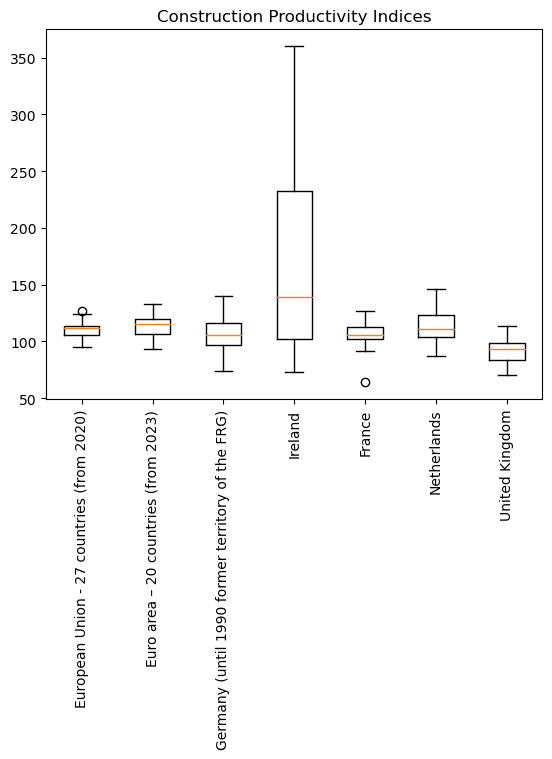

In [57]:
plt.boxplot([col1[~np.isnan(col1)],col2[~np.isnan(col2)],
             col3[~np.isnan(col3)],col4[~np.isnan(col4)],
             col5[~np.isnan(col5)],col6[~np.isnan(col6)],
             col7[~np.isnan(col7)]])
plt.title('Construction Productivity Indices')
labels = (list(constr_prod_df_join.columns[0:7]))
plt.xticks(np.arange(len(labels))+1,labels, rotation ='vertical')
plt.show()

In [58]:
constr_costs_stats = constr_costs_df.describe()
constr_costs_stats.to_csv('costs_desc_stats.csv')

In [59]:
col1 = constr_costs_df[constr_costs_df.columns[0]]
col2 = constr_costs_df[constr_costs_df.columns[1]]
col3 = constr_costs_df[constr_costs_df.columns[2]]
col4 = constr_costs_df[constr_costs_df.columns[3]]
col5 = constr_costs_df[constr_costs_df.columns[4]]
col6 = constr_costs_df[constr_costs_df.columns[5]]
col7 = constr_costs_df[constr_costs_df.columns[6]]

In [60]:
from scipy import stats 
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(col4[~np.isnan(col4)], popmean=col1.mean())
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  6.747570579906807
P-Value:  1.3122808018882672e-09


European Union - 27 countries (from 2020)  \
European Union - 27 countries (from 2020)                                          1.000000   
Euro area – 20 countries (from 2023)                                               0.999892   
Germany (until 1990 former territory of the FRG)                                   0.942070   
Ireland                                                                            0.714171   
France                                                                             0.987600   
Netherlands                                                                        0.646009   
United Kingdom                                                                     0.982787   

                                                  Euro area – 20 countries (from 2023)  \
European Union - 27 countries (from 2020)                                     0.999892   
Euro area – 20 countries (from 2023)                                          1.000000   
Germany (until 1990 former territory of the FRG)                              0.975065   
Ireland                                                                       0.714470   
France                                                                        0.991254   
Netherlands                                                                   0.649088   
United Kingdom                                                                0.981360   

                                                  Germany (until 1990 former territory of the FRG)  \
European Union - 27 countries (from 2020)                                                 0.942070   
Euro area – 20 countries (from 2023)                                                      0.975065   
Germany (until 1990 former territory of the FRG)                                          1.000000   
Ireland                                                                                   0.644003   
France                                                                                    0.972394   
Netherlands                                                                               0.654510   
United Kingdom                                                                            0.884233   

                                                   Ireland    France  \
European Union - 27 countries (from 2020)         0.714171  0.987600   
Euro area – 20 countries (from 2023)              0.714470  0.991254   
Germany (until 1990 former territory of the FRG)  0.644003  0.972394   
Ireland                                           1.000000  0.719685   
France                                            0.719685  1.000000   
Netherlands                                       0.685431  0.552234   
United Kingdom                                    0.641553  0.980937   

                                                  Netherlands  United Kingdom  
European Union - 27 countries (from 2020)            0.646009        0.982787  
Euro area – 20 countries (from 2023)                 0.649088        0.981360  
Germany (until 1990 former territory of the FRG)     0.654510        0.884233  
Ireland                                              0.685431        0.641553  
France                                               0.552234        0.980937  
Netherlands                                          1.000000        0.104282  
United Kingdom                                       0.104282        1.000000

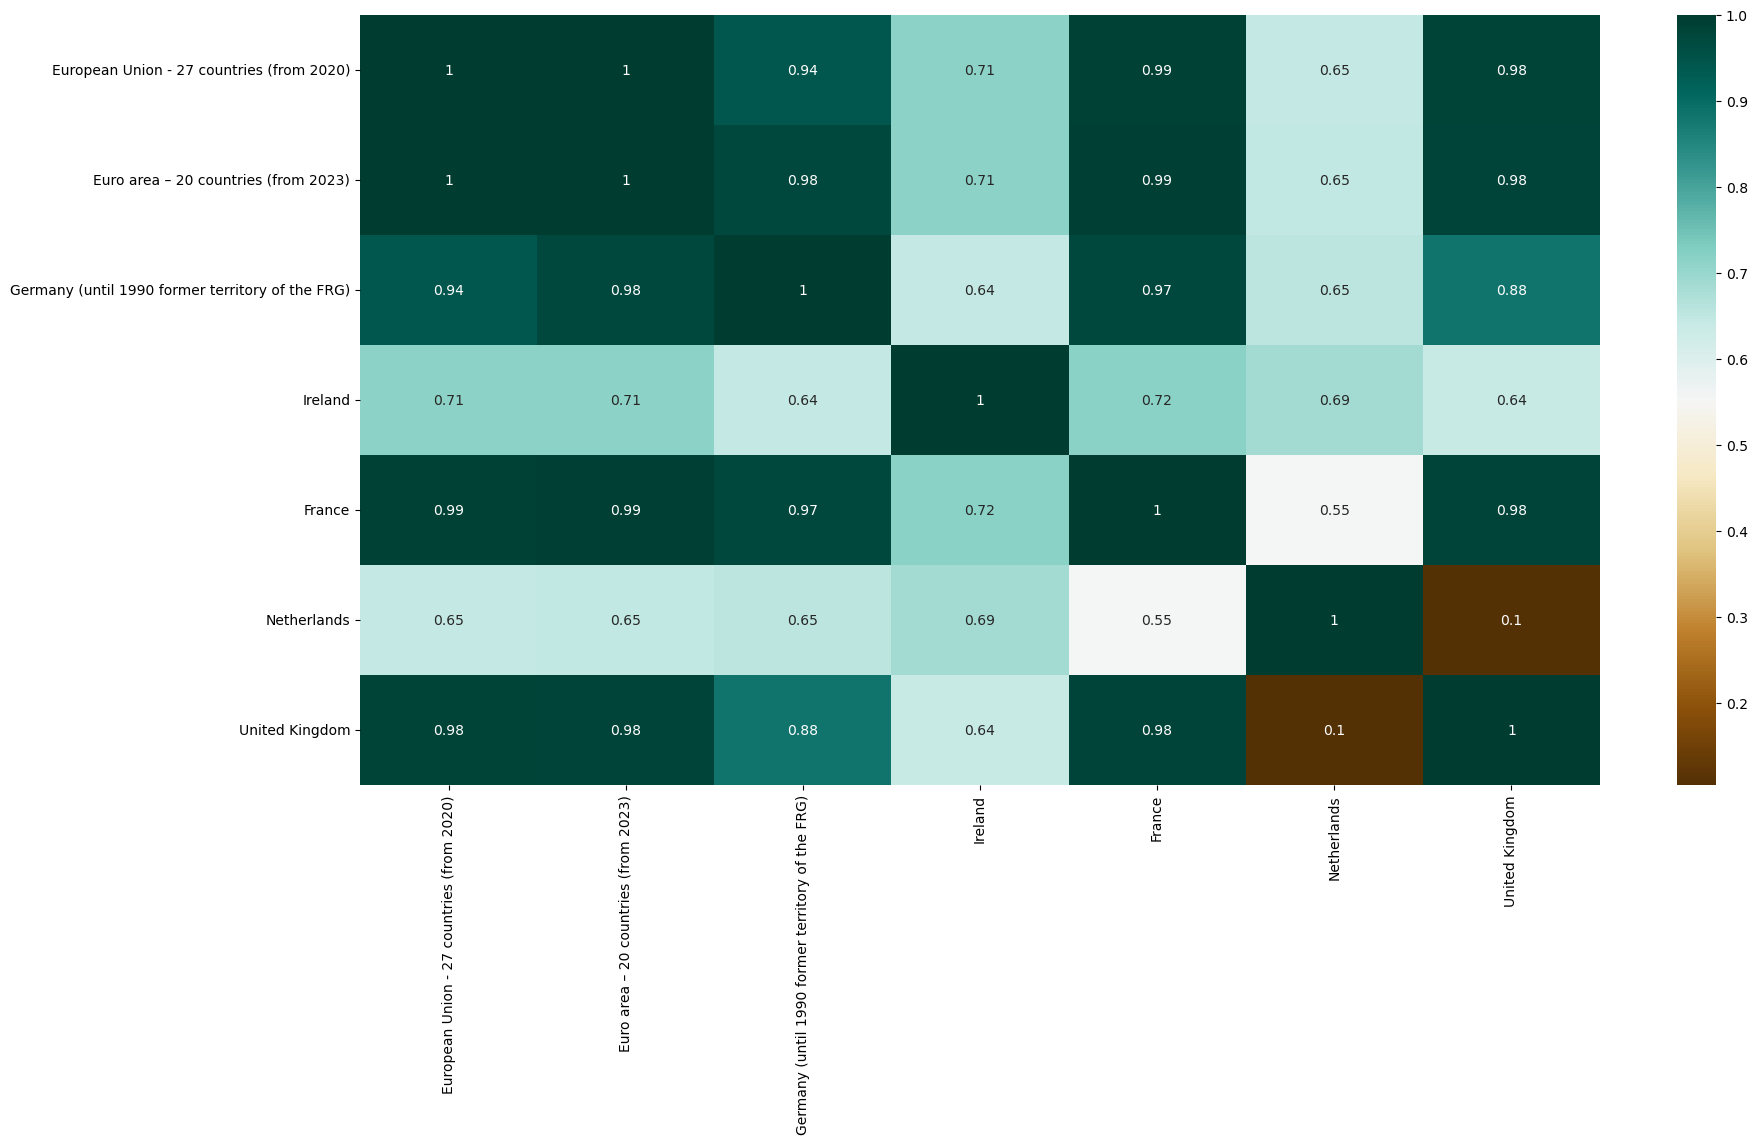

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
c= constr_costs_df.corr()
plot = sns.heatmap(c,cmap="BrBG",annot=True)
c

In [62]:
calculate_pvalues(constr_costs_df.iloc[:,0:7])

European Union - 27 countries (from 2020)  \
European Union - 27 countries (from 2020)                                              0.0   
Euro area – 20 countries (from 2023)                                                   0.0   
Germany (until 1990 former territory of the FRG)                                       0.0   
Ireland                                                                                0.0   
France                                                                                 0.0   
Netherlands                                                                            0.0   
United Kingdom                                                                         0.0   

                                                 Euro area – 20 countries (from 2023)  \
European Union - 27 countries (from 2020)                                         0.0   
Euro area – 20 countries (from 2023)                                              0.0   
Germany (until 1990 former territory of the FRG)                                  0.0   
Ireland                                                                           0.0   
France                                                                            0.0   
Netherlands                                                                       0.0   
United Kingdom                                                                    0.0   

                                                 Germany (until 1990 former territory of the FRG)  \
European Union - 27 countries (from 2020)                                                     0.0   
Euro area – 20 countries (from 2023)                                                          0.0   
Germany (until 1990 former territory of the FRG)                                              0.0   
Ireland                                                                                       0.0   
France                                                                                        0.0   
Netherlands                                                                                   0.0   
United Kingdom                                                                                0.0   

                                                 Ireland France Netherlands  \
European Union - 27 countries (from 2020)            0.0    0.0         0.0   
Euro area – 20 countries (from 2023)                 0.0    0.0         0.0   
Germany (until 1990 former territory of the FRG)     0.0    0.0         0.0   
Ireland                                              0.0    0.0         0.0   
France                                               0.0    0.0         0.0   
Netherlands                                          0.0    0.0         0.0   
United Kingdom                                       0.0    0.0       0.416   

                                                 United Kingdom  
European Union - 27 countries (from 2020)                   0.0  
Euro area – 20 countries (from 2023)                        0.0  
Germany (until 1990 former territory of the FRG)            0.0  
Ireland                                                     0.0  
France                                                      0.0  
Netherlands                                               0.416  
United Kingdom                                              0.0

In [63]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(col4[~np.isnan(col4)], col7[~np.isnan(col7)])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=8109.500, p=0.000
Probably different distributions


In [64]:
f_oneway(col1[~np.isnan(col1)],col2[~np.isnan(col2)],
             col3[~np.isnan(col3)],col4[~np.isnan(col4)],
             col5[~np.isnan(col5)],col6[~np.isnan(col6)],
             col7[~np.isnan(col7)])

F_onewayResult(statistic=84.98009296025543, pvalue=9.980157812064392e-87)

In [65]:
t_stat, p_value = ttest_1samp(col4, popmean=col1.mean())
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  nan
P-Value:  nan


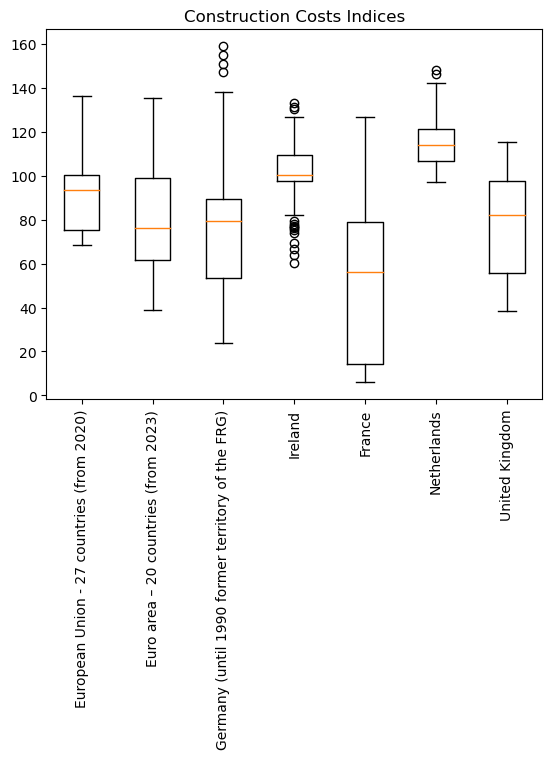

In [66]:
plt.boxplot([col1[~np.isnan(col1)],col2[~np.isnan(col2)],
             col3[~np.isnan(col3)],col4[~np.isnan(col4)],
             col5[~np.isnan(col5)],col6[~np.isnan(col6)],
             col7[~np.isnan(col7)]])
plt.title('Construction Costs Indices')
labels = (list(constr_prod_df_join.columns[0:7]))
plt.xticks(np.arange(len(labels))+1,labels, rotation ='vertical')
plt.show()

In [67]:
labour_input_stats = labour_input_df.describe()
labour_input_stats.to_csv('labour_input_desc_stats.csv')

European Union - 27 countries (from 2020)  \
European Union - 27 countries (from 2020)                                          1.000000   
Euro area – 20 countries (from 2023)                                               0.979234   
Germany (until 1990 former territory of the FRG)                                  -0.166614   
Ireland                                                                            0.720117   
France                                                                             0.327725   
United Kingdom                                                                     0.391314   
Netherlands                                                                        0.811664   

                                                  Euro area – 20 countries (from 2023)  \
European Union - 27 countries (from 2020)                                     0.979234   
Euro area – 20 countries (from 2023)                                          1.000000   
Germany (until 1990 former territory of the FRG)                             -0.225297   
Ireland                                                                       0.702484   
France                                                                        0.191676   
United Kingdom                                                                0.328014   
Netherlands                                                                   0.863140   

                                                  Germany (until 1990 former territory of the FRG)  \
European Union - 27 countries (from 2020)                                                -0.166614   
Euro area – 20 countries (from 2023)                                                     -0.225297   
Germany (until 1990 former territory of the FRG)                                          1.000000   
Ireland                                                                                  -0.166112   
France                                                                                   -0.406305   
United Kingdom                                                                           -0.140932   
Netherlands                                                                               0.073770   

                                                   Ireland    France  \
European Union - 27 countries (from 2020)         0.720117  0.327725   
Euro area – 20 countries (from 2023)              0.702484  0.191676   
Germany (until 1990 former territory of the FRG) -0.166112 -0.406305   
Ireland                                           1.000000  0.214236   
France                                            0.214236  1.000000   
United Kingdom                                    0.786416  0.557836   
Netherlands                                       0.385755 -0.279574   

                                                  United Kingdom  Netherlands  
European Union - 27 countries (from 2020)               0.391314     0.811664  
Euro area – 20 countries (from 2023)                    0.328014     0.863140  
Germany (until 1990 former territory of the FRG)       -0.140932     0.073770  
Ireland                                                 0.786416     0.385755  
France                                                  0.557836    -0.279574  
United Kingdom                                          1.000000    -0.134467  
Netherlands                                            -0.134467     1.000000

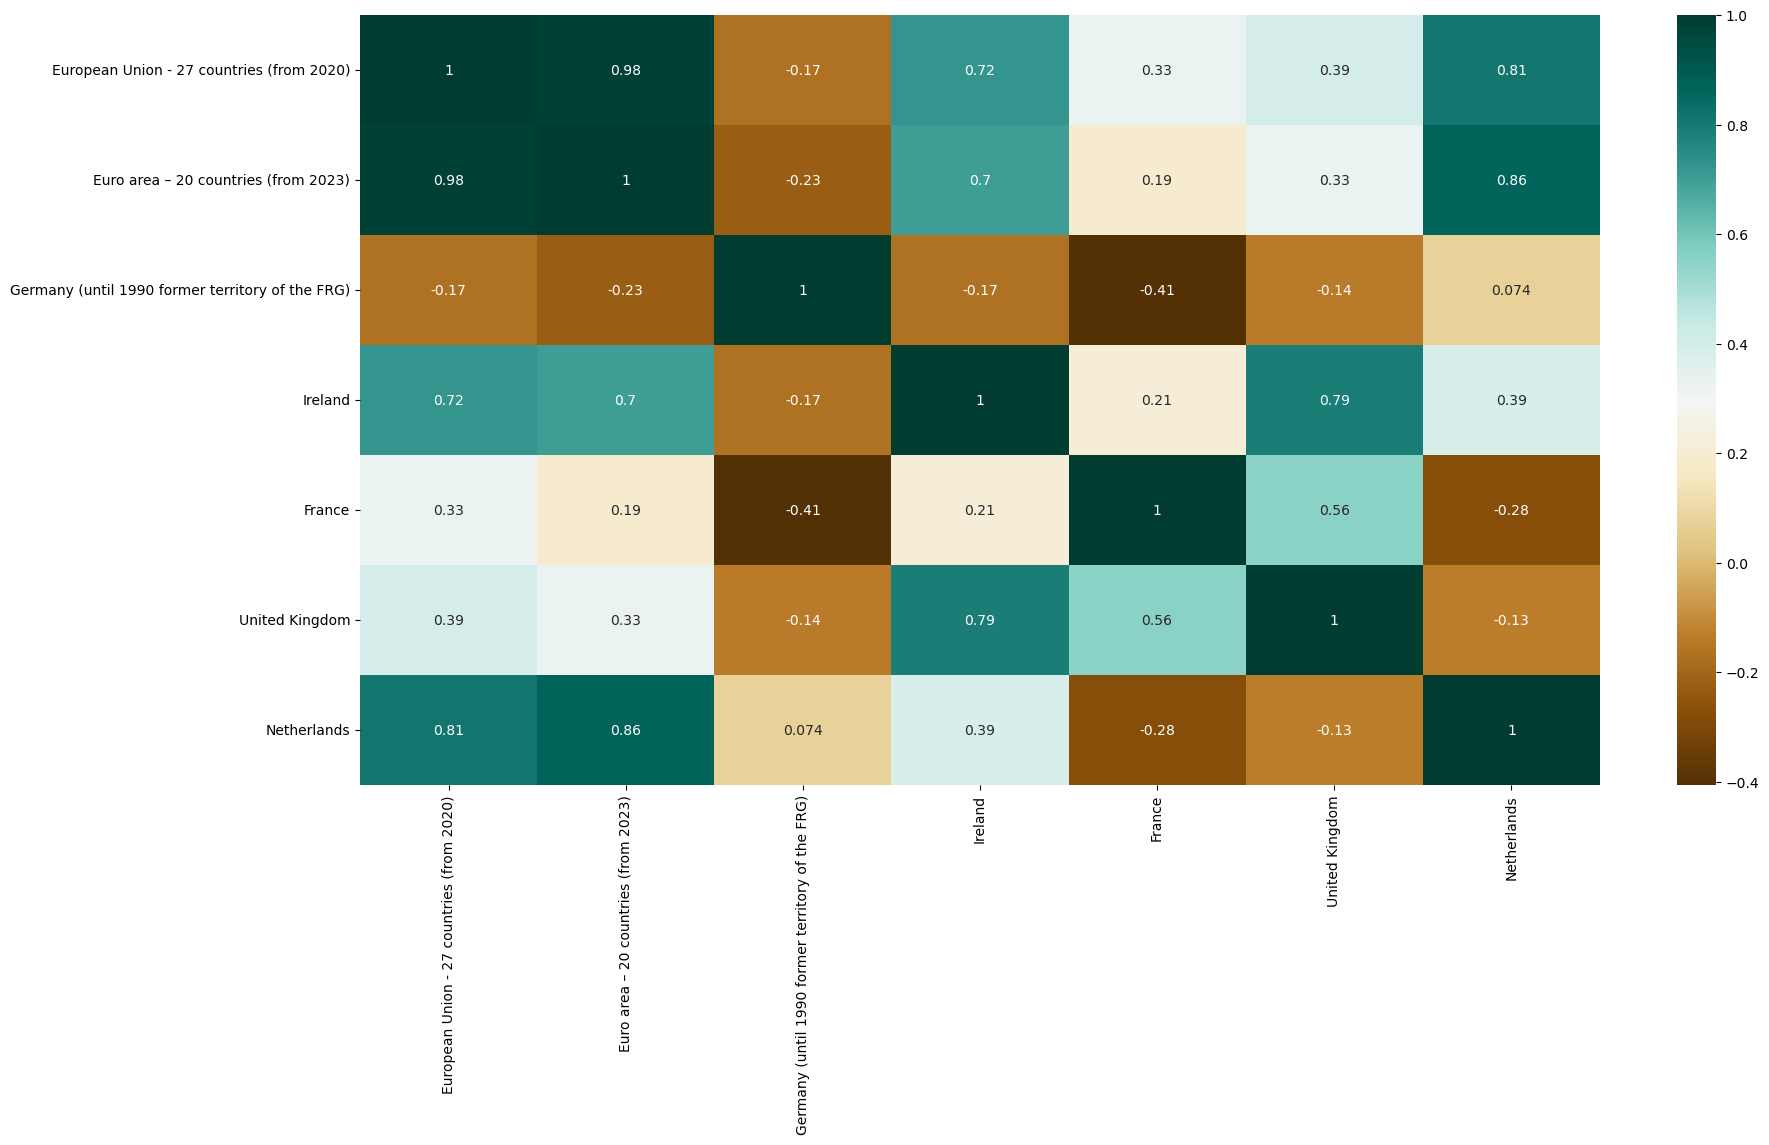

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
c= labour_input_df.corr()
plot = sns.heatmap(c,cmap="BrBG",annot=True)
c

In [69]:
col1 = labour_input_df[labour_input_df.columns[0]]
col2 = labour_input_df[labour_input_df.columns[1]]
col3 = labour_input_df[labour_input_df.columns[2]]
col4 = labour_input_df[labour_input_df.columns[3]]
col5 = labour_input_df[labour_input_df.columns[4]]
col6 = labour_input_df[labour_input_df.columns[5]]
col7 = labour_input_df[labour_input_df.columns[6]]

In [70]:
from scipy import stats 
from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(col4[~np.isnan(col4)], popmean=col1.mean())
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  4.964780894940999
P-Value:  3.1951777401363503e-06


In [71]:
lab_input_corr = calculate_pvalues(labour_input_df.iloc[:,0:7])

In [72]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(col4[~np.isnan(col4)], col7[~np.isnan(col7)])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=5836.500, p=0.080
Probably the same distribution


In [73]:
anova_lab_input = f_oneway(col1[~np.isnan(col1)],col2[~np.isnan(col2)],
             col3[~np.isnan(col3)],col4[~np.isnan(col4)],
             col5[~np.isnan(col5)],col6[~np.isnan(col6)],
             col7[~np.isnan(col7)])

In [74]:
anova_lab_input

F_onewayResult(statistic=56.06955623211245, pvalue=1.2432322048460457e-56)

In [75]:
t_stat, p_value = ttest_1samp(col4, popmean=col1.mean())
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

T-statistic value:  nan
P-Value:  nan


NameError: name 'fig' is not defined

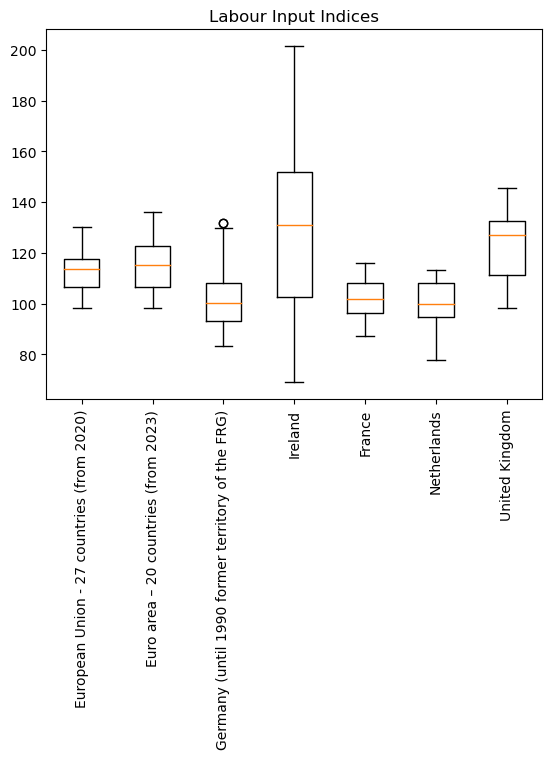

In [76]:
plt.boxplot([col1[~np.isnan(col1)],col2[~np.isnan(col2)],
             col3[~np.isnan(col3)],col4[~np.isnan(col4)],
             col5[~np.isnan(col5)],col6[~np.isnan(col6)],
             col7[~np.isnan(col7)]])
plt.title('Labour Input Indices')
labels = (list(constr_prod_df_join.columns[0:7]))
plt.xticks(np.arange(len(labels))+1,labels, rotation ='vertical')
fig.tight_layout()
plt.show()

### Ireland

In [209]:
constr_prod_df_ie = constr_prod_df_join[['new_ind','Ireland']]
constr_prod_df_ie

new_ind     Ireland
0    1980-Q1         NaN
1    1980-Q2         NaN
2    1980-Q3         NaN
3    1980-Q4         NaN
4    1981-Q1         NaN
..       ...         ...
168  2022-Q1  135.517776
169  2022-Q2  131.527912
170  2022-Q3  129.135626
171  2022-Q4  125.102539
172  2023-Q1         NaN

[173 rows x 2 columns]

In [210]:
# inflation
cpi_ie = pd.read_csv('cpi_ie.csv')
cpi_ie.head()

Statistic Label          Month Commodity Group  \
0  Consumer Price Index (Base Dec 2016=100)  1975 November       All items   
1  Consumer Price Index (Base Dec 2016=100)  1975 December       All items   
2  Consumer Price Index (Base Dec 2016=100)   1976 January       All items   
3  Consumer Price Index (Base Dec 2016=100)  1976 February       All items   
4  Consumer Price Index (Base Dec 2016=100)     1976 March       All items   

                UNIT  VALUE  
0  Base Dec 2016=100    NaN  
1  Base Dec 2016=100    NaN  
2  Base Dec 2016=100    NaN  
3  Base Dec 2016=100    NaN  
4  Base Dec 2016=100    NaN

In [211]:
cpie_jan = cpi_ie['Month'].str.replace(' January', '01')
cpie_feb = cpie_jan.str.replace(' February', '02')
cpie_mar = cpie_feb.str.replace(' March', '03')
cpie_apr = cpie_mar.str.replace(' April', '04')
cpie_may = cpie_apr.str.replace(' May', '05')
cpie_jun = cpie_may.str.replace(' June', '06')
cpie_jul = cpie_jun.str.replace(' July', '07')
cpie_aug = cpie_jul.str.replace(' August', '08')
cpie_sep = cpie_aug.str.replace(' September', '09')
cpie_oct = cpie_sep.str.replace(' October', '10')
cpie_nov = cpie_oct.str.replace(' November', '11')
cpie_dec = cpie_nov.str.replace(' December', '12')

cpi_ie['new_ind'] = cpie_dec
cpi_ie.head()

Statistic Label          Month Commodity Group  \
0  Consumer Price Index (Base Dec 2016=100)  1975 November       All items   
1  Consumer Price Index (Base Dec 2016=100)  1975 December       All items   
2  Consumer Price Index (Base Dec 2016=100)   1976 January       All items   
3  Consumer Price Index (Base Dec 2016=100)  1976 February       All items   
4  Consumer Price Index (Base Dec 2016=100)     1976 March       All items   

                UNIT  VALUE new_ind  
0  Base Dec 2016=100    NaN  197511  
1  Base Dec 2016=100    NaN  197512  
2  Base Dec 2016=100    NaN  197601  
3  Base Dec 2016=100    NaN  197602  
4  Base Dec 2016=100    NaN  197603

In [212]:
cpi_ie = cpi_ie.iloc[1::3,:]
cpi_ie.head()

Statistic Label           Month Commodity Group  \
1   Consumer Price Index (Base Dec 2016=100)   1975 December       All items   
4   Consumer Price Index (Base Dec 2016=100)      1976 March       All items   
7   Consumer Price Index (Base Dec 2016=100)       1976 June       All items   
10  Consumer Price Index (Base Dec 2016=100)  1976 September       All items   
13  Consumer Price Index (Base Dec 2016=100)   1976 December       All items   

                 UNIT  VALUE new_ind  
1   Base Dec 2016=100    NaN  197512  
4   Base Dec 2016=100    NaN  197603  
7   Base Dec 2016=100    NaN  197606  
10  Base Dec 2016=100    NaN  197609  
13  Base Dec 2016=100    NaN  197612

In [213]:
cpi_ie = cpi_ie.reset_index()

In [214]:
empty_3 = []
for x in range(0,len(cpi_ie.new_ind)):
    empty_3.append(cpi_ie.new_ind[x][0]+cpi_ie.new_ind[x][1]+cpi_ie.new_ind[x][2]+
                 cpi_ie.new_ind[x][3]+'-'+'Q'+cpi_ie.new_ind[x][5])

In [215]:
empty_4 = []
for x in range(0,len(empty_3)):
    if empty_3[x][len(empty_3[x])-1] == '3':
        empty_4.append(empty_3[x][0]+empty_3[x][1]+empty_3[x][2]+empty_3[x][3]+empty_3[x][4]+empty_3[x][5]+'1')
    if empty_3[x][len(empty_3[x])-1] == '6':
        empty_4.append(empty_3[x][0]+empty_3[x][1]+empty_3[x][2]+empty_3[x][3]+empty_3[x][4]+empty_3[x][5]+'2')
    if empty_3[x][len(empty_3[x])-1] == '9':
        empty_4.append(empty_3[x][0]+empty_3[x][1]+empty_3[x][2]+empty_3[x][3]+empty_3[x][4]+empty_3[x][5]+'3')
    if empty_3[x][len(empty_3[x])-1] == '2':
        empty_4.append(empty_3[x][0]+empty_3[x][1]+empty_3[x][2]+empty_3[x][3]+empty_3[x][4]+empty_3[x][5]+'4')

In [216]:
cpi_ie['new_ind'] = empty_4

In [217]:
cpi_ie.head()

index                           Statistic Label           Month  \
0      1  Consumer Price Index (Base Dec 2016=100)   1975 December   
1      4  Consumer Price Index (Base Dec 2016=100)      1976 March   
2      7  Consumer Price Index (Base Dec 2016=100)       1976 June   
3     10  Consumer Price Index (Base Dec 2016=100)  1976 September   
4     13  Consumer Price Index (Base Dec 2016=100)   1976 December   

  Commodity Group               UNIT  VALUE  new_ind  
0       All items  Base Dec 2016=100    NaN  1975-Q4  
1       All items  Base Dec 2016=100    NaN  1976-Q1  
2       All items  Base Dec 2016=100    NaN  1976-Q2  
3       All items  Base Dec 2016=100    NaN  1976-Q3  
4       All items  Base Dec 2016=100    NaN  1976-Q4

In [218]:
# gov't debt
debt_ie = pd.read_csv('government_debt_ie.csv')
debt_ie.head()

Statistic Label Quarter  \
0  General Government Gross and Net Debt ESA2010  2000Q1   
1  General Government Gross and Net Debt ESA2010  2000Q1   
2  General Government Gross and Net Debt ESA2010  2000Q2   
3  General Government Gross and Net Debt ESA2010  2000Q2   
4  General Government Gross and Net Debt ESA2010  2000Q3   

                                                Item          UNIT  VALUE  
0  General Government Gross Debt (EDP face value)...  Euro Million  43622  
1  General Government Net Debt - ESA2010 Code (GG...  Euro Million  30644  
2  General Government Gross Debt (EDP face value)...  Euro Million  43294  
3  General Government Net Debt - ESA2010 Code (GG...  Euro Million  27129  
4  General Government Gross Debt (EDP face value)...  Euro Million  41333

In [219]:
debt_ie = debt_ie[debt_ie.Item == debt_ie.Item[1]]
debt_ie['net_debt_ie'] = debt_ie.VALUE
debt_ie.head()

Statistic Label Quarter  \
1  General Government Gross and Net Debt ESA2010  2000Q1   
3  General Government Gross and Net Debt ESA2010  2000Q2   
5  General Government Gross and Net Debt ESA2010  2000Q3   
7  General Government Gross and Net Debt ESA2010  2000Q4   
9  General Government Gross and Net Debt ESA2010  2001Q1   

                                                Item          UNIT  VALUE  \
1  General Government Net Debt - ESA2010 Code (GG...  Euro Million  30644   
3  General Government Net Debt - ESA2010 Code (GG...  Euro Million  27129   
5  General Government Net Debt - ESA2010 Code (GG...  Euro Million  25786   
7  General Government Net Debt - ESA2010 Code (GG...  Euro Million  26892   
9  General Government Net Debt - ESA2010 Code (GG...  Euro Million  25446   

   net_debt_ie  
1        30644  
3        27129  
5        25786  
7        26892  
9        25446

In [220]:
debt_ie = debt_ie.reset_index()

In [221]:
debt_ie.head()

index                                Statistic Label Quarter  \
0      1  General Government Gross and Net Debt ESA2010  2000Q1   
1      3  General Government Gross and Net Debt ESA2010  2000Q2   
2      5  General Government Gross and Net Debt ESA2010  2000Q3   
3      7  General Government Gross and Net Debt ESA2010  2000Q4   
4      9  General Government Gross and Net Debt ESA2010  2001Q1   

                                                Item          UNIT  VALUE  \
0  General Government Net Debt - ESA2010 Code (GG...  Euro Million  30644   
1  General Government Net Debt - ESA2010 Code (GG...  Euro Million  27129   
2  General Government Net Debt - ESA2010 Code (GG...  Euro Million  25786   
3  General Government Net Debt - ESA2010 Code (GG...  Euro Million  26892   
4  General Government Net Debt - ESA2010 Code (GG...  Euro Million  25446   

   net_debt_ie  
0        30644  
1        27129  
2        25786  
3        26892  
4        25446

In [222]:
debt_ie['new_ind'] = None
for x in range(0,len(debt_ie)):
    debt_ie['new_ind'][x] = debt_ie.Quarter[x][0:4] + '-' + debt_ie.Quarter[x][4:]
debt_ie.head()

index                                Statistic Label Quarter  \
0      1  General Government Gross and Net Debt ESA2010  2000Q1   
1      3  General Government Gross and Net Debt ESA2010  2000Q2   
2      5  General Government Gross and Net Debt ESA2010  2000Q3   
3      7  General Government Gross and Net Debt ESA2010  2000Q4   
4      9  General Government Gross and Net Debt ESA2010  2001Q1   

                                                Item          UNIT  VALUE  \
0  General Government Net Debt - ESA2010 Code (GG...  Euro Million  30644   
1  General Government Net Debt - ESA2010 Code (GG...  Euro Million  27129   
2  General Government Net Debt - ESA2010 Code (GG...  Euro Million  25786   
3  General Government Net Debt - ESA2010 Code (GG...  Euro Million  26892   
4  General Government Net Debt - ESA2010 Code (GG...  Euro Million  25446   

   net_debt_ie  new_ind  
0        30644  2000-Q1  
1        27129  2000-Q2  
2        25786  2000-Q3  
3        26892  2000-Q4  
4        25446  2001-Q1

In [223]:
# gdp
gdp_ie = pd.read_csv('gdp_ie.csv')
gdp_ie['gdp_ie'] = gdp_ie.VALUE
gdp_ie.head()

Statistic Label Quarter  State          UNIT  VALUE  gdp_ie
0  GDP at Current Market Prices  1995Q1  State  Euro Million  13152   13152
1  GDP at Current Market Prices  1995Q2  State  Euro Million  13940   13940
2  GDP at Current Market Prices  1995Q3  State  Euro Million  13604   13604
3  GDP at Current Market Prices  1995Q4  State  Euro Million  14063   14063
4  GDP at Current Market Prices  1996Q1  State  Euro Million  14611   14611

In [224]:
gdp_ie['new_ind'] = None
for x in range(0,len(gdp_ie)):
    gdp_ie['new_ind'][x] = gdp_ie.Quarter[x][0:4] + '-' + gdp_ie.Quarter[x][4:]
gdp_ie.head()

Statistic Label Quarter  State          UNIT  VALUE  gdp_ie  \
0  GDP at Current Market Prices  1995Q1  State  Euro Million  13152   13152   
1  GDP at Current Market Prices  1995Q2  State  Euro Million  13940   13940   
2  GDP at Current Market Prices  1995Q3  State  Euro Million  13604   13604   
3  GDP at Current Market Prices  1995Q4  State  Euro Million  14063   14063   
4  GDP at Current Market Prices  1996Q1  State  Euro Million  14611   14611   

   new_ind  
0  1995-Q1  
1  1995-Q2  
2  1995-Q3  
3  1995-Q4  
4  1996-Q1

In [225]:
# rppi
rppi_ie = pd.read_csv('rppi_ie.csv')
rppi_ie['rppi_ie'] = rppi_ie.VALUE
rppi_ie.head()

Statistic Label          Month  \
0  Residential Property Price Index   2005 January   
1  Residential Property Price Index  2005 February   
2  Residential Property Price Index     2005 March   
3  Residential Property Price Index     2005 April   
4  Residential Property Price Index       2005 May   

            Type of Residential Property           UNIT  VALUE  rppi_ie  
0  National - all residential properties  Base 2015=100  124.9    124.9  
1  National - all residential properties  Base 2015=100  125.9    125.9  
2  National - all residential properties  Base 2015=100  126.6    126.6  
3  National - all residential properties  Base 2015=100  127.5    127.5  
4  National - all residential properties  Base 2015=100  128.4    128.4

In [226]:
rppi_jan = rppi_ie['Month'].str.replace(' January', '01')
rppi_feb = rppi_jan.str.replace(' February', '02')
rppi_mar = rppi_feb.str.replace(' March', '03')
rppi_apr = rppi_mar.str.replace(' April', '04')
rppi_may = rppi_apr.str.replace(' May', '05')
rppi_jun = rppi_may.str.replace(' June', '06')
rppi_jul = rppi_jun.str.replace(' July', '07')
rppi_aug = rppi_jul.str.replace(' August', '08')
rppi_sep = rppi_aug.str.replace(' September', '09')
rppi_oct = rppi_sep.str.replace(' October', '10')
rppi_nov = rppi_oct.str.replace(' November', '11')
rppi_dec = rppi_nov.str.replace(' December', '12')

rppi_ie['new_ind'] = rppi_dec
rppi_ie.head()

Statistic Label          Month  \
0  Residential Property Price Index   2005 January   
1  Residential Property Price Index  2005 February   
2  Residential Property Price Index     2005 March   
3  Residential Property Price Index     2005 April   
4  Residential Property Price Index       2005 May   

            Type of Residential Property           UNIT  VALUE  rppi_ie  \
0  National - all residential properties  Base 2015=100  124.9    124.9   
1  National - all residential properties  Base 2015=100  125.9    125.9   
2  National - all residential properties  Base 2015=100  126.6    126.6   
3  National - all residential properties  Base 2015=100  127.5    127.5   
4  National - all residential properties  Base 2015=100  128.4    128.4   

  new_ind  
0  200501  
1  200502  
2  200503  
3  200504  
4  200505

In [227]:
rppi_ie = rppi_ie.iloc[2::3,:]
rppi_ie.head()

Statistic Label           Month  \
2   Residential Property Price Index      2005 March   
5   Residential Property Price Index       2005 June   
8   Residential Property Price Index  2005 September   
11  Residential Property Price Index   2005 December   
14  Residential Property Price Index      2006 March   

             Type of Residential Property           UNIT  VALUE  rppi_ie  \
2   National - all residential properties  Base 2015=100  126.6    126.6   
5   National - all residential properties  Base 2015=100  129.5    129.5   
8   National - all residential properties  Base 2015=100  135.2    135.2   
11  National - all residential properties  Base 2015=100  140.7    140.7   
14  National - all residential properties  Base 2015=100  142.5    142.5   

   new_ind  
2   200503  
5   200506  
8   200509  
11  200512  
14  200603

In [228]:
rppi_ie = rppi_ie.reset_index()

In [231]:
empty_5 = []
for x in range(0,len(rppi_ie.new_ind)):
    empty_5.append(rppi_ie.new_ind[x][0]+rppi_ie.new_ind[x][1]+rppi_ie.new_ind[x][2]+
                 rppi_ie.new_ind[x][3]+'-'+'Q'+rppi_ie.new_ind[x][5])

In [232]:
len(empty_5)

73

In [233]:
empty_6 = []
for x in range(0,len(empty_5)):
    if empty_5[x][len(empty_5[x])-1] == '3':
        empty_6.append(empty_5[x][0]+empty_5[x][1]+empty_5[x][2]+empty_5[x][3]+empty_5[x][4]+empty_5[x][5]+'1')
    if empty_5[x][len(empty_5[x])-1] == '6':
        empty_6.append(empty_5[x][0]+empty_5[x][1]+empty_5[x][2]+empty_5[x][3]+empty_5[x][4]+empty_5[x][5]+'2')
    if empty_5[x][len(empty_5[x])-1] == '9':
        empty_6.append(empty_5[x][0]+empty_5[x][1]+empty_5[x][2]+empty_5[x][3]+empty_5[x][4]+empty_5[x][5]+'3')
    if empty_5[x][len(empty_5[x])-1] == '2':
        empty_6.append(empty_5[x][0]+empty_5[x][1]+empty_5[x][2]+empty_5[x][3]+empty_5[x][4]+empty_5[x][5]+'4')

In [234]:
rppi_ie['new_ind'] = empty_6

In [235]:
rppi_ie.head()

index                   Statistic Label           Month  \
0      2  Residential Property Price Index      2005 March   
1      5  Residential Property Price Index       2005 June   
2      8  Residential Property Price Index  2005 September   
3     11  Residential Property Price Index   2005 December   
4     14  Residential Property Price Index      2006 March   

            Type of Residential Property           UNIT  VALUE  rppi_ie  \
0  National - all residential properties  Base 2015=100  126.6    126.6   
1  National - all residential properties  Base 2015=100  129.5    129.5   
2  National - all residential properties  Base 2015=100  135.2    135.2   
3  National - all residential properties  Base 2015=100  140.7    140.7   
4  National - all residential properties  Base 2015=100  142.5    142.5   

   new_ind  
0  2005-Q1  
1  2005-Q2  
2  2005-Q3  
3  2005-Q4  
4  2006-Q1

In [236]:
# mortgage drawdowns
mortg_dd = pd.read_excel('mortg_drawdown_ie.xls', sheet_name = 'Number of loans')
mortg_dd = mortg_dd.iloc[5:87,:]
mortg_dd = mortg_dd.reset_index()
mortg_dd.head()

index Unnamed: 0 Unnamed: 1    Unnamed: 2      Unnamed: 3    Unnamed: 4  \
0      5        NaN        NaN  FTB Purchase  Mover Purchase  RIL Purchase   
1      6        NaN        NaN           No.             No.           No.   
2      7       2003         Q1   7265.829281     7158.903528   4944.585375   
3      8        NaN         Q2   9021.521337     8998.361109   5234.568315   
4      9        NaN         Q3     9429.9979       10557.999     5503.9997   

    Unnamed: 5    Unnamed: 6       Unnamed: 7  
0  Re-mortgage        Top-up  Total Drawdowns  
1          No.           No.              No.  
2  3541.041066  10226.560901     33136.920152  
3  3161.585795  13769.693797     40185.730353  
4    3760.9993    13504.9985       42757.9944

In [237]:
mortg_dd['new_ind'] = None
for x in range(2,len(mortg_dd)):
    if mortg_dd.iloc[x,2] == "Q1":
        mortg_dd['new_ind'][x] = str(mortg_dd.iloc[x,1]) + '-' + mortg_dd.iloc[x,2]
        mortg_dd.iloc[x:(x+4),1] = str(mortg_dd.iloc[x,1])
    else:
        mortg_dd['new_ind'][x] = str(mortg_dd.iloc[x-1,1]) + '-' + mortg_dd.iloc[x,2]

In [238]:
mortg_dd.iloc[0,9:] = ['new_ind']
mortg_dd.head()

index Unnamed: 0 Unnamed: 1    Unnamed: 2      Unnamed: 3    Unnamed: 4  \
0      5        NaN        NaN  FTB Purchase  Mover Purchase  RIL Purchase   
1      6        NaN        NaN           No.             No.           No.   
2      7       2003         Q1   7265.829281     7158.903528   4944.585375   
3      8       2003         Q2   9021.521337     8998.361109   5234.568315   
4      9       2003         Q3     9429.9979       10557.999     5503.9997   

    Unnamed: 5    Unnamed: 6       Unnamed: 7  new_ind  
0  Re-mortgage        Top-up  Total Drawdowns  new_ind  
1          No.           No.              No.     None  
2  3541.041066  10226.560901     33136.920152  2003-Q1  
3  3161.585795  13769.693797     40185.730353  2003-Q2  
4    3760.9993    13504.9985       42757.9944  2003-Q3

In [239]:
mortg_dd.columns = mortg_dd.iloc[0,:]
mortg_dd_df = mortg_dd.iloc[2:,:]
mortg_dd_df.tail()

0    5   NaN NaN FTB Purchase Mover Purchase RIL Purchase Re-mortgage Top-up  \
77  82  2021  Q4         7240           3131          249        1943    736   
78  83  2022  Q1         5184           2279          191        1762    494   
79  84  2022  Q2         5994           2476          225        2648    642   
80  85  2022  Q3         6583           3000          187        5081    NaN   
81  86  2022  Q4         7435           3034          220        5199    NaN   

0  Total Drawdowns  new_ind  
77           13299  2021-Q4  
78            9910  2022-Q1  
79           11985  2022-Q2  
80           14851  2022-Q3  
81           15888  2022-Q4

In [240]:
constr_prod_df_ie.head()

new_ind  Ireland
0  1980-Q1      NaN
1  1980-Q2      NaN
2  1980-Q3      NaN
3  1980-Q4      NaN
4  1981-Q1      NaN

In [241]:
gdp_ie.head()

Statistic Label Quarter  State          UNIT  VALUE  gdp_ie  \
0  GDP at Current Market Prices  1995Q1  State  Euro Million  13152   13152   
1  GDP at Current Market Prices  1995Q2  State  Euro Million  13940   13940   
2  GDP at Current Market Prices  1995Q3  State  Euro Million  13604   13604   
3  GDP at Current Market Prices  1995Q4  State  Euro Million  14063   14063   
4  GDP at Current Market Prices  1996Q1  State  Euro Million  14611   14611   

   new_ind  
0  1995-Q1  
1  1995-Q2  
2  1995-Q3  
3  1995-Q4  
4  1996-Q1

In [242]:
cpi_ie['cpi'] = cpi_ie.VALUE
cpi_ie.head()

index                           Statistic Label           Month  \
0      1  Consumer Price Index (Base Dec 2016=100)   1975 December   
1      4  Consumer Price Index (Base Dec 2016=100)      1976 March   
2      7  Consumer Price Index (Base Dec 2016=100)       1976 June   
3     10  Consumer Price Index (Base Dec 2016=100)  1976 September   
4     13  Consumer Price Index (Base Dec 2016=100)   1976 December   

  Commodity Group               UNIT  VALUE  new_ind  cpi  
0       All items  Base Dec 2016=100    NaN  1975-Q4  NaN  
1       All items  Base Dec 2016=100    NaN  1976-Q1  NaN  
2       All items  Base Dec 2016=100    NaN  1976-Q2  NaN  
3       All items  Base Dec 2016=100    NaN  1976-Q3  NaN  
4       All items  Base Dec 2016=100    NaN  1976-Q4  NaN

In [243]:
rppi_ie.head()

index                   Statistic Label           Month  \
0      2  Residential Property Price Index      2005 March   
1      5  Residential Property Price Index       2005 June   
2      8  Residential Property Price Index  2005 September   
3     11  Residential Property Price Index   2005 December   
4     14  Residential Property Price Index      2006 March   

            Type of Residential Property           UNIT  VALUE  rppi_ie  \
0  National - all residential properties  Base 2015=100  126.6    126.6   
1  National - all residential properties  Base 2015=100  129.5    129.5   
2  National - all residential properties  Base 2015=100  135.2    135.2   
3  National - all residential properties  Base 2015=100  140.7    140.7   
4  National - all residential properties  Base 2015=100  142.5    142.5   

   new_ind  
0  2005-Q1  
1  2005-Q2  
2  2005-Q3  
3  2005-Q4  
4  2006-Q1

In [244]:
debt_ie.head()

index                                Statistic Label Quarter  \
0      1  General Government Gross and Net Debt ESA2010  2000Q1   
1      3  General Government Gross and Net Debt ESA2010  2000Q2   
2      5  General Government Gross and Net Debt ESA2010  2000Q3   
3      7  General Government Gross and Net Debt ESA2010  2000Q4   
4      9  General Government Gross and Net Debt ESA2010  2001Q1   

                                                Item          UNIT  VALUE  \
0  General Government Net Debt - ESA2010 Code (GG...  Euro Million  30644   
1  General Government Net Debt - ESA2010 Code (GG...  Euro Million  27129   
2  General Government Net Debt - ESA2010 Code (GG...  Euro Million  25786   
3  General Government Net Debt - ESA2010 Code (GG...  Euro Million  26892   
4  General Government Net Debt - ESA2010 Code (GG...  Euro Million  25446   

   net_debt_ie  new_ind  
0        30644  2000-Q1  
1        27129  2000-Q2  
2        25786  2000-Q3  
3        26892  2000-Q4  
4        25446  2001-Q1

In [245]:
# bring this step up
labour_input_df_ie = labour_input_df[['ind','Ireland']]
labour_input_df_ie['new_ind'] = labour_input_df_ie.ind
labour_input_df_ie['lab_input'] = labour_input_df_ie.Ireland
labour_input_df_ie.head()

ind  Ireland  new_ind  lab_input
0  1989-Q4      NaN  1989-Q4        NaN
1  1990-Q1      NaN  1990-Q1        NaN
2  1990-Q2      NaN  1990-Q2        NaN
3  1990-Q3      NaN  1990-Q3        NaN
4  1990-Q4      NaN  1990-Q4        NaN

In [246]:
constr_costs_df_ie = constr_costs_df[['ind','Ireland']]
constr_costs_df_ie['new_ind'] = constr_costs_df_ie.ind
constr_costs_df_ie['constr_costs'] = constr_costs_df_ie.Ireland
constr_costs_df_ie.head()

ind  Ireland  new_ind  constr_costs
0  1953-Q4      NaN  1953-Q4           NaN
1  1954-Q1      NaN  1954-Q1           NaN
2  1954-Q2      NaN  1954-Q2           NaN
3  1954-Q3      NaN  1954-Q3           NaN
4  1954-Q4      NaN  1954-Q4           NaN

In [247]:
# constr_prod_df_ie mortg_dd_df rppi_ie gdp_ie debt_ie cpi_ie labour_input_df constr_costs_df
ie_dts_step_1 = constr_prod_df_ie.merge(mortg_dd_df[['FTB Purchase', 'Mover Purchase', 'RIL Purchase',
                                     'Re-mortgage', 'Top-up', 'Total Drawdowns', 'new_ind']], 
                                     on='new_ind', how='left')
ie_dts_step_1.head()

new_ind  Ireland FTB Purchase Mover Purchase RIL Purchase Re-mortgage  \
0  1980-Q1      NaN          NaN            NaN          NaN         NaN   
1  1980-Q2      NaN          NaN            NaN          NaN         NaN   
2  1980-Q3      NaN          NaN            NaN          NaN         NaN   
3  1980-Q4      NaN          NaN            NaN          NaN         NaN   
4  1981-Q1      NaN          NaN            NaN          NaN         NaN   

  Top-up Total Drawdowns  
0    NaN             NaN  
1    NaN             NaN  
2    NaN             NaN  
3    NaN             NaN  
4    NaN             NaN

In [248]:
ie_dts_step_2 = ie_dts_step_1.merge(rppi_ie[['rppi_ie', 'new_ind']], 
                                     on='new_ind', how='left')
ie_dts_step_2.head()

new_ind  Ireland FTB Purchase Mover Purchase RIL Purchase Re-mortgage  \
0  1980-Q1      NaN          NaN            NaN          NaN         NaN   
1  1980-Q2      NaN          NaN            NaN          NaN         NaN   
2  1980-Q3      NaN          NaN            NaN          NaN         NaN   
3  1980-Q4      NaN          NaN            NaN          NaN         NaN   
4  1981-Q1      NaN          NaN            NaN          NaN         NaN   

  Top-up Total Drawdowns  rppi_ie  
0    NaN             NaN      NaN  
1    NaN             NaN      NaN  
2    NaN             NaN      NaN  
3    NaN             NaN      NaN  
4    NaN             NaN      NaN

In [249]:
ie_dts_step_3 = ie_dts_step_2.merge(gdp_ie[['gdp_ie', 'new_ind']], 
                                     on='new_ind', how='left')
ie_dts_step_3.head()

new_ind  Ireland FTB Purchase Mover Purchase RIL Purchase Re-mortgage  \
0  1980-Q1      NaN          NaN            NaN          NaN         NaN   
1  1980-Q2      NaN          NaN            NaN          NaN         NaN   
2  1980-Q3      NaN          NaN            NaN          NaN         NaN   
3  1980-Q4      NaN          NaN            NaN          NaN         NaN   
4  1981-Q1      NaN          NaN            NaN          NaN         NaN   

  Top-up Total Drawdowns  rppi_ie  gdp_ie  
0    NaN             NaN      NaN     NaN  
1    NaN             NaN      NaN     NaN  
2    NaN             NaN      NaN     NaN  
3    NaN             NaN      NaN     NaN  
4    NaN             NaN      NaN     NaN

In [250]:
ie_dts_step_4 = ie_dts_step_3.merge(debt_ie[['net_debt_ie', 'new_ind']], 
                                     on='new_ind', how='left')
ie_dts_step_4.head()

new_ind  Ireland FTB Purchase Mover Purchase RIL Purchase Re-mortgage  \
0  1980-Q1      NaN          NaN            NaN          NaN         NaN   
1  1980-Q2      NaN          NaN            NaN          NaN         NaN   
2  1980-Q3      NaN          NaN            NaN          NaN         NaN   
3  1980-Q4      NaN          NaN            NaN          NaN         NaN   
4  1981-Q1      NaN          NaN            NaN          NaN         NaN   

  Top-up Total Drawdowns  rppi_ie  gdp_ie  net_debt_ie  
0    NaN             NaN      NaN     NaN          NaN  
1    NaN             NaN      NaN     NaN          NaN  
2    NaN             NaN      NaN     NaN          NaN  
3    NaN             NaN      NaN     NaN          NaN  
4    NaN             NaN      NaN     NaN          NaN

In [251]:
ie_dts_step_5 = ie_dts_step_4.merge(cpi_ie[['cpi', 'new_ind']], 
                                     on='new_ind', how='left')
ie_dts_step_5.head()

new_ind  Ireland FTB Purchase Mover Purchase RIL Purchase Re-mortgage  \
0  1980-Q1      NaN          NaN            NaN          NaN         NaN   
1  1980-Q2      NaN          NaN            NaN          NaN         NaN   
2  1980-Q3      NaN          NaN            NaN          NaN         NaN   
3  1980-Q4      NaN          NaN            NaN          NaN         NaN   
4  1981-Q1      NaN          NaN            NaN          NaN         NaN   

  Top-up Total Drawdowns  rppi_ie  gdp_ie  net_debt_ie  cpi  
0    NaN             NaN      NaN     NaN          NaN  NaN  
1    NaN             NaN      NaN     NaN          NaN  NaN  
2    NaN             NaN      NaN     NaN          NaN  NaN  
3    NaN             NaN      NaN     NaN          NaN  NaN  
4    NaN             NaN      NaN     NaN          NaN  NaN

In [252]:
ie_dts_step_6 = ie_dts_step_5.merge(labour_input_df_ie[['lab_input', 'new_ind']], 
                                     on='new_ind', how='left')
ie_dts_step_6.head()

new_ind  Ireland FTB Purchase Mover Purchase RIL Purchase Re-mortgage  \
0  1980-Q1      NaN          NaN            NaN          NaN         NaN   
1  1980-Q2      NaN          NaN            NaN          NaN         NaN   
2  1980-Q3      NaN          NaN            NaN          NaN         NaN   
3  1980-Q4      NaN          NaN            NaN          NaN         NaN   
4  1981-Q1      NaN          NaN            NaN          NaN         NaN   

  Top-up Total Drawdowns  rppi_ie  gdp_ie  net_debt_ie  cpi  lab_input  
0    NaN             NaN      NaN     NaN          NaN  NaN        NaN  
1    NaN             NaN      NaN     NaN          NaN  NaN        NaN  
2    NaN             NaN      NaN     NaN          NaN  NaN        NaN  
3    NaN             NaN      NaN     NaN          NaN  NaN        NaN  
4    NaN             NaN      NaN     NaN          NaN  NaN        NaN

In [253]:
ie_dts_step_7 = ie_dts_step_6.merge(constr_costs_df_ie[['constr_costs', 'new_ind']], 
                                     on='new_ind', how='left')
ie_dts_step_7.head()

new_ind  Ireland FTB Purchase Mover Purchase RIL Purchase Re-mortgage  \
0  1980-Q1      NaN          NaN            NaN          NaN         NaN   
1  1980-Q2      NaN          NaN            NaN          NaN         NaN   
2  1980-Q3      NaN          NaN            NaN          NaN         NaN   
3  1980-Q4      NaN          NaN            NaN          NaN         NaN   
4  1981-Q1      NaN          NaN            NaN          NaN         NaN   

  Top-up Total Drawdowns  rppi_ie  gdp_ie  net_debt_ie  cpi  lab_input  \
0    NaN             NaN      NaN     NaN          NaN  NaN        NaN   
1    NaN             NaN      NaN     NaN          NaN  NaN        NaN   
2    NaN             NaN      NaN     NaN          NaN  NaN        NaN   
3    NaN             NaN      NaN     NaN          NaN  NaN        NaN   
4    NaN             NaN      NaN     NaN          NaN  NaN        NaN   

   constr_costs  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [254]:
ie_dts_step_7.isnull().sum()/ie_dts_step_7.shape[0]

new_ind            0.000000
Ireland            0.468208
FTB Purchase       0.537572
Mover Purchase     0.537572
RIL Purchase       0.537572
Re-mortgage        0.537572
Top-up             0.549133
Total Drawdowns    0.537572
rppi_ie            0.578035
gdp_ie             0.352601
net_debt_ie        0.468208
cpi                0.387283
lab_input          0.468208
constr_costs       0.462428
dtype: float64

### Stats

In [126]:
shapiro_df = pd.DataFrame()

In [209]:
ie_dts_step_7.columns[0] + ie_dts_step_7.columns[0]

'new_indnew_ind'

In [210]:
test = ie_dts_step_7[ie_dts_step_7.columns[0]]
test_no = test[~np.isnan(test)]

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [211]:
test_no

NameError: name 'test_no' is not defined

In [505]:
test_no

80     216.612217
81     218.514305
82     220.424981
83     218.552402
84     222.520017
          ...    
167    140.611706
168    135.517776
169    131.527912
170    129.135626
171    125.102539
Name: Value, Length: 92, dtype: float64

In [511]:
type(test_no[len(test_no)]) == np.float64

True

In [518]:
ie_dts_step_7.select_dtypes(include=np.number)

Value  FTBPurchase  MoverPurchase  RILPurchase  Re_mortgage  Top_up  \
0           NaN          NaN            NaN          NaN          NaN     NaN   
1           NaN          NaN            NaN          NaN          NaN     NaN   
2           NaN          NaN            NaN          NaN          NaN     NaN   
3           NaN          NaN            NaN          NaN          NaN     NaN   
4           NaN          NaN            NaN          NaN          NaN     NaN   
..          ...          ...            ...          ...          ...     ...   
168  135.517776       5184.0         2279.0        191.0       1762.0   494.0   
169  131.527912       5994.0         2476.0        225.0       2648.0   642.0   
170  129.135626       6583.0         3000.0        187.0       5081.0     NaN   
171  125.102539       7435.0         3034.0        220.0       5199.0     NaN   
172         NaN          NaN            NaN          NaN          NaN     NaN   

     TotalDrawdowns  rppi_ie    gdp_ie  net_debt_ie    cpi  lab_input  \
0               NaN      NaN       NaN          NaN    NaN        NaN   
1               NaN      NaN       NaN          NaN    NaN        NaN   
2               NaN      NaN       NaN          NaN    NaN        NaN   
3               NaN      NaN       NaN          NaN    NaN        NaN   
4               NaN      NaN       NaN          NaN    NaN        NaN   
..              ...      ...       ...          ...    ...        ...   
168          9910.0    159.9  117965.0     194105.0  109.6      165.4   
169         11985.0    163.4  120880.0     189952.0  113.1      168.3   
170         14851.0    167.7  133964.0     187033.0  113.8      176.7   
171         15888.0    168.8  129774.0     185391.0  115.8      168.5   
172             NaN    166.2       NaN          NaN  118.0        NaN   

     constr_costs  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
..            ...  
168         122.0  
169         126.5  
170         130.5  
171         131.4  
172         133.2  

[173 rows x 13 columns]

In [519]:
def shapiro_df_add(df,name):
    df_1 = df.select_dtypes(include=np.number)
    n_cols = len(df_1.columns)
    country = list()
    stat_l = list()
    p_l = list()
    
    for x in range(0,n_cols):
        test = df_1[df_1.columns[x]]
        test_no = test[~np.isnan(test)]

        stat, p = shapiro(test_no)
        country_row = name + '_' + df_1.columns[x]
        country.append(country_row)
        stat_l.append(stat)
        p_l.append(p)
        
    return(country,stat_l,p_l)

In [524]:
shapiro_df_ie = pd.DataFrame()
ie_dts = shapiro_df_add(ie_dts_step_7,'ie_df')
shapiro_df_ie['var'] = ie_dts[0]
shapiro_df_ie['stat'] = ie_dts[1]
shapiro_df_ie['p'] = ie_dts[2]
shapiro_df_ie
shapiro_df_ie.to_csv('shapiro_df_ie.csv')

In [525]:
shapiro_df_lab = pd.DataFrame()
lab_dts = shapiro_df_add(labour_input_df,'lab_dts')
shapiro_df_lab['var'] = lab_dts[0]
shapiro_df_lab['stat'] = lab_dts[1]
shapiro_df_lab['p'] = lab_dts[2]
shapiro_df_lab.to_csv('shapiro_df_lab.csv')

In [526]:
shapiro_df_costs = pd.DataFrame()
costs_dts = shapiro_df_add(constr_costs_df,'costs_dts')
shapiro_df_costs['var'] = costs_dts[0]
shapiro_df_costs['stat'] = costs_dts[1]
shapiro_df_costs['p'] = costs_dts[2]
shapiro_df_costs.to_csv('shapiro_df_costs.csv')

In [527]:
shapiro_df_prod = pd.DataFrame()
prod_dts = shapiro_df_add(constr_prod_df_join,'prod_dts')
shapiro_df_prod['var'] = prod_dts[0]
shapiro_df_prod['stat'] = prod_dts[1]
shapiro_df_prod['p'] = prod_dts[2]
shapiro_df_prod.to_csv('shapiro_df_prod.csv')

### Exploratory Data Analysis

#### Construction Costs

In [255]:
print('The shape of the dataset is:',ie_dts_step_7.shape)

The shape of the dataset is: (173, 14)


In [256]:
ie_dts_step_7.iloc[80:,].shape

(93, 14)

In [257]:
ie_dts_step_7.columns = ie_dts_step_7.columns.str.replace(' ', '')
ie_dts_step_7.columns = ie_dts_step_7.columns.str.replace('-', '_')

In [258]:
ie_dts_step_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   new_ind         173 non-null    object 
 1   Ireland         92 non-null     float64
 2   FTBPurchase     80 non-null     object 
 3   MoverPurchase   80 non-null     object 
 4   RILPurchase     80 non-null     object 
 5   Re_mortgage     80 non-null     object 
 6   Top_up          78 non-null     object 
 7   TotalDrawdowns  80 non-null     object 
 8   rppi_ie         73 non-null     float64
 9   gdp_ie          112 non-null    float64
 10  net_debt_ie     92 non-null     float64
 11  cpi             106 non-null    float64
 12  lab_input       92 non-null     float64
 13  constr_costs    93 non-null     float64
dtypes: float64(7), object(7)
memory usage: 20.3+ KB


In [259]:
ie_dts_step_7['FTBPurchase'] = ie_dts_step_7['FTBPurchase'].astype(float)
ie_dts_step_7['MoverPurchase'] = ie_dts_step_7['MoverPurchase'].astype(float)
ie_dts_step_7['RILPurchase'] = ie_dts_step_7['RILPurchase'].astype(float)
ie_dts_step_7['Re_mortgage'] = ie_dts_step_7['Re_mortgage'].astype(float) 
ie_dts_step_7['Top_up'] = ie_dts_step_7['Top_up'].astype(float) 
ie_dts_step_7['TotalDrawdowns'] = ie_dts_step_7['TotalDrawdowns'].astype(float)

In [260]:
ie_dts_step_7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 172
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   new_ind         173 non-null    object 
 1   Ireland         92 non-null     float64
 2   FTBPurchase     80 non-null     float64
 3   MoverPurchase   80 non-null     float64
 4   RILPurchase     80 non-null     float64
 5   Re_mortgage     80 non-null     float64
 6   Top_up          78 non-null     float64
 7   TotalDrawdowns  80 non-null     float64
 8   rppi_ie         73 non-null     float64
 9   gdp_ie          112 non-null    float64
 10  net_debt_ie     92 non-null     float64
 11  cpi             106 non-null    float64
 12  lab_input       92 non-null     float64
 13  constr_costs    93 non-null     float64
dtypes: float64(13), object(1)
memory usage: 20.3+ KB


In [261]:
ie_dts_step_7.describe()

Ireland   FTBPurchase  MoverPurchase  RILPurchase  Re_mortgage  \
count   92.000000     80.000000      80.000000    80.000000    80.000000   
mean   173.523228   5120.257021    4306.650801  1861.167190  2339.297657   
std     85.896430   2720.286413    3647.908104  2521.803783  2400.310495   
min     73.445368    928.000000     770.000000    98.000000    61.000000   
25%    101.770322   3123.250000    1872.000000   230.250000   435.750000   
50%    138.767563   4362.773017    2557.500000   333.000000  1377.500000   
75%    232.285391   7164.250000    6554.475882  4407.489571  3978.000000   
max    360.124471  11284.000000   12941.000000  7529.867562  7531.000000   

             Top_up  TotalDrawdowns     rppi_ie         gdp_ie    net_debt_ie  \
count     78.000000       80.000000   73.000000     112.000000      92.000000   
mean    4700.923759    18210.773334  122.627397   50359.598214  106333.913043   
std     6108.931481    16733.153253   28.428840   27947.619919   68618.421998   
min      204.000000     2068.000000   73.400000   13152.000000   23304.000000   
25%      466.250000     6757.000000  100.000000   32451.250000   30545.750000   
50%      698.900000     9928.113860  128.200000   43486.000000  124232.000000   
75%    10753.390225    33641.170134  142.500000   65282.750000  174533.000000   
max    18412.000000    55617.659320  168.800000  133964.000000  194347.000000   

              cpi   lab_input  constr_costs  
count  106.000000   92.000000     93.000000  
mean    93.053774  131.552174    101.015054  
std     12.158980   36.385586     14.386263  
min     67.800000   69.000000     60.200000  
25%     85.500000  102.400000     97.400000  
50%     98.350000  130.850000    100.200000  
75%    100.900000  151.700000    109.300000  
max    118.000000  201.400000    133.200000

In [262]:
ie_dts_step_7.isnull().sum()/ie_dts_step_7.shape[0]

new_ind           0.000000
Ireland           0.468208
FTBPurchase       0.537572
MoverPurchase     0.537572
RILPurchase       0.537572
Re_mortgage       0.537572
Top_up            0.549133
TotalDrawdowns    0.537572
rppi_ie           0.578035
gdp_ie            0.352601
net_debt_ie       0.468208
cpi               0.387283
lab_input         0.468208
constr_costs      0.462428
dtype: float64

In [263]:
ie_dts_step_7.iloc[80:,]

new_ind     Ireland  FTBPurchase  MoverPurchase  RILPurchase  \
80   2000-Q1  216.612217          NaN            NaN          NaN   
81   2000-Q2  218.514305          NaN            NaN          NaN   
82   2000-Q3  220.424981          NaN            NaN          NaN   
83   2000-Q4  218.552402          NaN            NaN          NaN   
84   2001-Q1  222.520017          NaN            NaN          NaN   
..       ...         ...          ...            ...          ...   
168  2022-Q1  135.517776       5184.0         2279.0        191.0   
169  2022-Q2  131.527912       5994.0         2476.0        225.0   
170  2022-Q3  129.135626       6583.0         3000.0        187.0   
171  2022-Q4  125.102539       7435.0         3034.0        220.0   
172  2023-Q1         NaN          NaN            NaN          NaN   

     Re_mortgage  Top_up  TotalDrawdowns  rppi_ie    gdp_ie  net_debt_ie  \
80           NaN     NaN             NaN      NaN   25587.0      30644.0   
81           NaN     NaN             NaN      NaN   26774.0      27129.0   
82           NaN     NaN             NaN      NaN   27420.0      25786.0   
83           NaN     NaN             NaN      NaN   28715.0      26892.0   
84           NaN     NaN             NaN      NaN   29812.0      25446.0   
..           ...     ...             ...      ...       ...          ...   
168       1762.0   494.0          9910.0    159.9  117965.0     194105.0   
169       2648.0   642.0         11985.0    163.4  120880.0     189952.0   
170       5081.0     NaN         14851.0    167.7  133964.0     187033.0   
171       5199.0     NaN         15888.0    168.8  129774.0     185391.0   
172          NaN     NaN             NaN    166.2       NaN          NaN   

       cpi  lab_input  constr_costs  
80    73.6      112.8          60.2  
81    75.2      117.6          63.7  
82    76.1      123.8          66.4  
83    76.9      126.0          69.2  
84    77.6      126.9          73.9  
..     ...        ...           ...  
168  109.6      165.4         122.0  
169  113.1      168.3         126.5  
170  113.8      176.7         130.5  
171  115.8      168.5         131.4  
172  118.0        NaN         133.2  

[93 rows x 14 columns]

#### Due to high missing count decide to start time series at certain point in time

In [264]:
ie_df = ie_dts_step_7.loc[80:]
ie_df = ie_df.reset_index()
ie_df.head()

index  new_ind     Ireland  FTBPurchase  MoverPurchase  RILPurchase  \
0     80  2000-Q1  216.612217          NaN            NaN          NaN   
1     81  2000-Q2  218.514305          NaN            NaN          NaN   
2     82  2000-Q3  220.424981          NaN            NaN          NaN   
3     83  2000-Q4  218.552402          NaN            NaN          NaN   
4     84  2001-Q1  222.520017          NaN            NaN          NaN   

   Re_mortgage  Top_up  TotalDrawdowns  rppi_ie   gdp_ie  net_debt_ie   cpi  \
0          NaN     NaN             NaN      NaN  25587.0      30644.0  73.6   
1          NaN     NaN             NaN      NaN  26774.0      27129.0  75.2   
2          NaN     NaN             NaN      NaN  27420.0      25786.0  76.1   
3          NaN     NaN             NaN      NaN  28715.0      26892.0  76.9   
4          NaN     NaN             NaN      NaN  29812.0      25446.0  77.6   

   lab_input  constr_costs  
0      112.8          60.2  
1      117.6          63.7  
2      123.8          66.4  
3      126.0          69.2  
4      126.9          73.9

In [265]:
print('The shape of the dataset is:',ie_df.shape)

The shape of the dataset is: (93, 15)


In [266]:
ie_df.describe()

index     Ireland   FTBPurchase  MoverPurchase  RILPurchase  \
count   93.000000   92.000000     80.000000      80.000000    80.000000   
mean   126.000000  173.523228   5120.257021    4306.650801  1861.167190   
std     26.990739   85.896430   2720.286413    3647.908104  2521.803783   
min     80.000000   73.445368    928.000000     770.000000    98.000000   
25%    103.000000  101.770322   3123.250000    1872.000000   230.250000   
50%    126.000000  138.767563   4362.773017    2557.500000   333.000000   
75%    149.000000  232.285391   7164.250000    6554.475882  4407.489571   
max    172.000000  360.124471  11284.000000   12941.000000  7529.867562   

       Re_mortgage        Top_up  TotalDrawdowns     rppi_ie         gdp_ie  \
count    80.000000     78.000000       80.000000   73.000000      92.000000   
mean   2339.297657   4700.923759    18210.773334  122.627397   57421.163043   
std    2400.310495   6108.931481    16733.153253   28.428840   25839.923475   
min      61.000000    204.000000     2068.000000   73.400000   25587.000000   
25%     435.750000    466.250000     6757.000000  100.000000   41576.250000   
50%    1377.500000    698.900000     9928.113860  128.200000   46139.500000   
75%    3978.000000  10753.390225    33641.170134  142.500000   70894.500000   
max    7531.000000  18412.000000    55617.659320  168.800000  133964.000000   

         net_debt_ie         cpi   lab_input  constr_costs  
count      92.000000   93.000000   92.000000     93.000000  
mean   106333.913043   96.295699  131.552174    101.015054  
std     68618.421998    9.045127   36.385586     14.386263  
min     23304.000000   73.600000   69.000000     60.200000  
25%     30545.750000   90.400000  102.400000     97.400000  
50%    124232.000000  100.000000  130.850000    100.200000  
75%    174533.000000  101.100000  151.700000    109.300000  
max    194347.000000  118.000000  201.400000    133.200000

In [267]:
ie_df.isnull().sum()/ie_df.shape[0]

index             0.000000
new_ind           0.000000
Ireland           0.010753
FTBPurchase       0.139785
MoverPurchase     0.139785
RILPurchase       0.139785
Re_mortgage       0.139785
Top_up            0.161290
TotalDrawdowns    0.139785
rppi_ie           0.215054
gdp_ie            0.010753
net_debt_ie       0.010753
cpi               0.000000
lab_input         0.010753
constr_costs      0.000000
dtype: float64

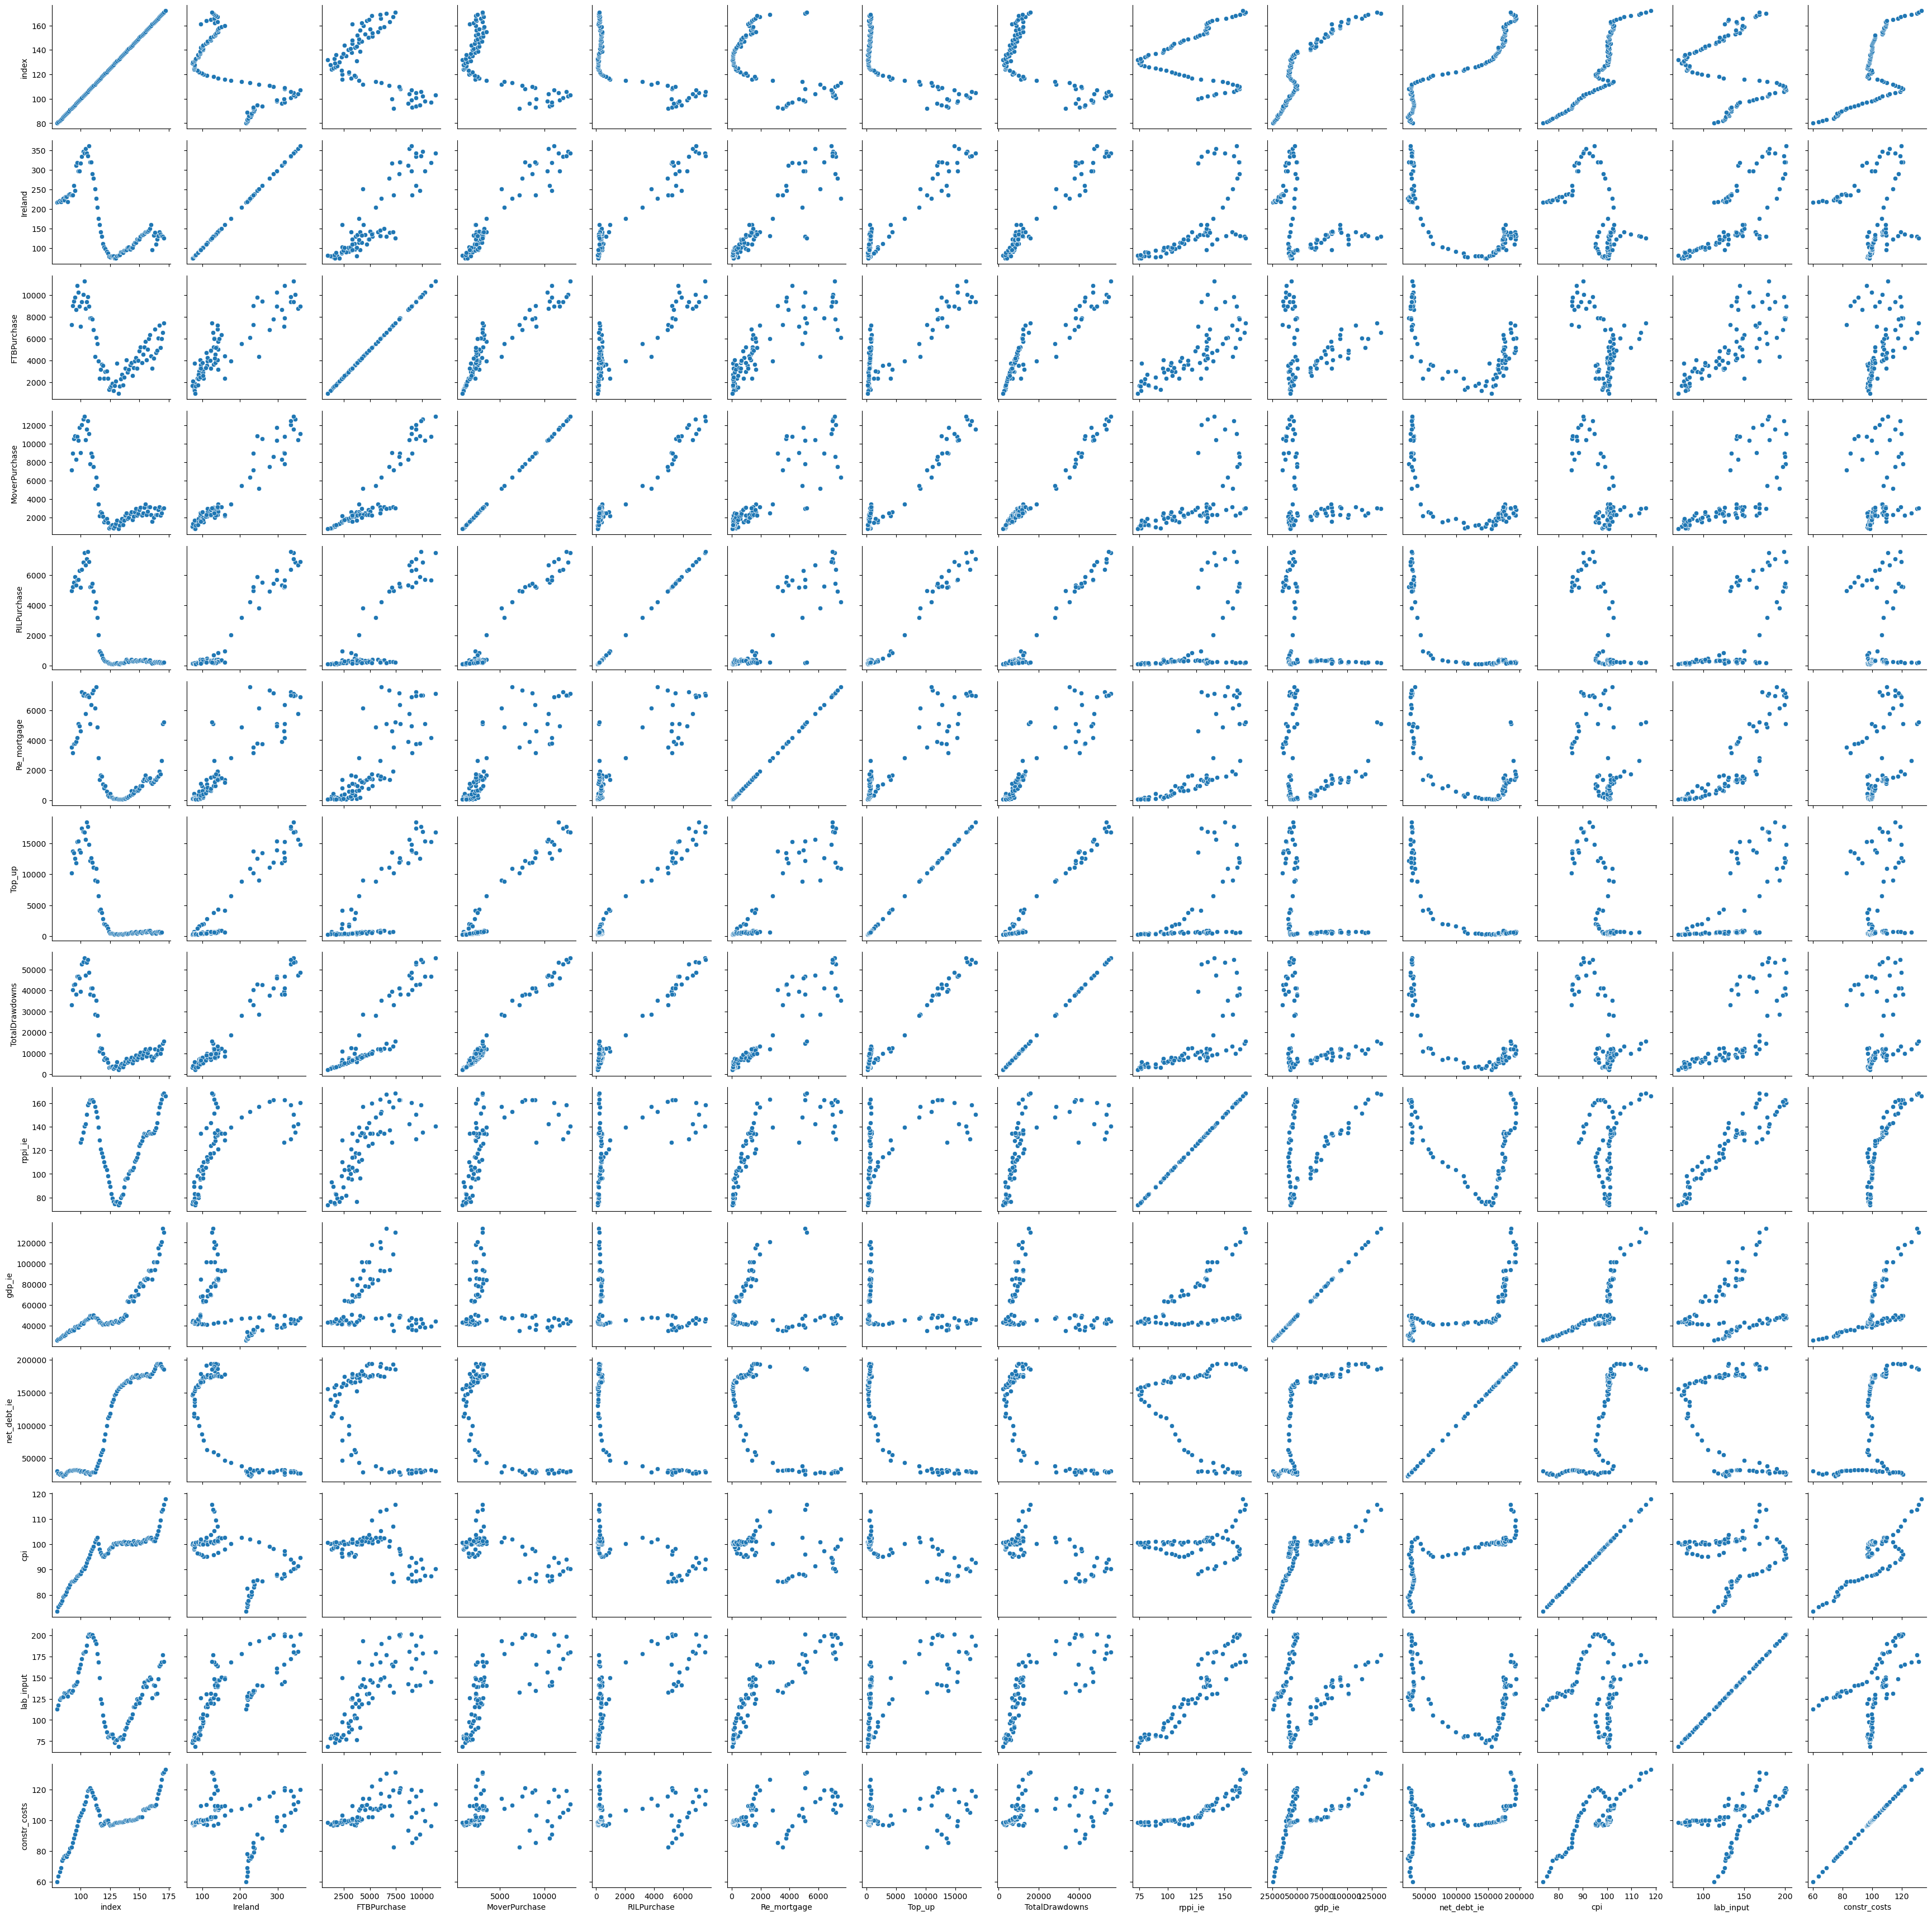

In [268]:
g = sns.PairGrid(ie_df)
g.map(sns.scatterplot)

index   Ireland  FTBPurchase  MoverPurchase  RILPurchase  \
index           1.000000 -0.658302    -0.416044      -0.695083    -0.786858   
Ireland        -0.658302  1.000000     0.880920       0.961324     0.965135   
FTBPurchase    -0.416044  0.880920     1.000000       0.912506     0.839300   
MoverPurchase  -0.695083  0.961324     0.912506       1.000000     0.978145   
RILPurchase    -0.786858  0.965135     0.839300       0.978145     1.000000   
Re_mortgage    -0.540924  0.907847     0.822928       0.868870     0.879707   
Top_up         -0.813911  0.960299     0.849092       0.970380     0.990684   
TotalDrawdowns -0.709706  0.976812     0.905116       0.990098     0.986319   
rppi_ie         0.103705  0.651786     0.783407       0.565567     0.505992   
gdp_ie          0.887752 -0.356757     0.002828      -0.342256    -0.457996   
net_debt_ie     0.941876 -0.792341    -0.555605      -0.772701    -0.855972   
cpi             0.899829 -0.555572    -0.465655      -0.679444    -0.711277   
lab_input      -0.134945  0.766172     0.781789       0.699811     0.676714   
constr_costs    0.658647 -0.018889     0.314569       0.138814     0.100221   

                Re_mortgage    Top_up  TotalDrawdowns   rppi_ie    gdp_ie  \
index             -0.540924 -0.813911       -0.709706  0.103705  0.887752   
Ireland            0.907847  0.960299        0.976812  0.651786 -0.356757   
FTBPurchase        0.822928  0.849092        0.905116  0.783407  0.002828   
MoverPurchase      0.868870  0.970380        0.990098  0.565567 -0.342256   
RILPurchase        0.879707  0.990684        0.986319  0.505992 -0.457996   
Re_mortgage        1.000000  0.919896        0.916567  0.738639 -0.147508   
Top_up             0.919896  1.000000        0.987205  0.550151 -0.486014   
TotalDrawdowns     0.916567  0.987205        1.000000  0.615905 -0.340706   
rppi_ie            0.738639  0.550151        0.615905  1.000000  0.490075   
gdp_ie            -0.147508 -0.486014       -0.340706  0.490075  1.000000   
net_debt_ie       -0.732118 -0.885940       -0.815006 -0.287592  0.758107   
cpi               -0.347693 -0.752127       -0.644902  0.244253  0.761023   
lab_input          0.872282  0.703842        0.749475  0.940334  0.213688   
constr_costs       0.471552  0.150573        0.193059  0.877651  0.674816   

                net_debt_ie       cpi  lab_input  constr_costs  
index              0.941876  0.899829  -0.134945      0.658647  
Ireland           -0.792341 -0.555572   0.766172     -0.018889  
FTBPurchase       -0.555605 -0.465655   0.781789      0.314569  
MoverPurchase     -0.772701 -0.679444   0.699811      0.138814  
RILPurchase       -0.855972 -0.711277   0.676714      0.100221  
Re_mortgage       -0.732118 -0.347693   0.872282      0.471552  
Top_up            -0.885940 -0.752127   0.703842      0.150573  
TotalDrawdowns    -0.815006 -0.644902   0.749475      0.193059  
rppi_ie           -0.287592  0.244253   0.940334      0.877651  
gdp_ie             0.758107  0.761023   0.213688      0.674816  
net_debt_ie        1.000000  0.774872  -0.408712      0.402209  
cpi                0.774872  1.000000  -0.012041      0.833062  
lab_input         -0.408712 -0.012041   1.000000      0.465746  
constr_costs       0.402209  0.833062   0.465746      1.000000

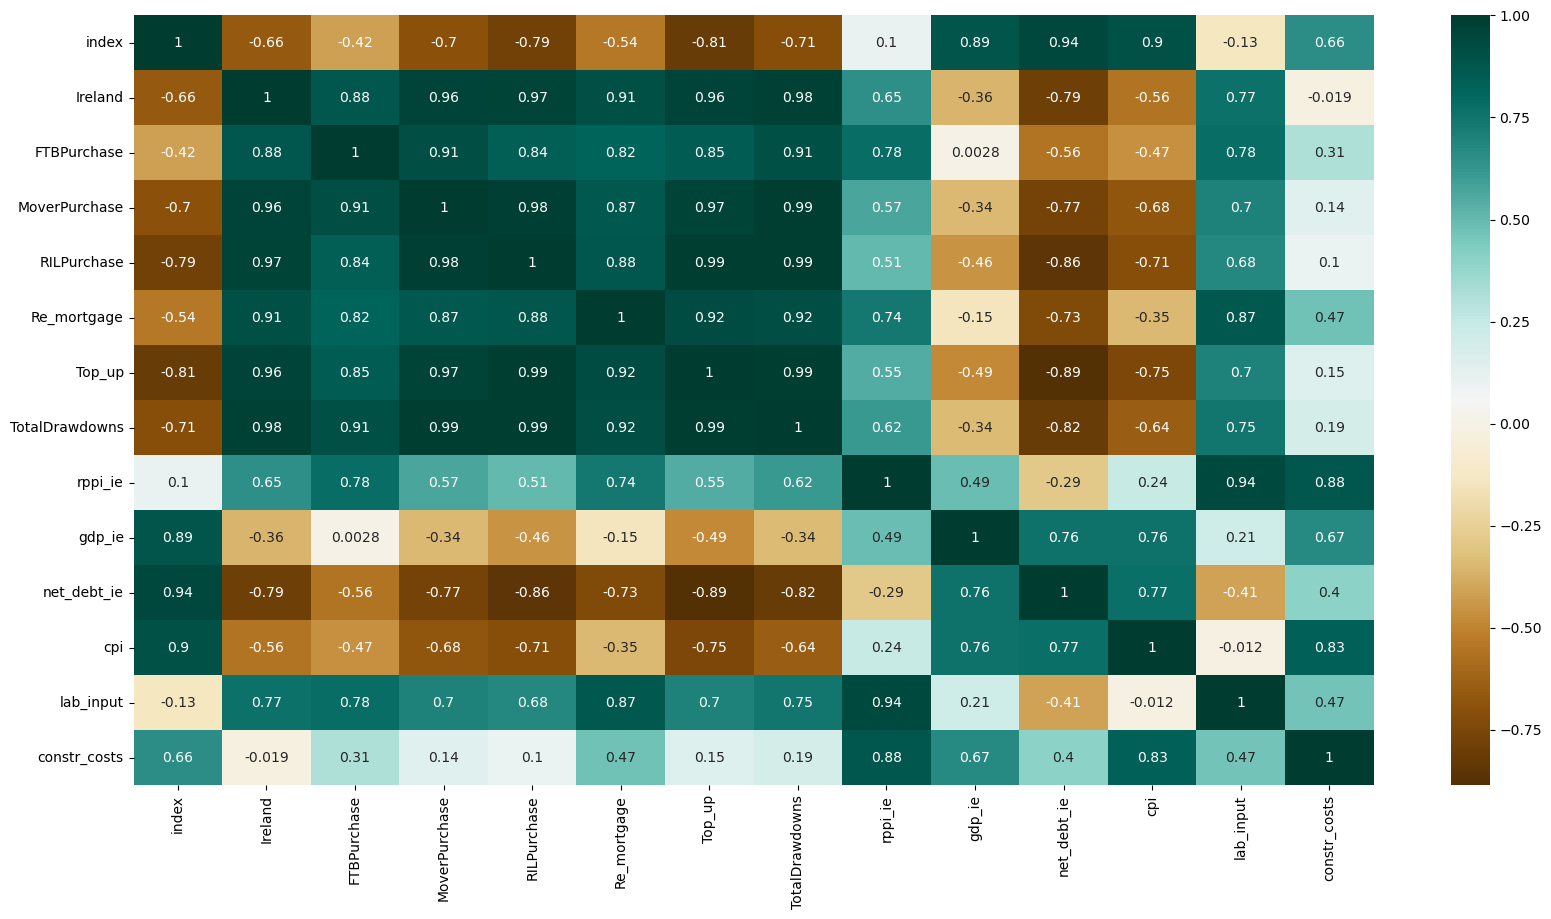

In [269]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
c= ie_df.corr()
plot = sns.heatmap(c,cmap="BrBG",annot=True)
c

In [270]:
from sklearn.impute import KNNImputer
def knn_impute(var, neighbours):
    imputer = KNNImputer(n_neighbors=neighbours)
    values = imputer.fit_transform(var)
    return(values)

In [271]:
ie_df

index  new_ind     Ireland  FTBPurchase  MoverPurchase  RILPurchase  \
0      80  2000-Q1  216.612217          NaN            NaN          NaN   
1      81  2000-Q2  218.514305          NaN            NaN          NaN   
2      82  2000-Q3  220.424981          NaN            NaN          NaN   
3      83  2000-Q4  218.552402          NaN            NaN          NaN   
4      84  2001-Q1  222.520017          NaN            NaN          NaN   
..    ...      ...         ...          ...            ...          ...   
88    168  2022-Q1  135.517776       5184.0         2279.0        191.0   
89    169  2022-Q2  131.527912       5994.0         2476.0        225.0   
90    170  2022-Q3  129.135626       6583.0         3000.0        187.0   
91    171  2022-Q4  125.102539       7435.0         3034.0        220.0   
92    172  2023-Q1         NaN          NaN            NaN          NaN   

    Re_mortgage  Top_up  TotalDrawdowns  rppi_ie    gdp_ie  net_debt_ie  \
0           NaN     NaN             NaN      NaN   25587.0      30644.0   
1           NaN     NaN             NaN      NaN   26774.0      27129.0   
2           NaN     NaN             NaN      NaN   27420.0      25786.0   
3           NaN     NaN             NaN      NaN   28715.0      26892.0   
4           NaN     NaN             NaN      NaN   29812.0      25446.0   
..          ...     ...             ...      ...       ...          ...   
88       1762.0   494.0          9910.0    159.9  117965.0     194105.0   
89       2648.0   642.0         11985.0    163.4  120880.0     189952.0   
90       5081.0     NaN         14851.0    167.7  133964.0     187033.0   
91       5199.0     NaN         15888.0    168.8  129774.0     185391.0   
92          NaN     NaN             NaN    166.2       NaN          NaN   

      cpi  lab_input  constr_costs  
0    73.6      112.8          60.2  
1    75.2      117.6          63.7  
2    76.1      123.8          66.4  
3    76.9      126.0          69.2  
4    77.6      126.9          73.9  
..    ...        ...           ...  
88  109.6      165.4         122.0  
89  113.1      168.3         126.5  
90  113.8      176.7         130.5  
91  115.8      168.5         131.4  
92  118.0        NaN         133.2  

[93 rows x 15 columns]

In [272]:
X = ie_df.iloc[:,2:]

test = knn_impute(X,5)

In [273]:
ie_df_new = pd.DataFrame(test)
ie_df_new.columns = ie_df.columns[2:]
ie_df_new['time'] = ie_df.iloc[:,1]
ie_df_new

Ireland  FTBPurchase  MoverPurchase  RILPurchase  Re_mortgage  \
0   216.612217  8932.269704    9075.052727   5349.01221  3892.125232   
1   218.514305  8932.269704    9075.052727   5349.01221  3892.125232   
2   220.424981  8932.269704    9075.052727   5349.01221  3892.125232   
3   218.552402  8932.269704    9075.052727   5349.01221  3892.125232   
4   222.520017  8932.269704    9075.052727   5349.01221  3892.125232   
..         ...          ...            ...          ...          ...   
88  135.517776  5184.000000    2279.000000    191.00000  1762.000000   
89  131.527912  5994.000000    2476.000000    225.00000  2648.000000   
90  129.135626  6583.000000    3000.000000    187.00000  5081.000000   
91  125.102539  7435.000000    3034.000000    220.00000  5199.000000   
92  132.379112  6487.200000    2784.000000    214.40000  3326.600000   

         Top_up  TotalDrawdowns  rppi_ie    gdp_ie  net_debt_ie    cpi  \
0   12945.45064    40193.910513   139.64   25587.0      30644.0   73.6   
1   12945.45064    40193.910513   139.64   26774.0      27129.0   75.2   
2   12945.45064    40193.910513   139.64   27420.0      25786.0   76.1   
3   12945.45064    40193.910513   139.64   28715.0      26892.0   76.9   
4   12945.45064    40193.910513   139.64   29812.0      25446.0   77.6   
..          ...             ...      ...       ...          ...    ...   
88    494.00000     9910.000000   159.90  117965.0     194105.0  109.6   
89    642.00000    11985.000000   163.40  120880.0     189952.0  113.1   
90    605.60000    14851.000000   167.70  133964.0     187033.0  113.8   
91    629.60000    15888.000000   168.80  129774.0     185391.0  115.8   
92   3061.40000    13186.600000   166.20  122258.6     189853.8  118.0   

    lab_input  constr_costs     time  
0      112.80          60.2  2000-Q1  
1      117.60          63.7  2000-Q2  
2      123.80          66.4  2000-Q3  
3      126.00          69.2  2000-Q4  
4      126.90          73.9  2001-Q1  
..        ...           ...      ...  
88     165.40         122.0  2022-Q1  
89     168.30         126.5  2022-Q2  
90     176.70         130.5  2022-Q3  
91     168.50         131.4  2022-Q4  
92     168.52         133.2  2023-Q1  

[93 rows x 14 columns]

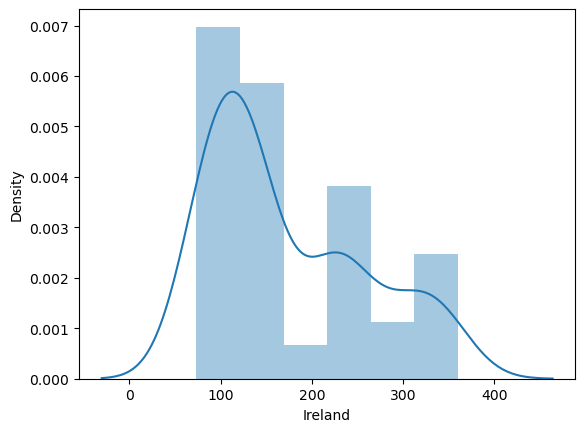

In [275]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.Ireland)
#get = area.get_figure()
#get.savefig('area_dist.png')

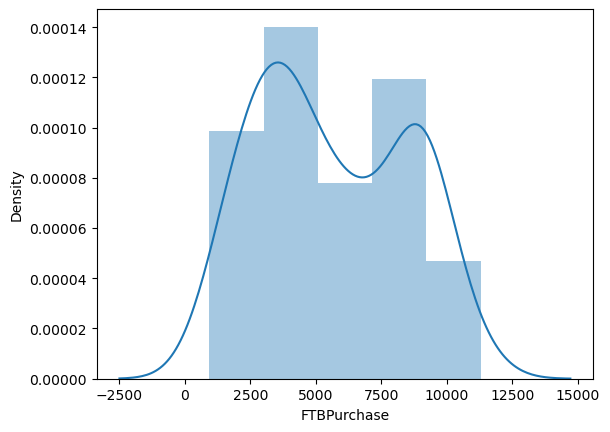

In [276]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.FTBPurchase)

In [278]:
ie_df_new

Ireland  FTBPurchase  MoverPurchase  RILPurchase  Re_mortgage  \
0   216.612217  8932.269704    9075.052727   5349.01221  3892.125232   
1   218.514305  8932.269704    9075.052727   5349.01221  3892.125232   
2   220.424981  8932.269704    9075.052727   5349.01221  3892.125232   
3   218.552402  8932.269704    9075.052727   5349.01221  3892.125232   
4   222.520017  8932.269704    9075.052727   5349.01221  3892.125232   
..         ...          ...            ...          ...          ...   
88  135.517776  5184.000000    2279.000000    191.00000  1762.000000   
89  131.527912  5994.000000    2476.000000    225.00000  2648.000000   
90  129.135626  6583.000000    3000.000000    187.00000  5081.000000   
91  125.102539  7435.000000    3034.000000    220.00000  5199.000000   
92  132.379112  6487.200000    2784.000000    214.40000  3326.600000   

         Top_up  TotalDrawdowns  rppi_ie    gdp_ie  net_debt_ie    cpi  \
0   12945.45064    40193.910513   139.64   25587.0      30644.0   73.6   
1   12945.45064    40193.910513   139.64   26774.0      27129.0   75.2   
2   12945.45064    40193.910513   139.64   27420.0      25786.0   76.1   
3   12945.45064    40193.910513   139.64   28715.0      26892.0   76.9   
4   12945.45064    40193.910513   139.64   29812.0      25446.0   77.6   
..          ...             ...      ...       ...          ...    ...   
88    494.00000     9910.000000   159.90  117965.0     194105.0  109.6   
89    642.00000    11985.000000   163.40  120880.0     189952.0  113.1   
90    605.60000    14851.000000   167.70  133964.0     187033.0  113.8   
91    629.60000    15888.000000   168.80  129774.0     185391.0  115.8   
92   3061.40000    13186.600000   166.20  122258.6     189853.8  118.0   

    lab_input  constr_costs     time  
0      112.80          60.2  2000-Q1  
1      117.60          63.7  2000-Q2  
2      123.80          66.4  2000-Q3  
3      126.00          69.2  2000-Q4  
4      126.90          73.9  2001-Q1  
..        ...           ...      ...  
88     165.40         122.0  2022-Q1  
89     168.30         126.5  2022-Q2  
90     176.70         130.5  2022-Q3  
91     168.50         131.4  2022-Q4  
92     168.52         133.2  2023-Q1  

[93 rows x 14 columns]

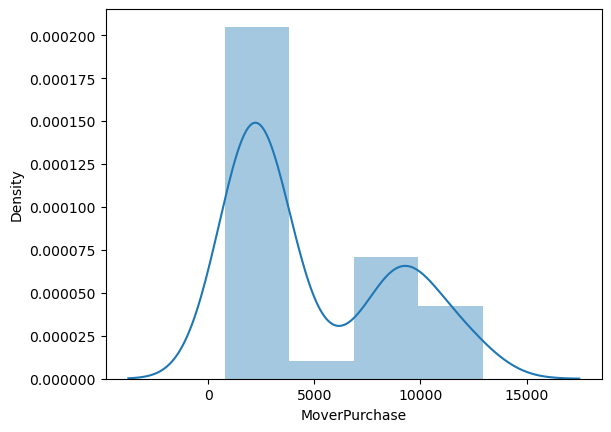

In [279]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.MoverPurchase)

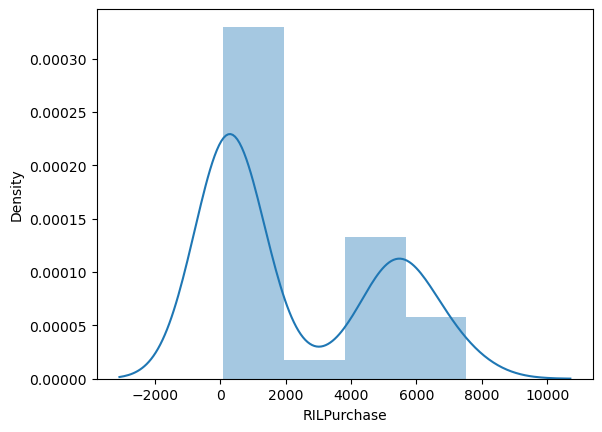

In [280]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.RILPurchase)

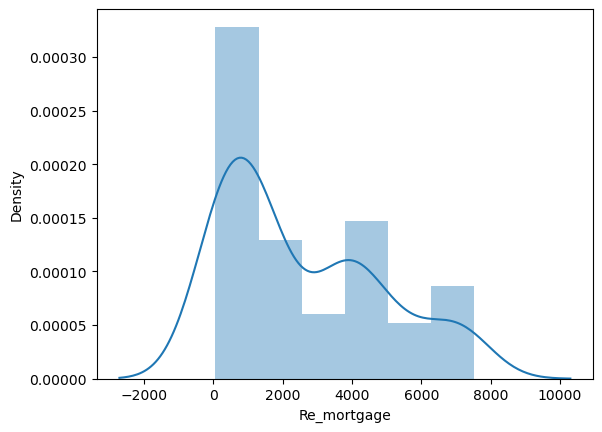

In [281]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.Re_mortgage)

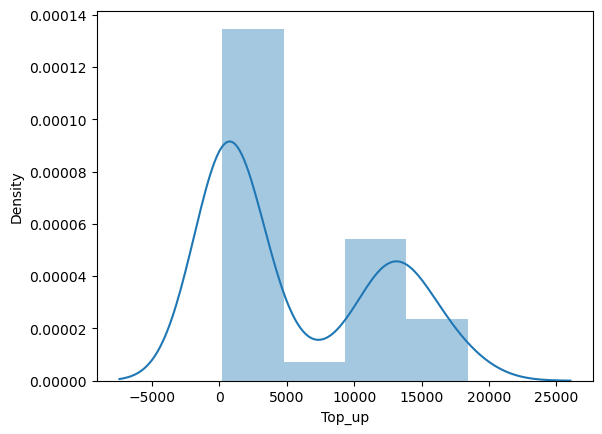

In [282]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.Top_up)

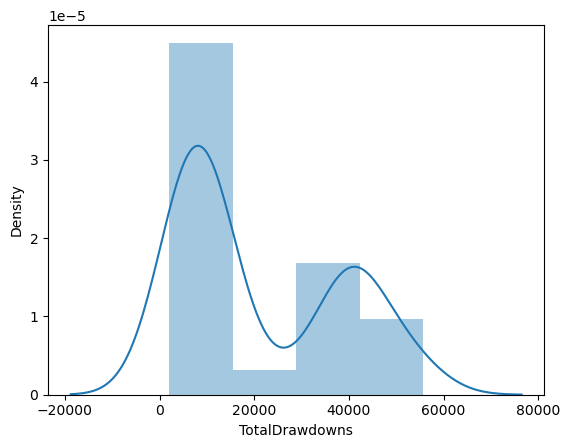

In [283]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.TotalDrawdowns)

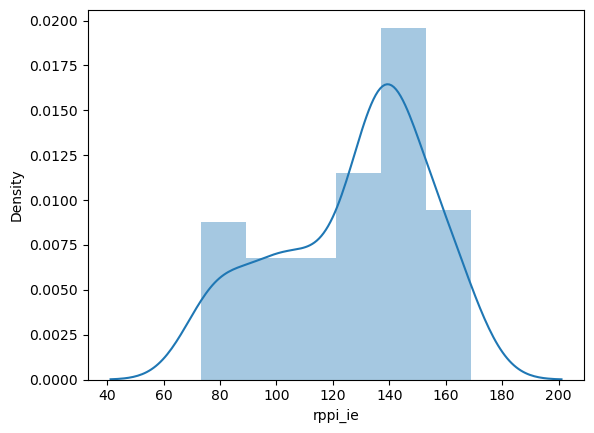

In [284]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.rppi_ie)

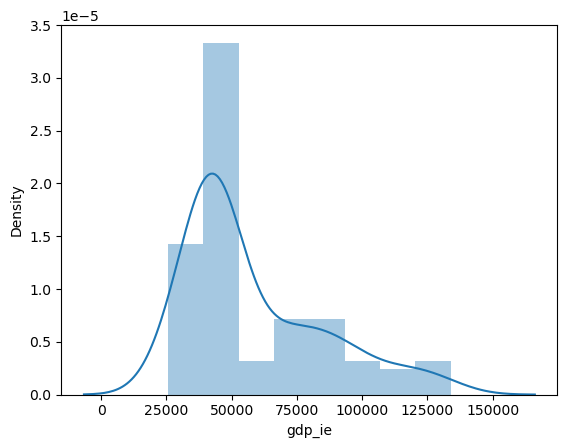

In [285]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.gdp_ie)

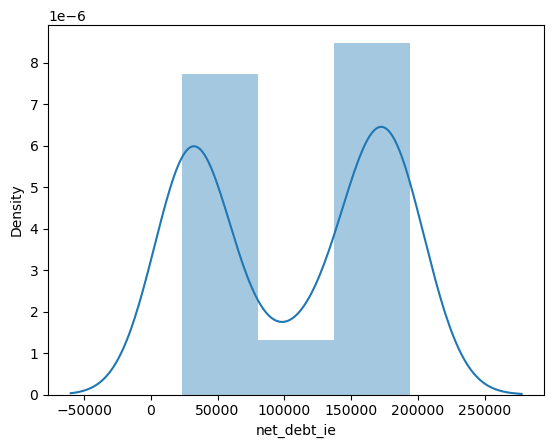

In [286]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.net_debt_ie)

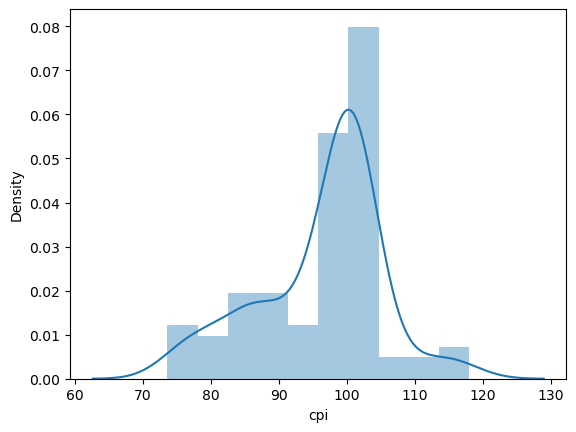

In [287]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.cpi)

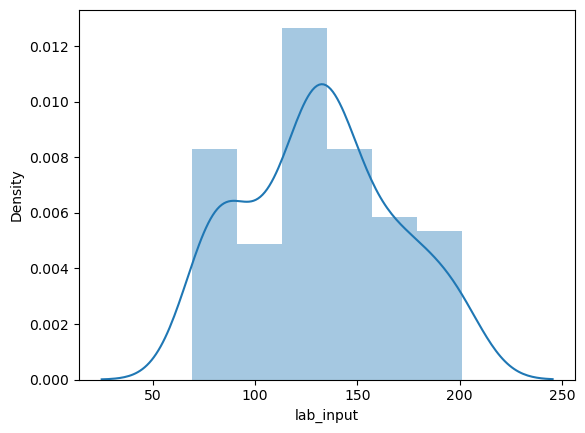

In [288]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.lab_input)

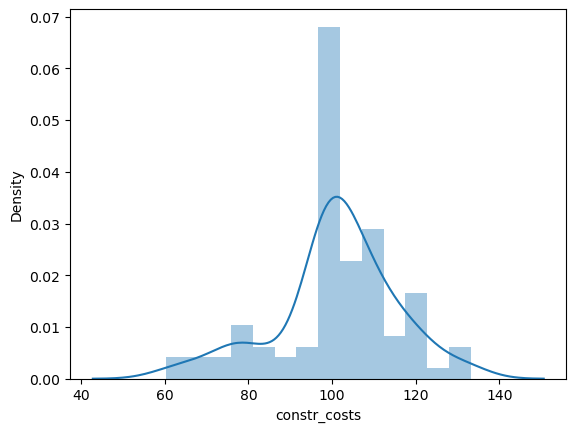

In [289]:
fig, ax = plt.subplots()
area = sns.distplot(ie_df_new.constr_costs)

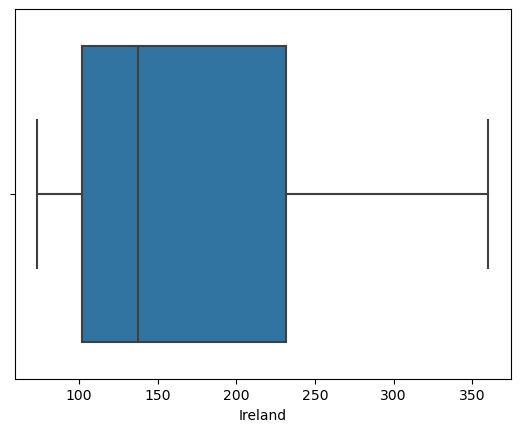

In [292]:
sa = sns.boxplot(x=ie_df_new.Ireland)
#get = sa.get_figure()

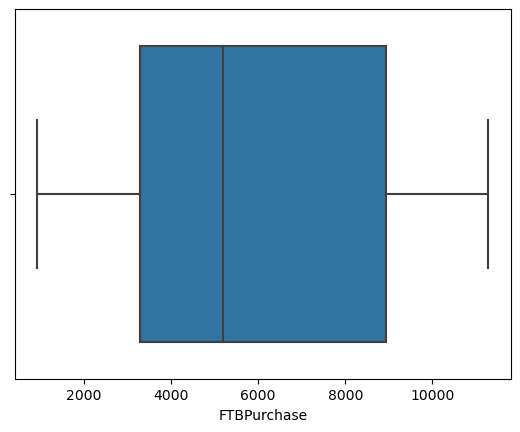

In [293]:
sa = sns.boxplot(x=ie_df_new.FTBPurchase)
#get = sa.get_figure()

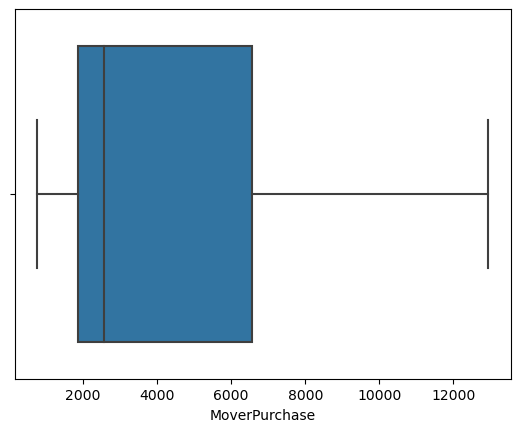

In [294]:
sa = sns.boxplot(x=ie_df.MoverPurchase)
#get = sa.get_figure()

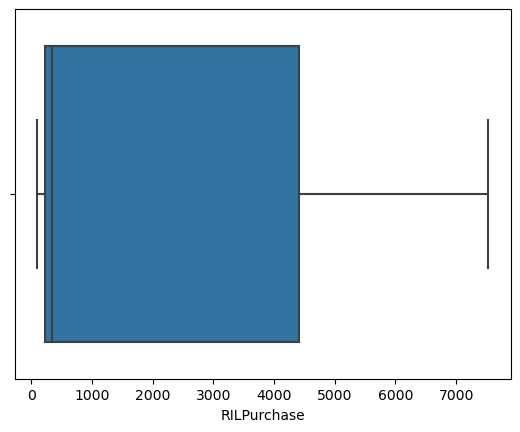

In [295]:
sa = sns.boxplot(x=ie_df.RILPurchase)
#get = sa.get_figure()

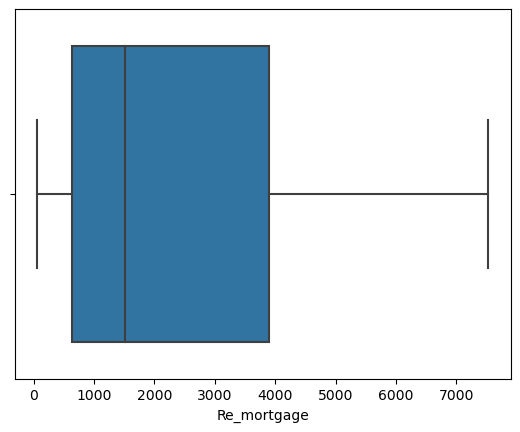

In [296]:
sa = sns.boxplot(x=ie_df_new.Re_mortgage)
#get = sa.get_figure()

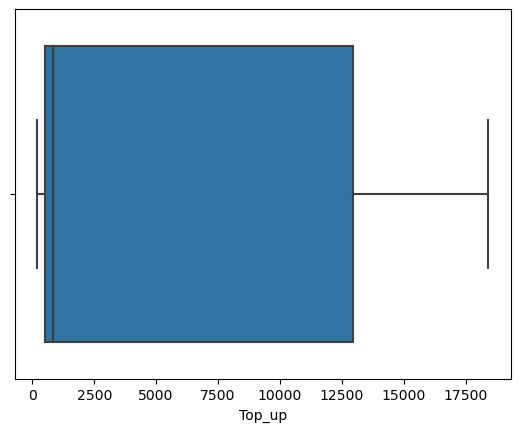

In [297]:
sa = sns.boxplot(x=ie_df_new.Top_up)
#get = sa.get_figure()

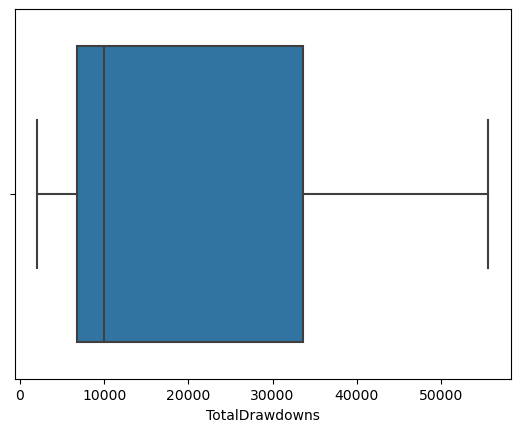

In [298]:
sa = sns.boxplot(x=ie_df.TotalDrawdowns)
#get = sa.get_figure()

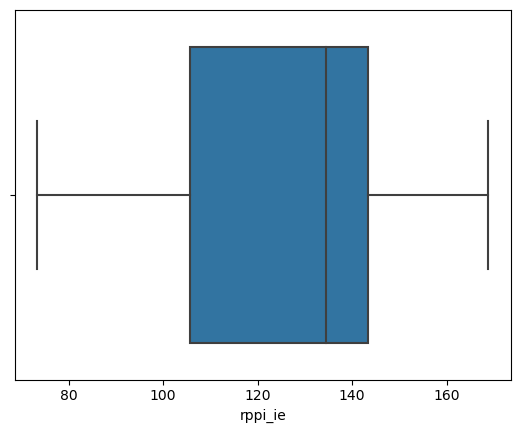

In [299]:
sa = sns.boxplot(x=ie_df_new.rppi_ie)
#get = sa.get_figure()

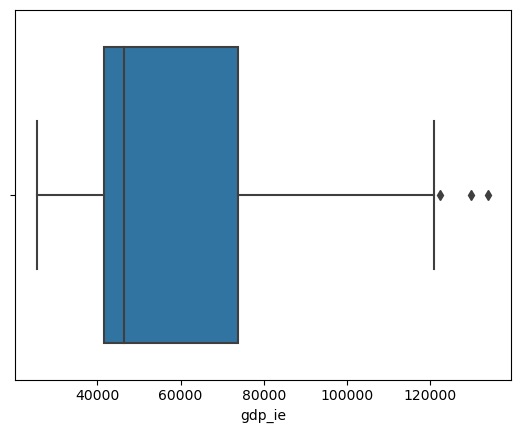

In [300]:
sa = sns.boxplot(x=ie_df_new.gdp_ie)
#get = sa.get_figure()

In [301]:
for x in ['gdp_ie']:
    Q1 = ie_df_new.gdp_ie.quantile(0.25)
    Q3 = ie_df_new.gdp_ie.quantile(0.75)
    IQR = Q3-Q1
 
    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)
 
    ie_df_new.loc[ie_df_new[x] < min,x] = np.nan
    ie_df_new.loc[ie_df_new[x] > max,x] = np.nan

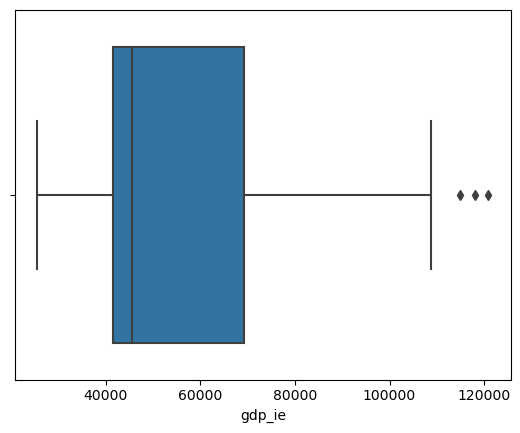

In [302]:
sa = sns.boxplot(x=ie_df_new.gdp_ie)

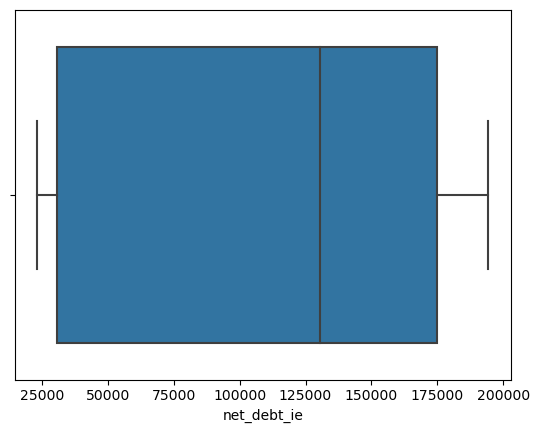

In [303]:
sa = sns.boxplot(x=ie_df_new.net_debt_ie)
#get = sa.get_figure()ie_df_new.net_debt_ie

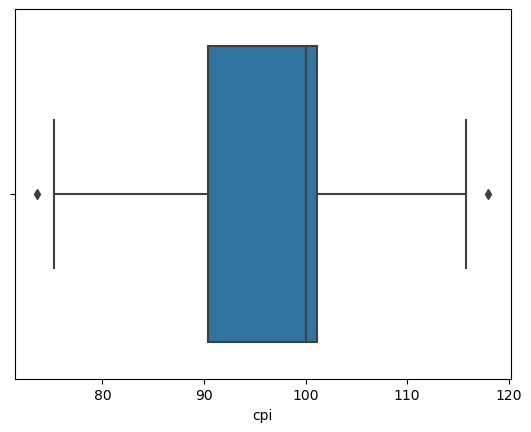

In [304]:
sa = sns.boxplot(x=ie_df_new.cpi)
#get = sa.get_figure()

In [305]:
for x in ['cpi']:
    Q1 = ie_df_new.cpi.quantile(0.25)
    Q3 = ie_df_new.cpi.quantile(0.75)
    IQR = Q3-Q1
 
    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)
 
    ie_df_new.loc[ie_df_new[x] < min,x] = np.nan
    ie_df_new.loc[ie_df_new[x] > max,x] = np.nan

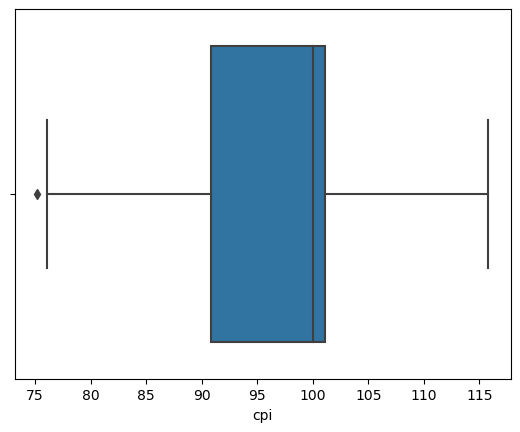

In [306]:
sa = sns.boxplot(x=ie_df_new.cpi)

In [307]:
ie_df_new.isnull().sum()/ie_df_new.shape[0]

Ireland           0.000000
FTBPurchase       0.000000
MoverPurchase     0.000000
RILPurchase       0.000000
Re_mortgage       0.000000
Top_up            0.000000
TotalDrawdowns    0.000000
rppi_ie           0.000000
gdp_ie            0.032258
net_debt_ie       0.000000
cpi               0.021505
lab_input         0.000000
constr_costs      0.000000
time              0.000000
dtype: float64

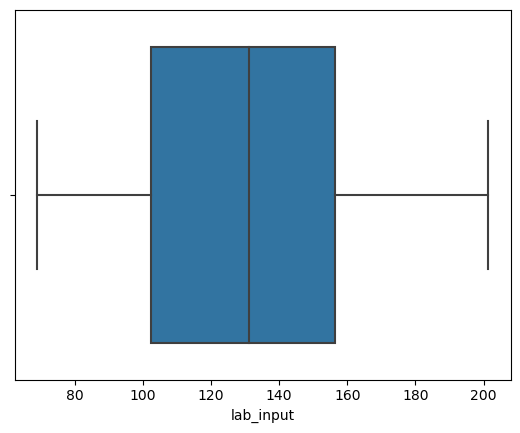

In [308]:
sa = sns.boxplot(x=ie_df_new.lab_input)
#get = sa.get_figure()

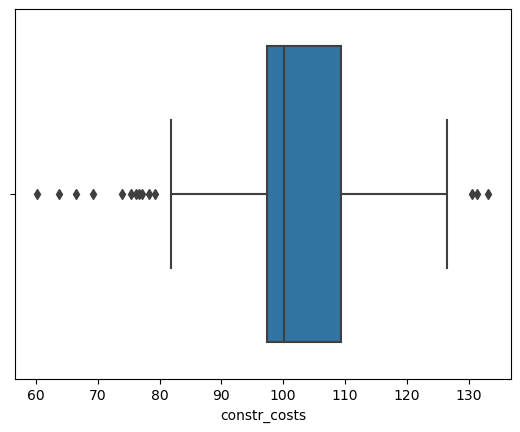

In [309]:
sa = sns.boxplot(x=ie_df_new.constr_costs)
#get = sa.get_figure()

In [310]:
for x in ['constr_costs']:
    Q1 = ie_df_new.constr_costs.quantile(0.25)
    Q3 = ie_df_new.constr_costs.quantile(0.75)
    IQR = Q3-Q1
 
    max = Q3+(1.5*IQR)
    min = Q1-(1.5*IQR)
 
    ie_df_new.loc[ie_df_new[x] < min,x] = np.nan
    ie_df_new.loc[ie_df_new[x] > max,x] = np.nan

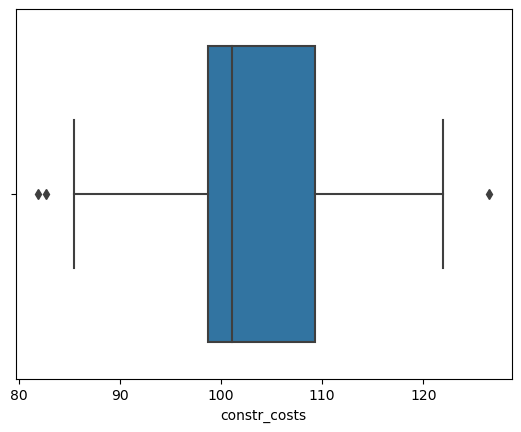

In [311]:
sa = sns.boxplot(x=ie_df_new.constr_costs)

In [312]:
ie_df_new

Ireland  FTBPurchase  MoverPurchase  RILPurchase  Re_mortgage  \
0   216.612217  8932.269704    9075.052727   5349.01221  3892.125232   
1   218.514305  8932.269704    9075.052727   5349.01221  3892.125232   
2   220.424981  8932.269704    9075.052727   5349.01221  3892.125232   
3   218.552402  8932.269704    9075.052727   5349.01221  3892.125232   
4   222.520017  8932.269704    9075.052727   5349.01221  3892.125232   
..         ...          ...            ...          ...          ...   
88  135.517776  5184.000000    2279.000000    191.00000  1762.000000   
89  131.527912  5994.000000    2476.000000    225.00000  2648.000000   
90  129.135626  6583.000000    3000.000000    187.00000  5081.000000   
91  125.102539  7435.000000    3034.000000    220.00000  5199.000000   
92  132.379112  6487.200000    2784.000000    214.40000  3326.600000   

         Top_up  TotalDrawdowns  rppi_ie    gdp_ie  net_debt_ie    cpi  \
0   12945.45064    40193.910513   139.64   25587.0      30644.0    NaN   
1   12945.45064    40193.910513   139.64   26774.0      27129.0   75.2   
2   12945.45064    40193.910513   139.64   27420.0      25786.0   76.1   
3   12945.45064    40193.910513   139.64   28715.0      26892.0   76.9   
4   12945.45064    40193.910513   139.64   29812.0      25446.0   77.6   
..          ...             ...      ...       ...          ...    ...   
88    494.00000     9910.000000   159.90  117965.0     194105.0  109.6   
89    642.00000    11985.000000   163.40  120880.0     189952.0  113.1   
90    605.60000    14851.000000   167.70       NaN     187033.0  113.8   
91    629.60000    15888.000000   168.80       NaN     185391.0  115.8   
92   3061.40000    13186.600000   166.20       NaN     189853.8    NaN   

    lab_input  constr_costs     time  
0      112.80           NaN  2000-Q1  
1      117.60           NaN  2000-Q2  
2      123.80           NaN  2000-Q3  
3      126.00           NaN  2000-Q4  
4      126.90           NaN  2001-Q1  
..        ...           ...      ...  
88     165.40         122.0  2022-Q1  
89     168.30         126.5  2022-Q2  
90     176.70           NaN  2022-Q3  
91     168.50           NaN  2022-Q4  
92     168.52           NaN  2023-Q1  

[93 rows x 14 columns]

In [313]:
X = ie_df_new.iloc[:,:len(ie_df_new.columns)-1]

test = knn_impute(X,5)

In [314]:
len(ie_df_new.columns)

14

In [315]:
ie_df_model = pd.DataFrame(test)
ie_df_model.columns = ie_df.columns[2:]
ie_df_model['time'] = ie_df_new.iloc[:,len(ie_df_new.columns)-1]
ie_df_model

Ireland  FTBPurchase  MoverPurchase  RILPurchase  Re_mortgage  \
0   216.612217  8932.269704    9075.052727   5349.01221  3892.125232   
1   218.514305  8932.269704    9075.052727   5349.01221  3892.125232   
2   220.424981  8932.269704    9075.052727   5349.01221  3892.125232   
3   218.552402  8932.269704    9075.052727   5349.01221  3892.125232   
4   222.520017  8932.269704    9075.052727   5349.01221  3892.125232   
..         ...          ...            ...          ...          ...   
88  135.517776  5184.000000    2279.000000    191.00000  1762.000000   
89  131.527912  5994.000000    2476.000000    225.00000  2648.000000   
90  129.135626  6583.000000    3000.000000    187.00000  5081.000000   
91  125.102539  7435.000000    3034.000000    220.00000  5199.000000   
92  132.379112  6487.200000    2784.000000    214.40000  3326.600000   

         Top_up  TotalDrawdowns  rppi_ie    gdp_ie  net_debt_ie    cpi  \
0   12945.45064    40193.910513   139.64   25587.0      30644.0   77.2   
1   12945.45064    40193.910513   139.64   26774.0      27129.0   75.2   
2   12945.45064    40193.910513   139.64   27420.0      25786.0   76.1   
3   12945.45064    40193.910513   139.64   28715.0      26892.0   76.9   
4   12945.45064    40193.910513   139.64   29812.0      25446.0   77.6   
..          ...             ...      ...       ...          ...    ...   
88    494.00000     9910.000000   159.90  117965.0     194105.0  109.6   
89    642.00000    11985.000000   163.40  120880.0     189952.0  113.1   
90    605.60000    14851.000000   167.70  107943.2     187033.0  113.8   
91    629.60000    15888.000000   168.80  101787.4     185391.0  115.8   
92   3061.40000    13186.600000   166.20  107943.2     189853.8  108.1   

    lab_input  constr_costs     time  
0      112.80         86.36  2000-Q1  
1      117.60         86.36  2000-Q2  
2      123.80         86.36  2000-Q3  
3      126.00         86.36  2000-Q4  
4      126.90         86.36  2001-Q1  
..        ...           ...      ...  
88     165.40        122.00  2022-Q1  
89     168.30        126.50  2022-Q2  
90     176.70        116.58  2022-Q3  
91     168.50        114.36  2022-Q4  
92     168.52        116.58  2023-Q1  

[93 rows x 14 columns]

In [316]:
ie_df_model.describe()

Ireland   FTBPurchase  MoverPurchase  RILPurchase  Re_mortgage  \
count   93.000000     93.000000      93.000000    93.000000    93.000000   
mean   173.080818   5626.827936    4905.555880  2293.504535  2550.278660   
std     85.534797   2830.304574    3749.034484  2624.527906  2286.368127   
min     73.445368    928.000000     770.000000    98.000000    61.000000   
25%    101.791253   3285.000000    2115.993289   239.000000   635.000000   
50%    137.219627   5184.000000    2854.000000   371.000000  1519.000000   
75%    231.451261   8932.269704    9075.052727  5349.012210  3892.125232   
max    360.124471  11284.000000   12941.000000  7529.867562  7531.000000   

             Top_up  TotalDrawdowns     rppi_ie         gdp_ie    net_debt_ie  \
count     93.000000       93.000000   93.000000      93.000000      93.000000   
mean    5659.290977    20993.283794  126.938280   57383.686022  107231.976344   
std     6289.960040    17202.179232   26.574798   24834.297726   68791.821950   
min      204.000000     2068.000000   73.400000   25587.000000   23304.000000   
25%      508.000000     7155.000000  105.600000   41627.000000   30644.000000   
50%      845.000000    11794.000000  134.400000   46324.000000  130429.000000   
75%    12945.450640    40193.910513  143.400000   73860.000000  174797.000000   
max    18412.000000    55617.659320  168.800000  120880.000000  194347.000000   

              cpi   lab_input  constr_costs  
count   93.000000   93.000000     93.000000  
mean    96.227957  131.949677    102.207957  
std      8.750346   36.389770     10.182593  
min     75.200000   69.000000     81.900000  
25%     90.400000  102.400000     97.400000  
50%    100.000000  131.200000    100.200000  
75%    101.100000  156.500000    109.300000  
max    115.800000  201.400000    126.500000

In [317]:
ie_df_model.isnull().sum()/ie_df_model.shape[0]

Ireland           0.0
FTBPurchase       0.0
MoverPurchase     0.0
RILPurchase       0.0
Re_mortgage       0.0
Top_up            0.0
TotalDrawdowns    0.0
rppi_ie           0.0
gdp_ie            0.0
net_debt_ie       0.0
cpi               0.0
lab_input         0.0
constr_costs      0.0
time              0.0
dtype: float64

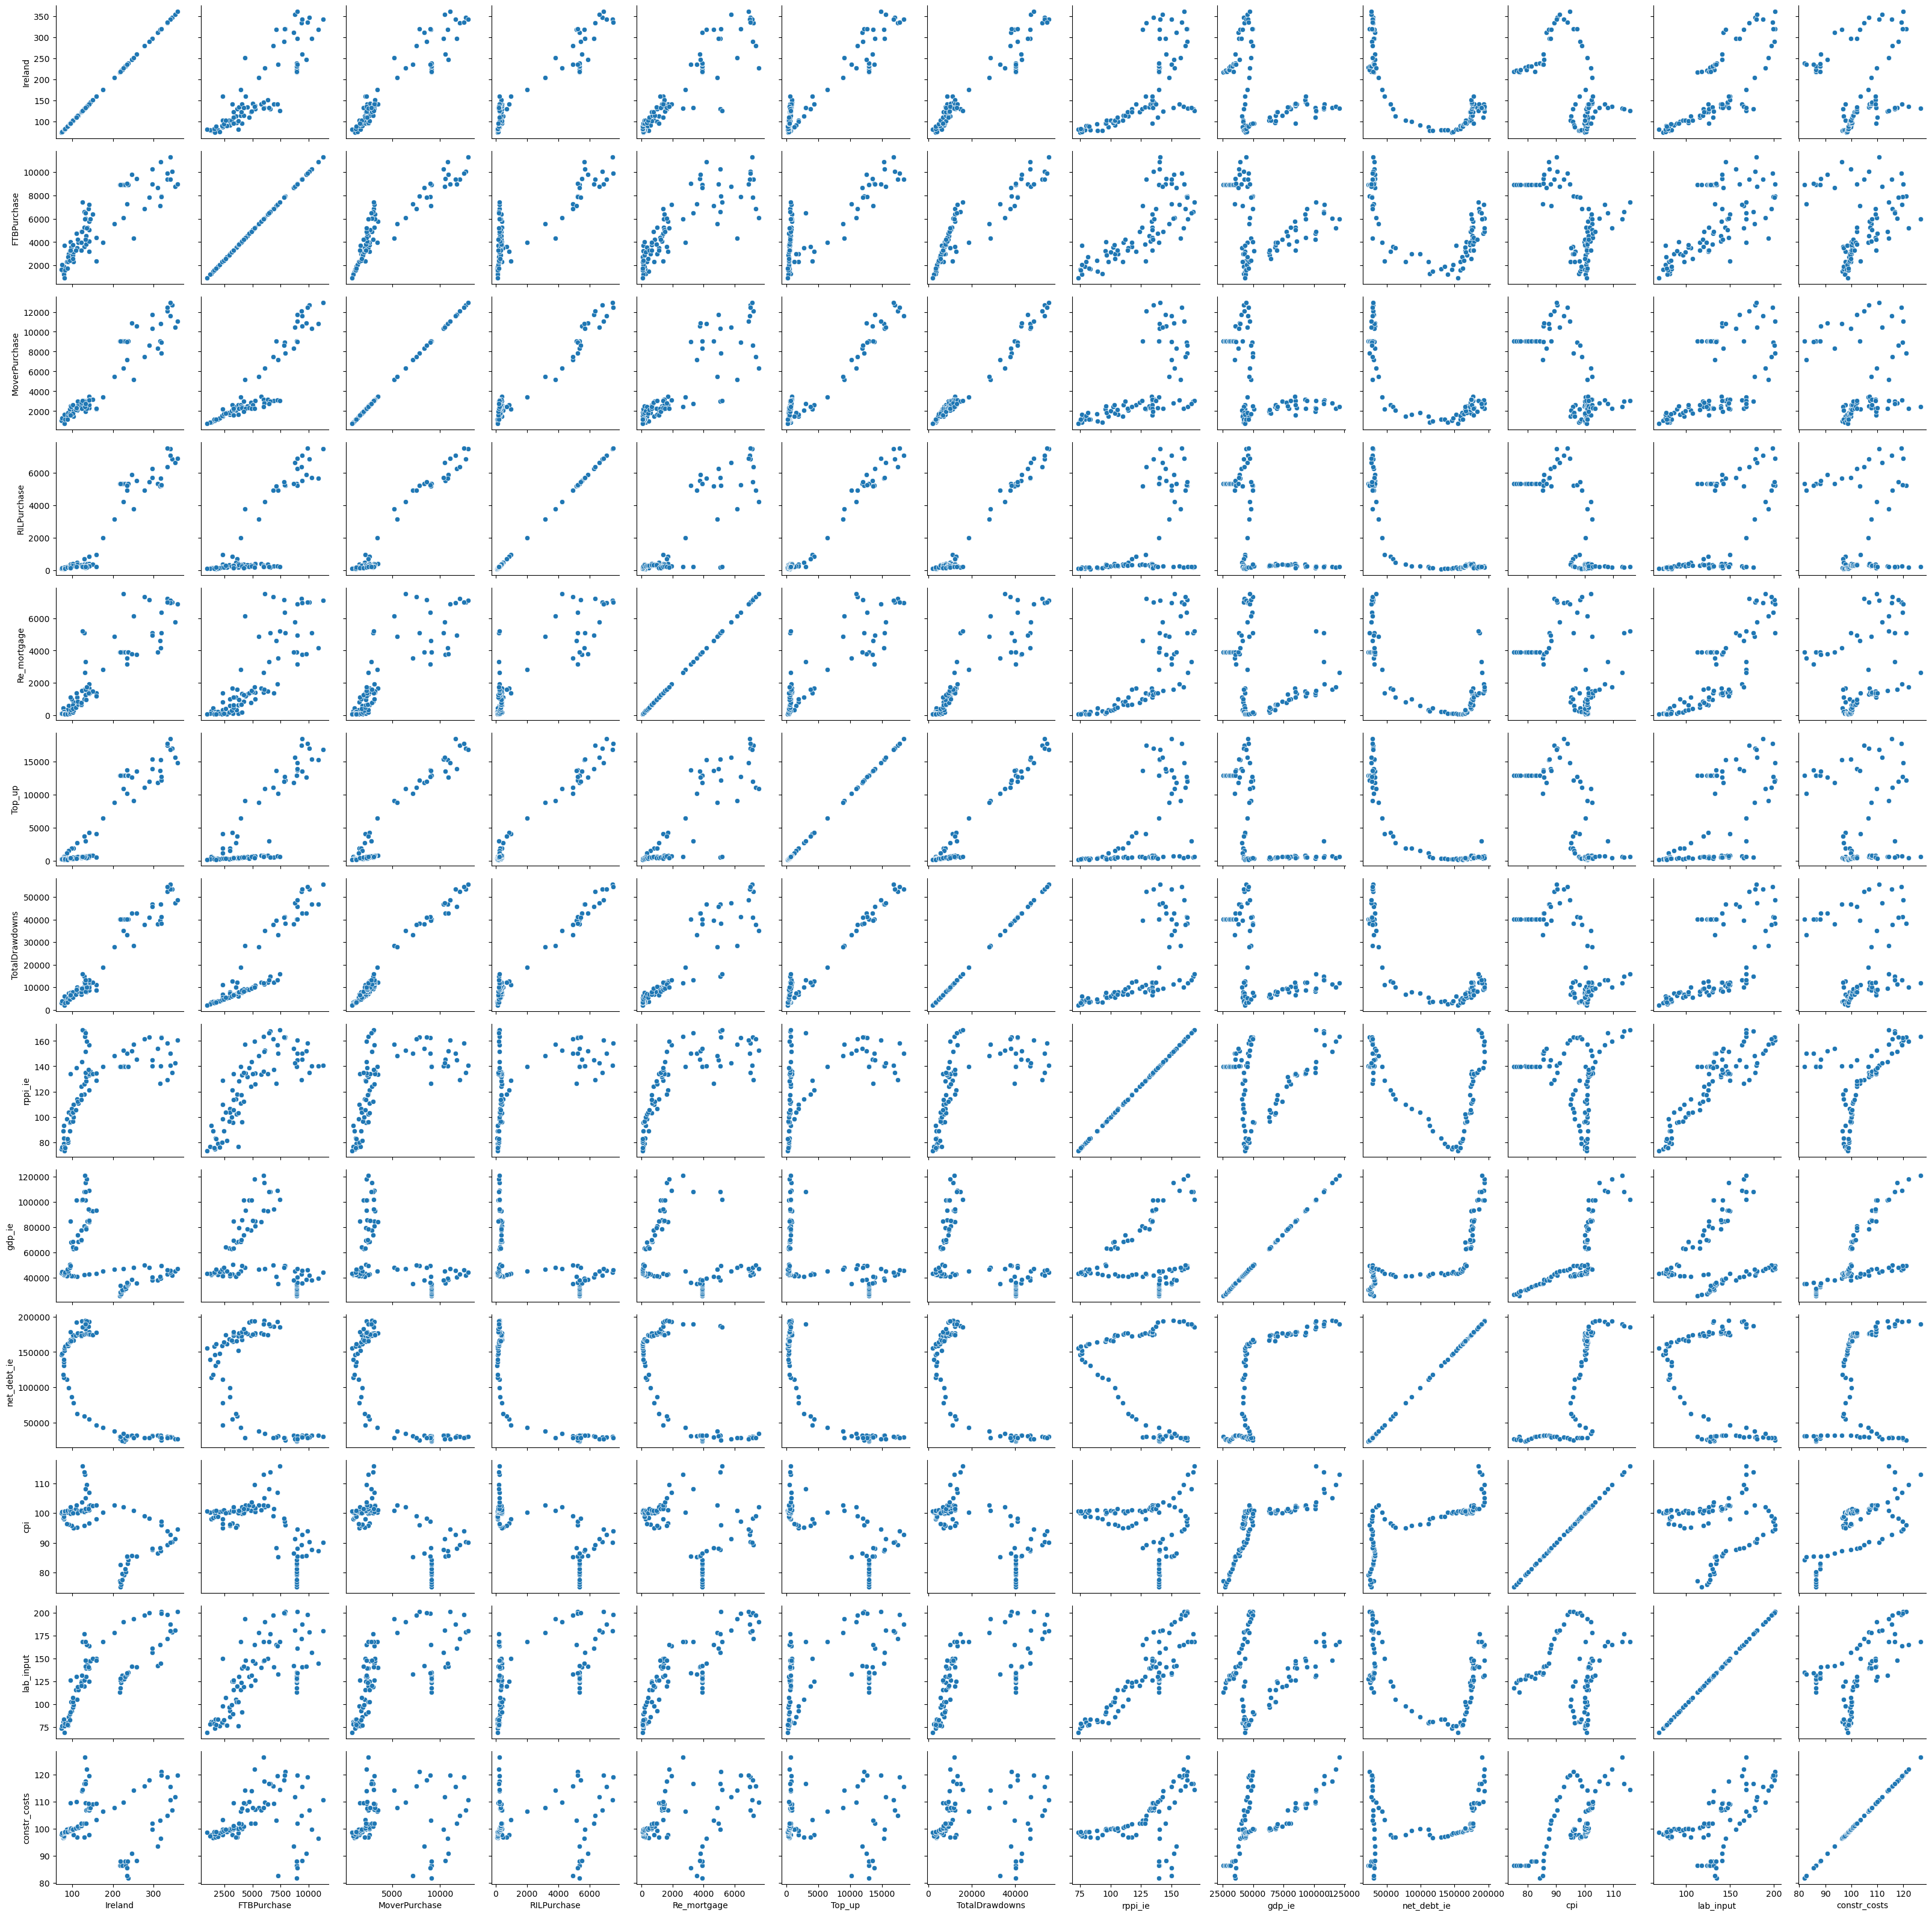

In [318]:
g = sns.PairGrid(ie_df_model)
g.map(sns.scatterplot)

Ireland  FTBPurchase  MoverPurchase  RILPurchase  \
Ireland         1.000000     0.865899       0.944339     0.942786   
FTBPurchase     0.865899     1.000000       0.925201     0.865943   
MoverPurchase   0.944339     0.925201       1.000000     0.981925   
RILPurchase     0.942786     0.865943       0.981925     1.000000   
Re_mortgage     0.908877     0.817909       0.858015     0.861422   
Top_up          0.939099     0.859423       0.975009     0.991876   
TotalDrawdowns  0.957526     0.920343       0.991881     0.988183   
rppi_ie         0.672194     0.760687       0.595081     0.552481   
gdp_ie         -0.366521    -0.192666      -0.471811    -0.571709   
net_debt_ie    -0.791338    -0.636462      -0.815723    -0.885271   
cpi            -0.559974    -0.599568      -0.722521    -0.753505   
lab_input       0.755706     0.671783       0.598660     0.567026   
constr_costs    0.081172    -0.046800      -0.144787    -0.181167   

                Re_mortgage    Top_up  TotalDrawdowns   rppi_ie    gdp_ie  \
Ireland            0.908877  0.939099        0.957526  0.672194 -0.366521   
FTBPurchase        0.817909  0.859423        0.920343  0.760687 -0.192666   
MoverPurchase      0.858015  0.975009        0.991881  0.595081 -0.471811   
RILPurchase        0.861422  0.991876        0.988183  0.552481 -0.571709   
Re_mortgage        1.000000  0.864354        0.900495  0.754954 -0.250782   
Top_up             0.864354  1.000000        0.987084  0.552414 -0.582381   
TotalDrawdowns     0.900495  0.987084        1.000000  0.637750 -0.472977   
rppi_ie            0.754954  0.552414        0.637750  1.000000  0.245635   
gdp_ie            -0.250782 -0.582381       -0.472977  0.245635  1.000000   
net_debt_ie       -0.728776 -0.906376       -0.848775 -0.382226  0.777695   
cpi               -0.383469 -0.754792       -0.701994 -0.148927  0.761883   
lab_input          0.833995  0.569425        0.643993  0.892046  0.215812   
constr_costs       0.223396 -0.184811       -0.108191  0.364430  0.668059   

                net_debt_ie       cpi  lab_input  constr_costs  
Ireland           -0.791338 -0.559974   0.755706      0.081172  
FTBPurchase       -0.636462 -0.599568   0.671783     -0.046800  
MoverPurchase     -0.815723 -0.722521   0.598660     -0.144787  
RILPurchase       -0.885271 -0.753505   0.567026     -0.181167  
Re_mortgage       -0.728776 -0.383469   0.833995      0.223396  
Top_up            -0.906376 -0.754792   0.569425     -0.184811  
TotalDrawdowns    -0.848775 -0.701994   0.643993     -0.108191  
rppi_ie           -0.382226 -0.148927   0.892046      0.364430  
gdp_ie             0.777695  0.761883   0.215812      0.668059  
net_debt_ie        1.000000  0.782041  -0.389941      0.333787  
cpi                0.782041  1.000000   0.000698      0.716505  
lab_input         -0.389941  0.000698   1.000000      0.579879  
constr_costs       0.333787  0.716505   0.579879      1.000000

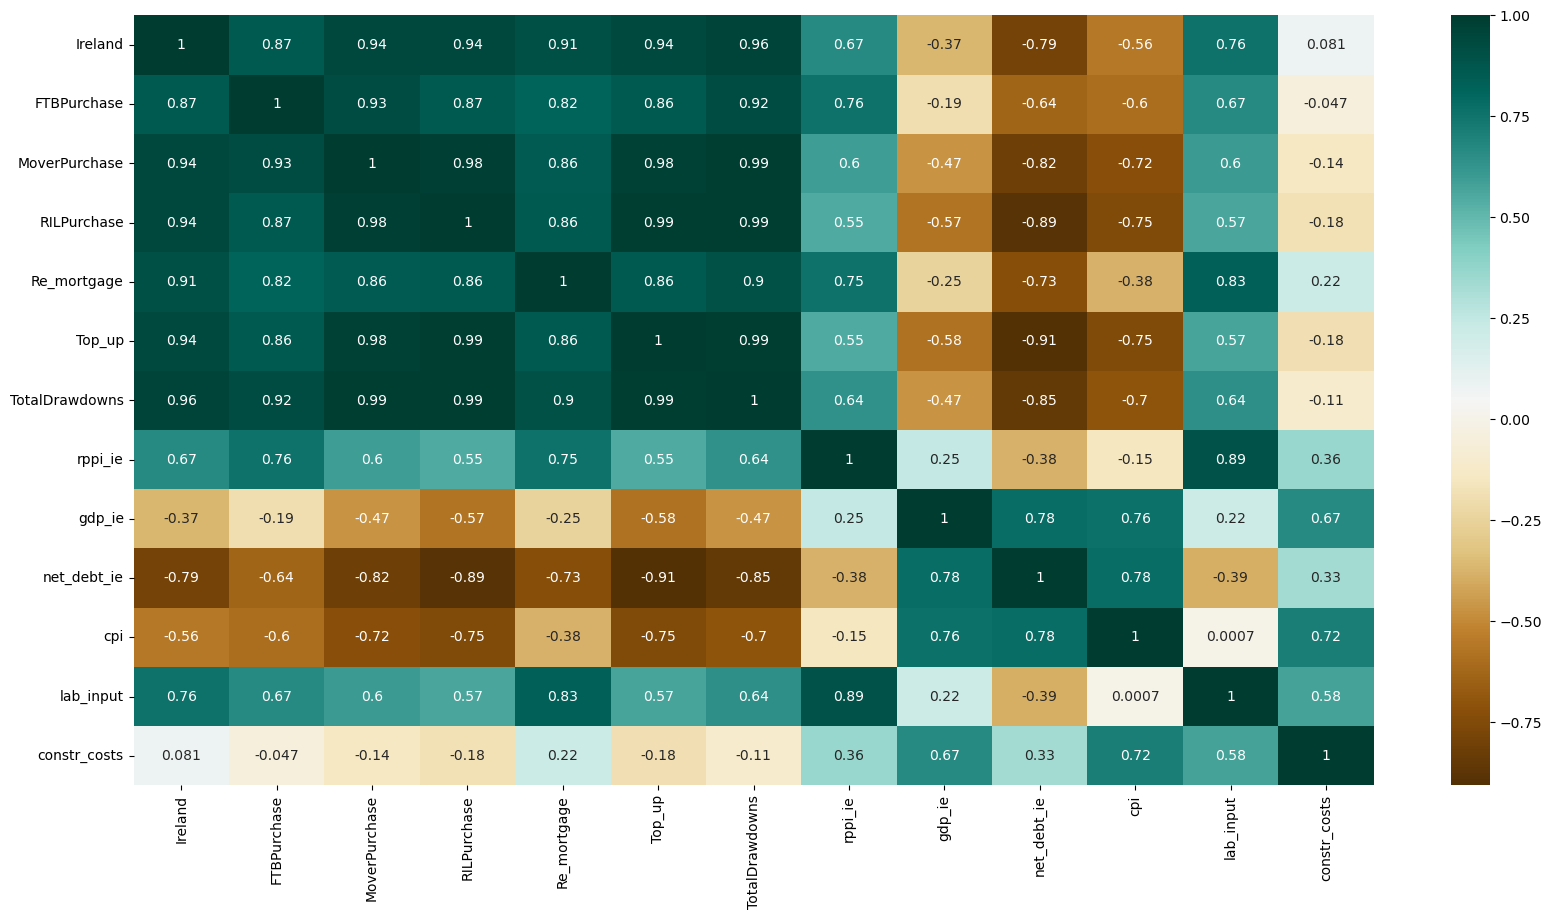

In [319]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
c= ie_df_model.corr()
plot = sns.heatmap(c,cmap="BrBG",annot=True)
c

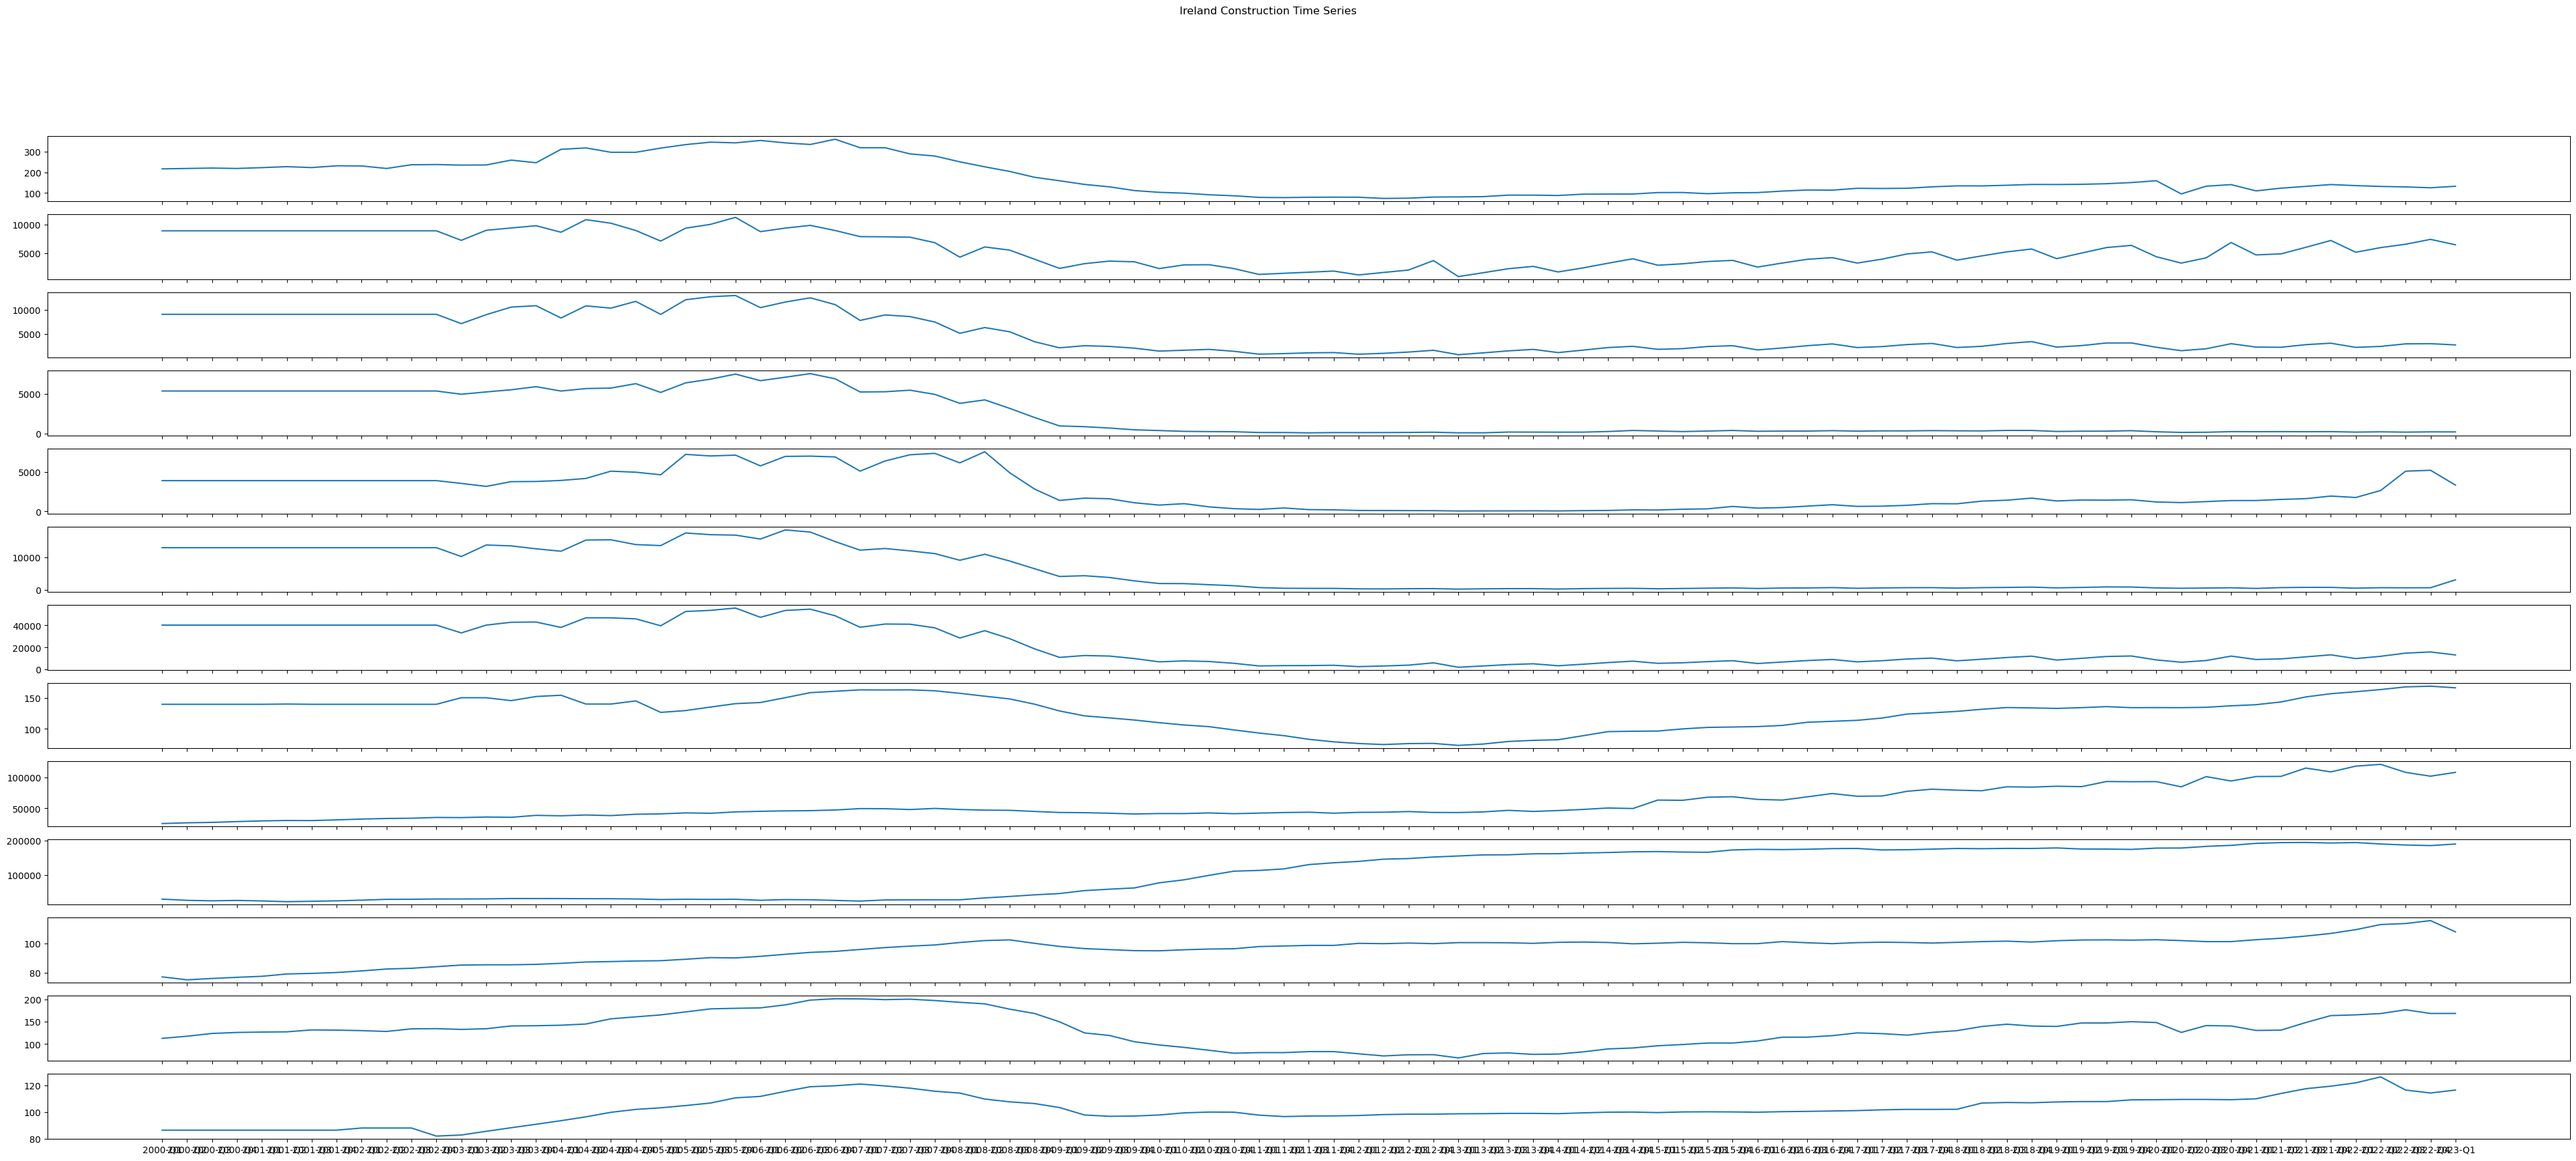

In [321]:
fig, axs = plt.subplots(13, sharex=True, sharey=False, figsize=(50, 20))
fig.suptitle('Ireland Construction Time Series')
#fig.xticks(rotation=45)
#fig.figure(figsize=(20, 3))
axs[0].plot(ie_df_model.time, ie_df_model.Ireland)
axs[1].plot(ie_df_model.time, ie_df_model.FTBPurchase)
axs[2].plot(ie_df_model.time, ie_df_model.MoverPurchase)
axs[3].plot(ie_df_model.time, ie_df_model.RILPurchase)
axs[4].plot(ie_df_model.time, ie_df_model.Re_mortgage)
axs[5].plot(ie_df_model.time, ie_df_model.Top_up)
axs[6].plot(ie_df_model.time, ie_df_model.TotalDrawdowns)
axs[7].plot(ie_df_model.time, ie_df_model.rppi_ie)
axs[8].plot(ie_df_model.time, ie_df_model.gdp_ie)
axs[9].plot(ie_df_model.time, ie_df_model.net_debt_ie)
axs[10].plot(ie_df_model.time, ie_df_model.cpi)
axs[11].plot(ie_df_model.time, ie_df_model.lab_input)
axs[12].plot(ie_df_model.time, ie_df_model.constr_costs)

In [322]:
for x in range(0,len(ie_df_model.columns)-1):
    cols = ie_df_model.columns
    ie_df_model[cols[x]+'_lag1'] = ie_df_model[cols[x]].shift(1)
    
ie_df_model.head()

Ireland  FTBPurchase  MoverPurchase  RILPurchase  Re_mortgage  \
0  216.612217  8932.269704    9075.052727   5349.01221  3892.125232   
1  218.514305  8932.269704    9075.052727   5349.01221  3892.125232   
2  220.424981  8932.269704    9075.052727   5349.01221  3892.125232   
3  218.552402  8932.269704    9075.052727   5349.01221  3892.125232   
4  222.520017  8932.269704    9075.052727   5349.01221  3892.125232   

        Top_up  TotalDrawdowns  rppi_ie   gdp_ie  net_debt_ie  ...  \
0  12945.45064    40193.910513   139.64  25587.0      30644.0  ...   
1  12945.45064    40193.910513   139.64  26774.0      27129.0  ...   
2  12945.45064    40193.910513   139.64  27420.0      25786.0  ...   
3  12945.45064    40193.910513   139.64  28715.0      26892.0  ...   
4  12945.45064    40193.910513   139.64  29812.0      25446.0  ...   

   RILPurchase_lag1  Re_mortgage_lag1  Top_up_lag1 TotalDrawdowns_lag1  \
0               NaN               NaN          NaN                 NaN   
1        5349.01221       3892.125232  12945.45064        40193.910513   
2        5349.01221       3892.125232  12945.45064        40193.910513   
3        5349.01221       3892.125232  12945.45064        40193.910513   
4        5349.01221       3892.125232  12945.45064        40193.910513   

   rppi_ie_lag1  gdp_ie_lag1  net_debt_ie_lag1  cpi_lag1  lab_input_lag1  \
0           NaN          NaN               NaN       NaN             NaN   
1        139.64      25587.0           30644.0      77.2           112.8   
2        139.64      26774.0           27129.0      75.2           117.6   
3        139.64      27420.0           25786.0      76.1           123.8   
4        139.64      28715.0           26892.0      76.9           126.0   

   constr_costs_lag1  
0                NaN  
1              86.36  
2              86.36  
3              86.36  
4              86.36  

[5 rows x 27 columns]

In [323]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import warnings # supress warnings
warnings.filterwarnings('ignore')

In [324]:
ie_df_model.iloc[:,:len(ie_df_model.columns)-1]

Ireland  FTBPurchase  MoverPurchase  RILPurchase  Re_mortgage  \
0   216.612217  8932.269704    9075.052727   5349.01221  3892.125232   
1   218.514305  8932.269704    9075.052727   5349.01221  3892.125232   
2   220.424981  8932.269704    9075.052727   5349.01221  3892.125232   
3   218.552402  8932.269704    9075.052727   5349.01221  3892.125232   
4   222.520017  8932.269704    9075.052727   5349.01221  3892.125232   
..         ...          ...            ...          ...          ...   
88  135.517776  5184.000000    2279.000000    191.00000  1762.000000   
89  131.527912  5994.000000    2476.000000    225.00000  2648.000000   
90  129.135626  6583.000000    3000.000000    187.00000  5081.000000   
91  125.102539  7435.000000    3034.000000    220.00000  5199.000000   
92  132.379112  6487.200000    2784.000000    214.40000  3326.600000   

         Top_up  TotalDrawdowns  rppi_ie    gdp_ie  net_debt_ie  ...  \
0   12945.45064    40193.910513   139.64   25587.0      30644.0  ...   
1   12945.45064    40193.910513   139.64   26774.0      27129.0  ...   
2   12945.45064    40193.910513   139.64   27420.0      25786.0  ...   
3   12945.45064    40193.910513   139.64   28715.0      26892.0  ...   
4   12945.45064    40193.910513   139.64   29812.0      25446.0  ...   
..          ...             ...      ...       ...          ...  ...   
88    494.00000     9910.000000   159.90  117965.0     194105.0  ...   
89    642.00000    11985.000000   163.40  120880.0     189952.0  ...   
90    605.60000    14851.000000   167.70  107943.2     187033.0  ...   
91    629.60000    15888.000000   168.80  101787.4     185391.0  ...   
92   3061.40000    13186.600000   166.20  107943.2     189853.8  ...   

    MoverPurchase_lag1  RILPurchase_lag1  Re_mortgage_lag1  Top_up_lag1  \
0                  NaN               NaN               NaN          NaN   
1          9075.052727        5349.01221       3892.125232  12945.45064   
2          9075.052727        5349.01221       3892.125232  12945.45064   
3          9075.052727        5349.01221       3892.125232  12945.45064   
4          9075.052727        5349.01221       3892.125232  12945.45064   
..                 ...               ...               ...          ...   
88         3131.000000         249.00000       1943.000000    736.00000   
89         2279.000000         191.00000       1762.000000    494.00000   
90         2476.000000         225.00000       2648.000000    642.00000   
91         3000.000000         187.00000       5081.000000    605.60000   
92         3034.000000         220.00000       5199.000000    629.60000   

    TotalDrawdowns_lag1  rppi_ie_lag1  gdp_ie_lag1  net_debt_ie_lag1  \
0                   NaN           NaN          NaN               NaN   
1          40193.910513        139.64      25587.0           30644.0   
2          40193.910513        139.64      26774.0           27129.0   
3          40193.910513        139.64      27420.0           25786.0   
4          40193.910513        139.64      28715.0           26892.0   
..                  ...           ...          ...               ...   
88         13299.000000        156.70     108710.0          192788.0   
89          9910.000000        159.90     117965.0          194105.0   
90         11985.000000        163.40     120880.0          189952.0   
91         14851.000000        167.70     107943.2          187033.0   
92         15888.000000        168.80     101787.4          185391.0   

    cpi_lag1  lab_input_lag1  
0        NaN             NaN  
1       77.2           112.8  
2       75.2           117.6  
3       76.1           123.8  
4       76.9           126.0  
..       ...             ...  
88     107.0           163.7  
89     109.6           165.4  
90     113.1           168.3  
91     113.8           176.7  
92     115.8           168.5  

[93 rows x 26 columns]

In [325]:
ie_df_model.columns

Index(['Ireland', 'FTBPurchase', 'MoverPurchase', 'RILPurchase', 'Re_mortgage',
       'Top_up', 'TotalDrawdowns', 'rppi_ie', 'gdp_ie', 'net_debt_ie', 'cpi',
       'lab_input', 'constr_costs', 'time', 'Ireland_lag1', 'FTBPurchase_lag1',
       'MoverPurchase_lag1', 'RILPurchase_lag1', 'Re_mortgage_lag1',
       'Top_up_lag1', 'TotalDrawdowns_lag1', 'rppi_ie_lag1', 'gdp_ie_lag1',
       'net_debt_ie_lag1', 'cpi_lag1', 'lab_input_lag1', 'constr_costs_lag1'],
      dtype='object')

In [326]:
def remove_highly_correlated(df, threshold):
    # Create correlation matrix
    corr_matrix = df.corr().abs()
    
    # Select upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # Find index of variable columns to drop
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Drop highly correlated variables
    df_filtered = df.drop(to_drop, axis=1)
    
    return df_filtered

In [327]:
# final model
n_features_optimal = 4

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

NameError: name 'X_train' is not defined

### Gradient Boosting Regression

In [328]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [329]:
def remove_highly_correlated(df, threshold):
    # Create correlation matrix
    corr_matrix = df.corr().abs()
    
    # Select upper triangle of the correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # Find index of variable columns to drop
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # Drop highly correlated variables
    df_filtered = df.drop(to_drop, axis=1)
    
    return df_filtered

In [330]:
model_vars = remove_highly_correlated(ie_df_model, 0.8)
model_vars = model_vars.drop(['time'],axis=1)

In [334]:
X = ie_df_model.drop(['Ireland','time'], axis = 1)
y = ie_df_model.Ireland

In [335]:
X = X.iloc[1:,:]
y = y[1:]

In [336]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2,random_state=109)

In [338]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_estimators': [5,50,250,500],
          'max_depth': [1,3,5,7,9],
          'learning_rate': [0.01,0.1,1,10,100],
          'loss': ['squared_error','absolute_error','huber','quantile']}]


# step-3: perform grid search
# 3.1 specify model
gbr = GradientBoostingRegressor()
            
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = gbr, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=GradientBoostingRegressor(),
             param_grid=[{'learning_rate': [0.01, 0.1, 1, 10, 100],
                          'loss': ['squared_error', 'absolute_error', 'huber',
                                   'quantile'],
                          'max_depth': [1, 3, 5, 7, 9],
                          'n_estimators': [5, 50, 250, 500]}],
             return_train_score=True, scoring='r2', verbose=1)

In [343]:
print("Best hyperparameters: ", model_cv.best_params_)
print("Best score: ", model_cv.best_score_)

Best hyperparameters:  {'learning_rate': 0.1, 'loss': 'squared_error', 'max_depth': 3, 'n_estimators': 500}
Best score:  0.9653831256234895


In [344]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, loss = 'squared_error',
                               max_depth = 3, n_estimators = 500)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=500)

In [345]:
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
#
# Create the root mean squared error
#
mse = np.sqrt(mean_squared_error(y_test, gbr.predict(X_test)))
print("The root mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.984
The root mean squared error (MSE) on test set: 11.5707


In [362]:
variables_gb = list(X.columns[sorted_idx])
feat_imp_gb = list(feature_importance[sorted_idx])
feat_imp = pd.DataFrame()
feat_imp['Variables'] = variables_gb
feat_imp['Gradient_Boosting'] = feat_imp_gb

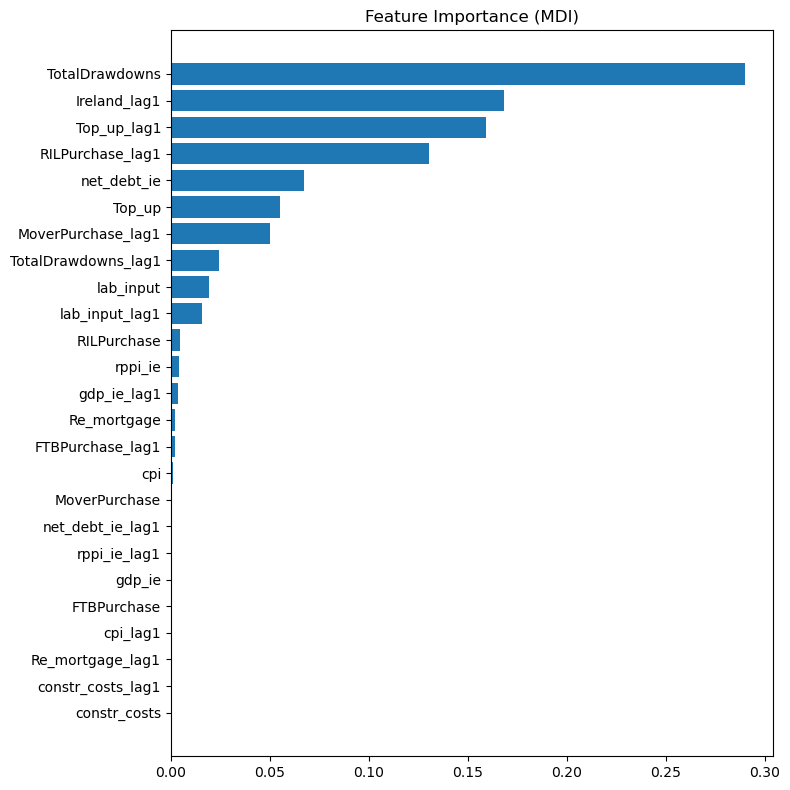

In [346]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
#
# Get Feature importance data using feature_importances_ attribute
#
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(8, 8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')
result = permutation_importance(gbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
fig.tight_layout()
plt.show()

### Ridge Regression

In [363]:
X = ie_df_model.drop(['Ireland', 'time'], axis = 1)
y = ie_df_model.Ireland

In [364]:
X = X.iloc[1:,:]
y = y[1:]

In [365]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [366]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2,random_state=156)

In [367]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'alpha': [.1,1,5,10,20,25]}]


# step-3: perform grid search
# 3.1 specify model
ridge = Ridge()
            
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(), param_grid=[{'alpha': [0.1, 1, 5, 10, 20, 25]}],
             return_train_score=True, scoring='r2', verbose=1)

In [368]:
print("Best hyperparameters: ", model_cv.best_params_)
print("Best score: ", model_cv.best_score_)

Best hyperparameters:  {'alpha': 0.1}
Best score:  0.970218884219315


In [369]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Ridge Regression Model
ridgeReg = Ridge(alpha=0.1)

ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [370]:
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % ridgeReg.score(X_test, y_test))
#
# Create the root mean squared error
#
mse = np.sqrt(mean_squared_error(y_test, ridgeReg.predict(X_test)))
print("The root mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.974
The root mean squared error (MSE) on test set: 11.3336


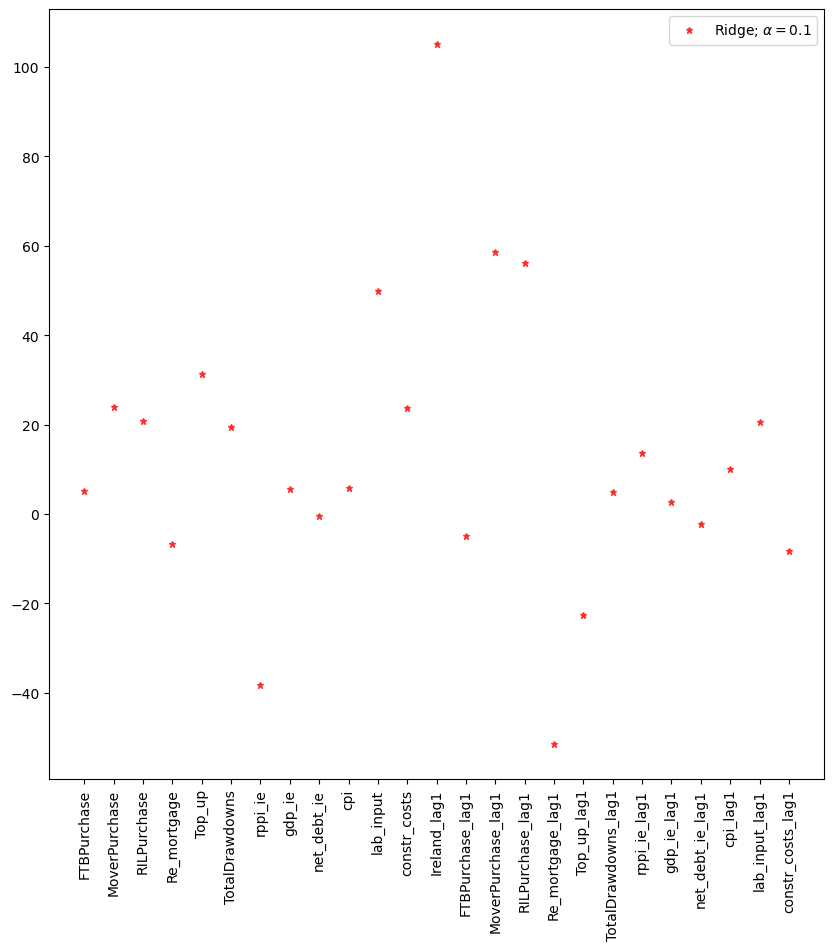

In [371]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,ridgeReg.coef_,
         alpha=0.7,linestyle='none',marker='*',
         markersize=5,color='red',label=r'Ridge; $\alpha = 0.1$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [375]:
ridge_vars = X.columns
ridge_feats = list(ridgeReg.coef_)
ridge_imp = pd.DataFrame()
ridge_imp['Variables'] = ridge_vars
ridge_imp['Ridge'] = ridge_feats

In [377]:
feat_imp_1 = feat_imp.merge(ridge_imp, 
                                     on='Variables', how='left')

In [374]:
list(ridgeReg.coef_)

array([  5.06881906,  23.91834163,  20.75546977,  -6.70877081,
        31.31569119,  19.48585028, -38.19728274,   5.56622005,
        -0.5218912 ,   5.77472708,  49.92358135,  23.73783963,
       105.09188065,  -4.81783148,  58.64670815,  56.14235089,
       -51.4682954 , -22.62852639,   4.90351745,  13.74928715,
         2.78766667,  -2.24697236,  10.13951006,  20.55814903,
        -8.22665405])

### Lasso Regression

In [379]:
X = ie_df_model.drop(['Ireland', 'time'], axis = 1)
y = ie_df_model.Ireland

In [380]:
X = X.iloc[1:,:]
y = y[1:]

In [381]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [382]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2,random_state=600)

In [383]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 20)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'alpha': [.1,1,5,10,20,25]}]


# step-3: perform grid search
# 3.1 specify model
lasso = Lasso()
            
# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
             estimator=Lasso(), param_grid=[{'alpha': [0.1, 1, 5, 10, 20, 25]}],
             return_train_score=True, scoring='r2', verbose=1)

In [384]:
print("Best hyperparameters: ", model_cv.best_params_)
print("Best score: ", model_cv.best_score_)

Best hyperparameters:  {'alpha': 0.1}
Best score:  0.975780704614664


In [385]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso

#Ridge Regression Model
lassoReg = Lasso(alpha=0.1)

lassoReg.fit(X_train,y_train)

Lasso(alpha=0.1)

In [386]:
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % lassoReg.score(X_test, y_test))
#
# Create the root mean squared error
#
mse = np.sqrt(mean_squared_error(y_test, lassoReg.predict(X_test)))
print("The root mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.974
The root mean squared error (MSE) on test set: 11.3693


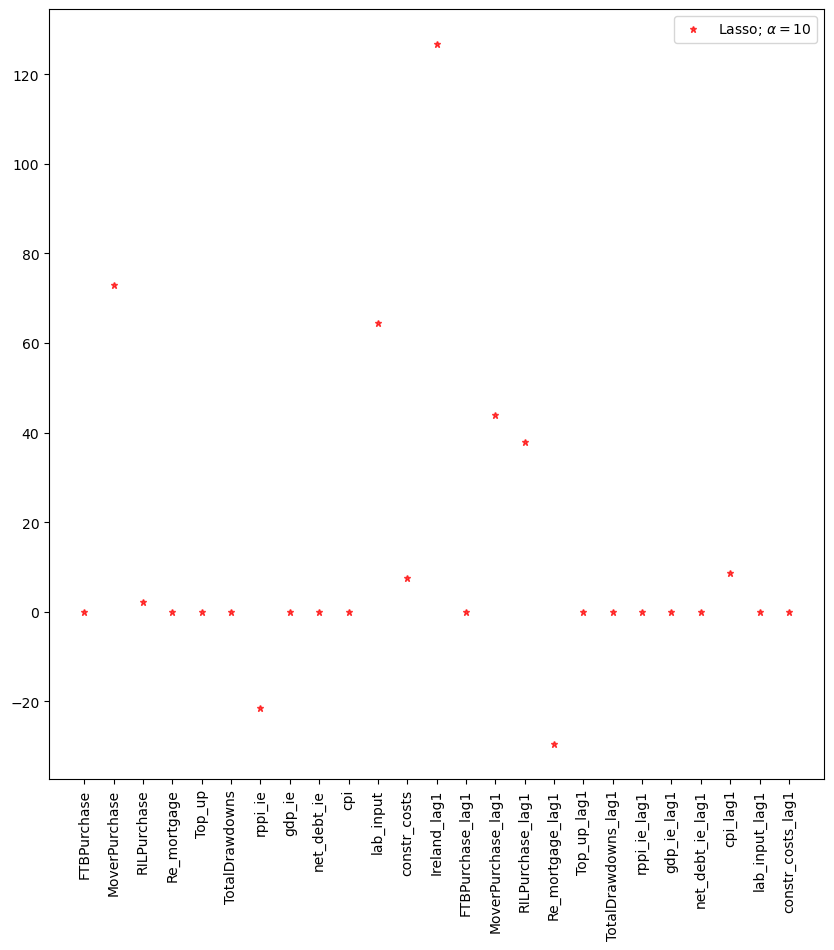

In [387]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,lassoReg.coef_,
         alpha=0.7,linestyle='none',marker='*',
         markersize=5,color='red',label=r'Lasso; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [389]:
lasso_vars = X.columns
lasso_feats = list(lassoReg.coef_)
lasso_imp = pd.DataFrame()
lasso_imp['Variables'] = lasso_vars
lasso_imp['Lasso'] = lasso_feats

In [390]:
feat_imp_2 = feat_imp_1.merge(lasso_imp, 
                                     on='Variables', how='left')

### Elastic Net Model

In [392]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [393]:
X = ie_df_model.drop(['Ireland', 'time'], axis = 1)
y = ie_df_model.Ireland

In [394]:
X = X.iloc[1:,:]
y = y[1:]

In [395]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.2,random_state=109)

In [397]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

model = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='r2', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train, y_train)
# summarize
print('Best accuracy: %.3f' % results.best_score_)
print('Parameters: %s' % results.best_params_)

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.896e+03, tolerance: 4.337e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.692e+03, tolerance: 4.083e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of 

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.894e+03, tolerance: 4.337e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.389e+03, tolerance: 4.224e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.259e+03, tolerance: 4.149e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.816e+03, tolerance: 4.124e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.508e+03, tolerance: 4.047e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.250e+03, tolerance: 4.149e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.886e+03, tolerance: 4.183e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.419e+03, tolerance: 4.339e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, 

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.575e+03, tolerance: 4.138e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.575e+03, tolerance: 4.138e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.402e+03, tolerance: 4.339e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.346e+03, tolerance: 4.224e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+03, tolerance: 4.124e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.479e+03, tolerance: 4.047e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.216e+03, tolerance: 3.586e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.876e+03, tolerance: 3.842e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.142e+03, tolerance: 3.586e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.669e+03, tolerance: 4.224e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.061e+03, tolerance: 3.586e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.751e+03, tolerance: 3.822e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.439e+03, tolerance: 4.090e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.962e+03, tolerance: 4.337e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.908e+03, tolerance: 3.586e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.272e+03, tolerance: 4.090e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.771e+03, tolerance: 3.934e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e+03, tolerance: 4.138e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.469e+03, tolerance: 4.047e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.504e+03, tolerance: 3.586e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, 

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.001e+03, tolerance: 4.337e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.410e+03, tolerance: 3.586e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.079e+03, tolerance: 3.586e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.739e+03, tolerance: 3.934e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.679e+03, tolerance: 4.124e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.501e+03, tolerance: 4.149e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.606e+03, tolerance: 4.183e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.108e+03, tolerance: 4.339e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.570e+03, tolerance: 4.224e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.153e+03, tolerance: 3.586e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.591e+03, tolerance: 4.138e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.429e+03, tolerance: 3.919e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e+02, tolerance: 4.339e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.828e+01, tolerance: 4.047e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.593e+02, tolerance: 4.339e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.223e+01, tolerance: 4.090e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.238e+02, tolerance: 4.224e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.047e+02, tolerance: 4.124e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.206e+02, tolerance: 3.919e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.970e+04, tolerance: 3.934e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.663e+02, tolerance: 4.090e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.802e+02, tolerance: 3.586e+01
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider

 of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+03, tolerance: 4.124e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.184e+03, tolerance: 4.149e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.476e+03, tolerance: 4.047e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+03, tolerance: 4.083e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of 

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.721e+03, tolerance: 3.934e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge w

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.799e+03, tolerance: 3.586e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You migh

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.184e+03, tolerance: 4.149e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.137e+03, tolerance: 3.919e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of 

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.852e+03, tolerance: 4.183e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You migh

/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
ers/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.947e+04, tolerance: 4.337e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increas

  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.852e+03, tolerance: 4.183e+01 Linear regression models with null weight for the l1 regularization term are more efficientl

  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/dylanmcdonald/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent wi

Best accuracy: 0.970
Parameters: {'alpha': 0.1, 'l1_ratio': 0.98}


In [398]:
model = ElasticNet(alpha=0.1,l1_ratio=0.98)
model.fit(X_train,y_train)

ElasticNet(alpha=0.1, l1_ratio=0.98)

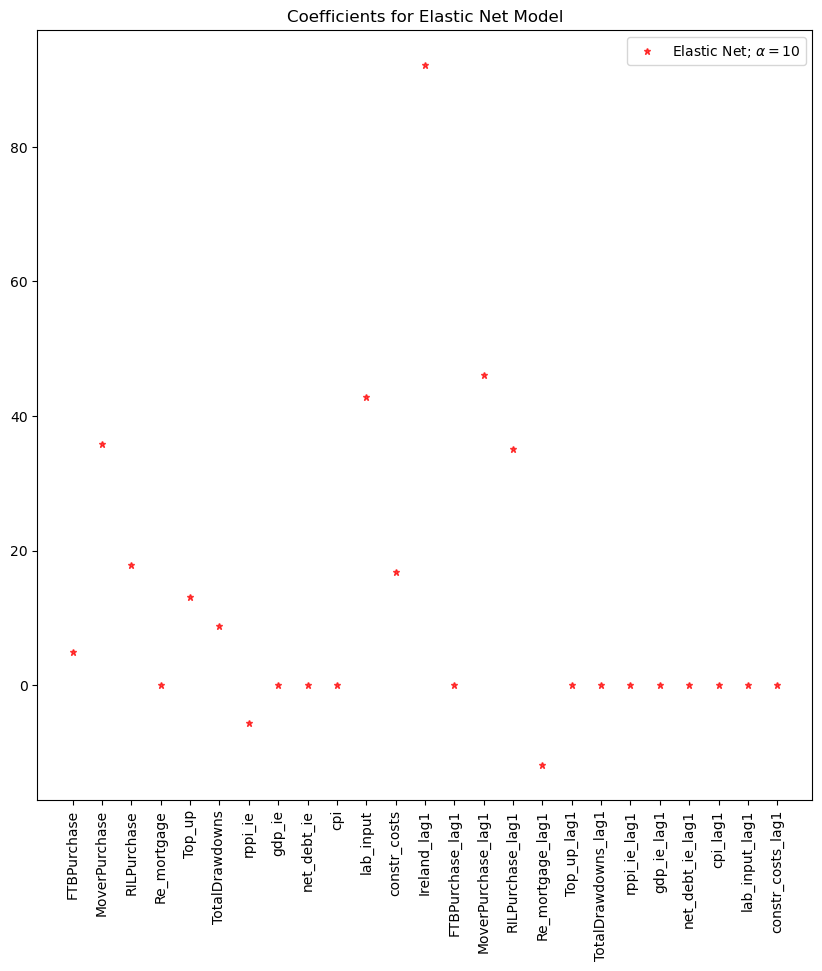

In [399]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(X.columns,model.coef_,alpha=0.7,
         linestyle='none',marker='*',markersize=5,
         color='red',label=r'Elastic Net; $\alpha = 10$',zorder=7)

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Coefficients for Elastic Net Model")
plt.show()

In [400]:
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % model.score(X_test, y_test))
#
# Create the root mean squared error
#
mse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("The root mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.974
The root mean squared error (MSE) on test set: 14.8018


In [402]:
el_vars = X.columns
el_feats = list(model.coef_)
el_imp = pd.DataFrame()
el_imp['Variables'] = el_vars
el_imp['Elastic_Net'] = el_feats

In [403]:
feat_imp_3 = feat_imp_2.merge(el_imp, 
                                     on='Variables', how='left')

In [404]:
feat_imp_3

Variables  Gradient_Boosting       Ridge       Lasso  \
0          rppi_ie_lag1           0.000454   13.749287   -0.000000   
1      Re_mortgage_lag1           0.000012  -51.468295  -29.531599   
2           Re_mortgage           0.002204   -6.708771    0.000000   
3          constr_costs           0.000002   23.737840    7.453903   
4           FTBPurchase           0.000081    5.068819    0.000000   
5     constr_costs_lag1           0.000005   -8.226654    0.000000   
6                gdp_ie           0.000252    5.566220   -0.000000   
7               rppi_ie           0.004133  -38.197283  -21.519897   
8                   cpi           0.000960    5.774727    0.000000   
9      FTBPurchase_lag1           0.001981   -4.817831   -0.000000   
10     net_debt_ie_lag1           0.000577   -2.246972   -0.000000   
11       lab_input_lag1           0.015571   20.558149   -0.000000   
12             cpi_lag1           0.000059   10.139510    8.609629   
13        MoverPurchase           0.000761   23.918342   72.932802   
14          gdp_ie_lag1           0.003860    2.787667   -0.000000   
15          RILPurchase           0.004790   20.755470    2.160288   
16  TotalDrawdowns_lag1           0.024477    4.903517    0.000000   
17            lab_input           0.019336   49.923581   64.519998   
18               Top_up           0.055362   31.315691    0.000000   
19   MoverPurchase_lag1           0.050067   58.646708   44.003703   
20          Top_up_lag1           0.159203  -22.628526   -0.000000   
21          net_debt_ie           0.067087   -0.521891   -0.000000   
22     RILPurchase_lag1           0.130506   56.142351   37.982521   
23         Ireland_lag1           0.168462  105.091881  126.695594   
24       TotalDrawdowns           0.289797   19.485850    0.000000   

    Elastic_Net  
0     -0.000000  
1    -11.898224  
2     -0.000000  
3     16.886416  
4      4.979333  
5      0.000000  
6      0.000000  
7     -5.608525  
8      0.000000  
9      0.000000  
10     0.000000  
11     0.000000  
12     0.000000  
13    35.790813  
14    -0.000000  
15    17.864681  
16     0.000000  
17    42.858014  
18    13.076935  
19    46.091935  
20     0.000000  
21     0.000000  
22    35.041629  
23    92.150830  
24     8.739827

### Neural Network

In [169]:
# Set random seed
np.random.seed(0)

In [170]:
X = ie_df_model.drop(['Value', 'time'], axis = 1)
y = ie_df_model.Value

In [171]:
X = X.iloc[1:,:]
y = y[1:]

In [172]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.1,random_state=109)

In [176]:
# Load libraries
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [193]:
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [197]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [198]:
def create_model(optimizer='adam', activation='relu', neurons=50):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])
    return model

model = KerasRegressor(build_fn=create_model, epochs=50, batch_size=5, verbose=0)

param_grid = dict()

param_grid['optimizer'] = ['adam', 'rmsprop', 'sgd']
param_grid['activation'] = ['relu', 'sigmoid', 'tanh']
param_grid['neurons'] = [50,100,150,200,250]

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X_train, y_train)

#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: -459.675064 using {'activation': 'relu', 'neurons': 50, 'optimizer': 'adam'}
-459.675064 (165.112305) with: {'activation': 'relu', 'neurons': 50, 'optimizer': 'adam'}
-376.599966 (104.788978) with: {'activation': 'relu', 'neurons': 50, 'optimizer': 'rmsprop'}
nan (nan) with: {'activation': 'relu', 'neurons': 50, 'optimizer': 'sgd'}
-366.119479 (110.595235) with: {'activation': 'relu', 'neurons': 100, 'optimizer': 'adam'}
-318.991608 (86.635529) with: {'activation': 'relu', 'neurons': 100, 'optimizer': 'rmsprop'}
nan (nan) with: {'activation': 'relu', 'neurons': 100, 'optimizer': 'sgd'}
-323.527875 (71.935768) with: {'activation': 'relu', 'neurons': 150, 'optimizer': 'adam'}
-332.799280 (62.913059) with: {'activation': 'relu', 'neurons': 150, 'optimizer': 'rmsprop'}
nan (nan) with: {'activation': 'relu', 'neurons': 150, 'optimizer': 'sgd'}
-295.568896 (95.215302) with: {'activation': 'relu', 'neurons': 200, 'optimizer': 'adam'}
-298.399872 (97.466109) with: {'activation': 'relu', 

In [200]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -459.675064 using {'activation': 'relu', 'neurons': 50, 'optimizer': 'adam'}


In [ ]:
def create_model(optimizer='adam', activation='relu', neurons=50):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer,metrics=['mse'])
    return model

In [201]:
model = Sequential()
model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

In [203]:
# Train neural network
history = model.fit(X_train, # Features
                      y_train, # Target
                      epochs = 50, # Three epochs
                      verbose = 0, # No output
                      batch_size = 5, # Number of observations per batch
                      validation_data = (X_test, y_test)) # Test data

In [213]:
scores = model.evaluate(X_train, y_train)
print("Training RMSE:.2f%%\n" + str((np.sqrt(scores[1]))))

scores = model.evaluate(X_test, y_test)
print("Testing RMSE:.2f%%\n" + str((np.sqrt(scores[1]))))

3/3 [==============================] - 0s 8ms/step - loss: 313.5144 - mse: 313.5144
Training RMSE:.2f%%
17.706338831459572
1/1 [==============================] - 0s 103ms/step - loss: 401.2139 - mse: 401.2139
Testing RMSE:.2f%%
20.0303236915308


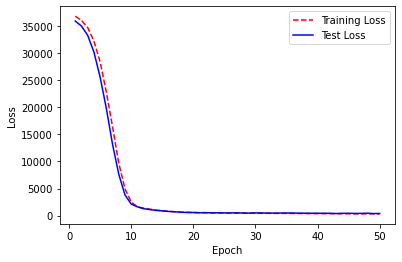

In [210]:
# Get training and test loss histories
training_loss = history.history["loss"]
test_loss = history.history["val_loss"]

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, "r--")
plt.plot(epoch_count, test_loss, "b-")
plt.legend(["Training Loss", "Test Loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

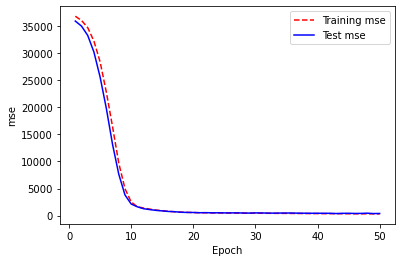

In [212]:
# Get training and test accuracy histories
training_accuracy = history.history["mse"]
test_accuracy = history.history["val_mse"]
plt.plot(epoch_count, training_accuracy, "r--")
plt.plot(epoch_count, test_accuracy, "b-")

# Visualize accuracy history
plt.legend(["Training mse", "Test mse"])
plt.xlabel("Epoch")
plt.ylabel("mse")
plt.show();

### Sentiment Analysis

In [184]:
#!pip install python-dotenv

In [309]:
import requests
from nltk.sentiment import SentimentIntensityAnalyzer
from bs4 import BeautifulSoup

In [8]:
!pip uninstall dotenv
!pip uninstall python-dotenv
!pip install python-dotenv
Y

Found existing installation: python-dotenv 1.0.0
Uninstalling python-dotenv-1.0.0:
  Would remove:
    /Users/dylanmcdonald/anaconda3/bin/dotenv
    /Users/dylanmcdonald/anaconda3/lib/python3.10/site-packages/dotenv/*
    /Users/dylanmcdonald/anaconda3/lib/python3.10/site-packages/python_dotenv-1.0.0.dist-info/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


NameError: name 'Y' is not defined

In [1]:
from dotenv import load_dotenv

# Library that has a lot of operating system functions
from os import getenv

ModuleNotFoundError: No module named 'dotenv'

In [2]:
CLIENT_ID = 'E4Hb2nQvsfbQ5rhdig7xvA'
SECRET_KEY = 'oARKtLEY5eCf3IOZULUV54fiISYQBQ'

In [5]:
# Library that let's us make http requests
import requests

# Sets up the authentication part of the request
auth = requests.auth.HTTPBasicAuth(CLIENT_ID,SECRET_KEY)

# Sets up the data we want to send: our login method (password), username, and password
data = {'grant_type': 'password',
        'username': 'Regular-Reality-2924',
        'password': 'Primrose115.'}

# Sets up this requests header info, which gives reddit a brief description of our app
# This is the format requested by Reddit: os:app_name:version (by /u/username)
headers = {'User-Agent': 'MyAPI/0.0.1'}

# Makes the request to the access_token api endpoint, and saves the response in res
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# Converts response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# Adds authorisation to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# While the token is valid (~2 hours) we can just add headers=headers to our requests to prove authentication
# Making a test request. <Response [200]> means that it was a success!
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [10]:
#res = requests.get("https://oauth.reddit.com/r/python/hot",
#                   headers=headers)
res = requests.get("https://oauth.reddit.com/search/?q=Construction%20Ireland")

print(res.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
CLIENT_ID = 'E4Hb2nQvsfbQ5rhdig7xvA'
SECRET_KEY = 'oARKtLEY5eCf3IOZULUV54fiISYQBQ'

In [ ]:
import requests

In [ ]:
auth = requests.auth.HTTPBasicAuth(CLIENT_ID,SECRET_KEY)

In [ ]:
with open('pw.txt', 'r') as f:
    pw = f.read()

In [ ]:
data = {
    'grant_type': 'password',
    'username': 'Regular-Reality-2924',
    'password': 'Primrose115.'
}

In [ ]:
headers = {'User-Agent': 'MyAPI/0.0.1'}

In [ ]:
res = requests.post('https://www.reddit.com/api/v1/access_token',
                   auth=auth, data=data, headers=headers)

In [ ]:
res

In [ ]:
TOKEN = res.json()['access_token']

In [ ]:
https://www.rte.ie/news/house-prices/?page=1

In [ ]:
num = ['1','2','3','4','5']

In [310]:
house_headlines = []
num = ['1','2','3','4','5']

for x in range(0,len(num)):
    url='https://www.rte.ie/news/residential-property-prices/?page='+num[x]
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    headlines = soup.find('body').find_all('h3')
    for y in range(0,len(headlines)-1):
        house_headlines.append(headlines[y].text.strip())

In [88]:
house_headlines

['Property price growth cools further to 3.9% in March',
 'Property price increases slow to 5% in February - CSO',
 'Home price growth slows to 6.1% in January - CSO',
 'Property price growth slows as Dublin prices fall',
 'Property price growth eases to 15-month low of 9.8%',
 'Property price growth slows to 10.8% in September - CSO',
 'Home prices equal 2007 peak for first time in June',
 'Home price growth slows for first time in 18 months',
 'Home price growth hits seven year high of 15.2% - CSO',
 'Property price growth reaches 15.3% in February - CSO',
 'Home prices see fastest rate of growth in 7 years',
 'Annual home price growth at highest level in six years',
 'Property prices rise by 14% in year to November - CSO',
 'Annual property prices jump by 13.5% in October - CSO',
 'Property prices jump 12.4% in year to September - CSO',
 'Home prices jump by 10.9% in year to August - CSO',
 'Property price growth hits 3 year high of 8.6% - CSO',
 'Residential property prices up by 5

In [311]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [91]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dylanmcdonald/nltk_data...


True

In [312]:
sia = SentimentIntensityAnalyzer()

In [313]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pprint import pprint

sia = SIA()
results = []

for line in house_headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results, width=100)

[{'compound': 0.3818,
  'headline': 'Property price growth cools further to 3.9% in March',
  'neg': 0.0,
  'neu': 0.755,
  'pos': 0.245},
 {'compound': 0.0,
  'headline': 'Property price increases slow to 5% in February - CSO',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.3818,
  'headline': 'Home price growth slows to 6.1% in January - CSO',
  'neg': 0.0,
  'neu': 0.755,
  'pos': 0.245},
 {'compound': 0.3818,
  'headline': 'Property price growth slows as Dublin prices fall',
  'neg': 0.0,
  'neu': 0.729,
  'pos': 0.271},
 {'compound': 0.4215,
  'headline': 'Property price growth eases to 15-month low of 9.8%',
  'neg': 0.162,
  'neu': 0.462,
  'pos': 0.377},
 {'compound': 0.3818,
  'headline': 'Property price growth slows to 10.8% in September - CSO',
  'neg': 0.0,
  'neu': 0.755,
  'pos': 0.245},
 {'compound': 0.0,
  'headline': 'Home prices equal 2007 peak for first time in June',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'compound': 0.3818,
  'headline': 'Home pri

In [320]:
import pandas as pd
df = pd.DataFrame.from_records(results)
df.head()

neg    neu    pos  compound  \
0  0.000  0.755  0.245    0.3818   
1  0.000  1.000  0.000    0.0000   
2  0.000  0.755  0.245    0.3818   
3  0.000  0.729  0.271    0.3818   
4  0.162  0.462  0.377    0.4215   

                                            headline  
0  Property price growth cools further to 3.9% in...  
1  Property price increases slow to 5% in Februar...  
2   Home price growth slows to 6.1% in January - CSO  
3  Property price growth slows as Dublin prices fall  
4  Property price growth eases to 15-month low of...

In [321]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    elif compound >= -0.05 and compound < 0.05:
        return "neutral"

In [322]:
df['sentiment'] = df['compound'].apply(lambda val: polarity_score(val))
df.head()

neg    neu    pos  compound  \
0  0.000  0.755  0.245    0.3818   
1  0.000  1.000  0.000    0.0000   
2  0.000  0.755  0.245    0.3818   
3  0.000  0.729  0.271    0.3818   
4  0.162  0.462  0.377    0.4215   

                                            headline sentiment  
0  Property price growth cools further to 3.9% in...  positive  
1  Property price increases slow to 5% in Februar...   neutral  
2   Home price growth slows to 6.1% in January - CSO  positive  
3  Property price growth slows as Dublin prices fall  positive  
4  Property price growth eases to 15-month low of...  positive

In [319]:
df['label'] = None
df.loc[df['compound'] > 0.5, 'label'] = 'Positive'
df.loc[df['compound'] < -0.5, 'label'] = 'Negative'
df.loc[df['compound'] > -0.5 & df['compound'] < 0.5, 'label'] = 'Neutral'
df.head()

TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

In [324]:
print("Positive headlines:\n")
pprint(list(df[df['sentiment'] == 'positive'].headline), width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['sentiment'] == 'negative'].headline), width=200)

Positive headlines:

['Property price growth cools further to 3.9% in March',
 'Home price growth slows to 6.1% in January - CSO',
 'Property price growth slows as Dublin prices fall',
 'Property price growth eases to 15-month low of 9.8%',
 'Property price growth slows to 10.8% in September - CSO',
 'Home price growth slows for first time in 18 months',
 'Home price growth hits seven year high of 15.2% - CSO',
 'Property price growth reaches 15.3% in February - CSO',
 'Home prices see fastest rate of growth in 7 years',
 'Annual home price growth at highest level in six years',
 'Property price growth hits 3 year high of 8.6% - CSO',
 'December house price growth hits 17-month high of 2.2%',
 'Home prices saw a return to growth in November - CSO',
 'Property prices see first monthly growth since January',
 'Residential property price growth slows to 0.9% - CSO',
 'Property prices see slowest growth in six years - CSO',
 'Annual house price growth rate cools slightly in May',
 'Residen

In [327]:
print(df.sentiment.value_counts())

print(df.sentiment.value_counts(normalize=True) * 100)

neutral     40
positive    33
Name: sentiment, dtype: int64
neutral     54.794521
positive    45.205479
Name: sentiment, dtype: float64


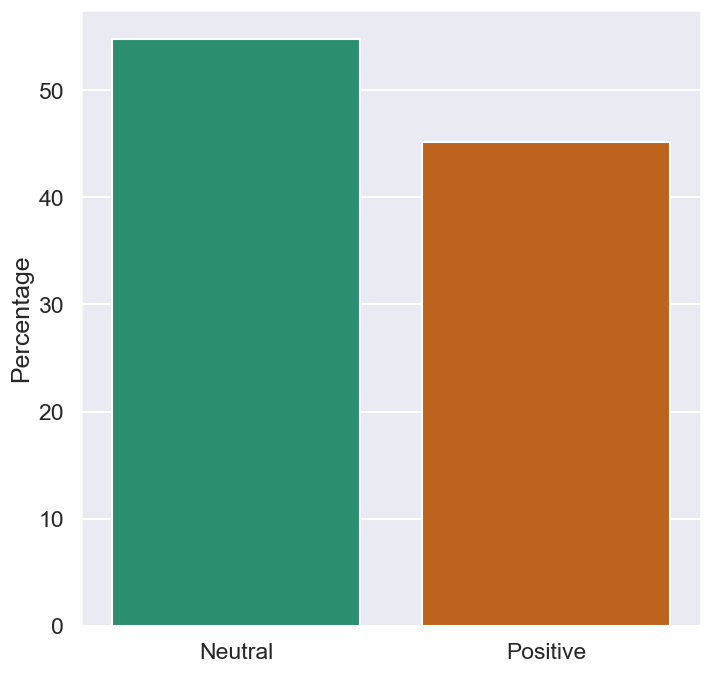

In [326]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.sentiment.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [93]:
title_sentiment_scores = sia.polarity_scores(house_headlines)
#text_sentiment_scores = sia.polarity_scores(thread_text)

AttributeError: 'list' object has no attribute 'encode'

In [82]:
house_headlines[0] = headlines[len(headlines)-1].text.strip()

IndexError: list assignment index out of range

In [77]:
headlines[0].text.strip()

'Property price increases slow to 5% in February - CSO'

In [63]:
headlines.text.strip()

AttributeError: ResultSet object has no attribute 'text'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

### Dashboard

In [547]:
pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 22.4 MB/s eta 0:00:0000:010:01
Note: you may need to restart the kernel to use updated packages.


In [80]:
list(labour_input_df.columns)

['European Union - 27 countries (from 2020)',
 'Euro area – 20 countries (from 2023)',
 'Germany (until 1990 former territory of the FRG)',
 'Ireland',
 'France',
 'United Kingdom',
 'Netherlands',
 'ind']

In [82]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd

df = labour_input_df
df_list = list(df.columns)

app = dash.Dash()

app.layout = html.Div([
    html.H1(children='Title of Dash App', style={'textAlign':'center'}),
    dcc.Dropdown(df_list, 'Ireland', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
])

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(value):
    dff = df[value]
    return px.line(dff, x='year', y='pop')

if __name__ == '__main__':
    app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


OSError: [Errno 48] Address already in use

In [93]:
ie_df_model

NameError: name 'ie_df_model' is not defined

In [270]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Load Data
df = ie_df_model
df_list = list(df.columns)
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "country",
        dcc.Dropdown(
            id='country-dropdown', clearable=False,
            value='Ireland', options=df_list)
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("country-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="ind", y="Ireland",
        render_mode="webgl", title="Ireland"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline')

Dash is running on http://127.0.0.1:8050/



ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8050): Max retries exceeded with url: /_alive_5c5dbd84-92f9-4b92-9e72-3aded5999e5c (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fb83a552ee0>: Failed to establish a new connection: [Errno 61] Connection refused'))

In [84]:
px.data.tips()

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [150]:
df

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [152]:
ie_df_new

Ireland  FTB Purchase  Mover Purchase  RIL Purchase  Re-mortgage  \
0   216.612217   8932.269704     9075.052727    5349.01221  3892.125232   
1   218.514305   8932.269704     9075.052727    5349.01221  3892.125232   
2   220.424981   8932.269704     9075.052727    5349.01221  3892.125232   
3   218.552402   8932.269704     9075.052727    5349.01221  3892.125232   
4   222.520017   8932.269704     9075.052727    5349.01221  3892.125232   
..         ...           ...             ...           ...          ...   
88  135.517776   5184.000000     2279.000000     191.00000  1762.000000   
89  131.527912   5994.000000     2476.000000     225.00000  2648.000000   
90  129.135626   6583.000000     3000.000000     187.00000  5081.000000   
91  125.102539   7435.000000     3034.000000     220.00000  5199.000000   
92  132.379112   6487.200000     2784.000000     214.40000  3326.600000   

         Top-up  Total Drawdowns  rppi_ie    gdp_ie  net_debt_ie    cpi  \
0   12945.45064     40193.910513   139.64   25587.0      30644.0   73.6   
1   12945.45064     40193.910513   139.64   26774.0      27129.0   75.2   
2   12945.45064     40193.910513   139.64   27420.0      25786.0   76.1   
3   12945.45064     40193.910513   139.64   28715.0      26892.0   76.9   
4   12945.45064     40193.910513   139.64   29812.0      25446.0   77.6   
..          ...              ...      ...       ...          ...    ...   
88    494.00000      9910.000000   159.90  117965.0     194105.0  109.6   
89    642.00000     11985.000000   163.40  120880.0     189952.0  113.1   
90    605.60000     14851.000000   167.70  133964.0     187033.0  113.8   
91    629.60000     15888.000000   168.80  129774.0     185391.0  115.8   
92   3061.40000     13186.600000   166.20  122258.6     189853.8  118.0   

    lab_input  constr_costs     time  
0      112.80          60.2  2000-Q1  
1      117.60          63.7  2000-Q2  
2      123.80          66.4  2000-Q3  
3      126.00          69.2  2000-Q4  
4      126.90          73.9  2001-Q1  
..        ...           ...      ...  
88     165.40         122.0  2022-Q1  
89     168.30         126.5  2022-Q2  
90     176.70         130.5  2022-Q3  
91     168.50         131.4  2022-Q4  
92     168.52         133.2  2023-Q1  

[93 rows x 14 columns]

In [157]:
ie_df_new

Ireland  FTB Purchase  Mover Purchase  RIL Purchase  Re-mortgage  \
0   216.612217   8932.269704     9075.052727    5349.01221  3892.125232   
1   218.514305   8932.269704     9075.052727    5349.01221  3892.125232   
2   220.424981   8932.269704     9075.052727    5349.01221  3892.125232   
3   218.552402   8932.269704     9075.052727    5349.01221  3892.125232   
4   222.520017   8932.269704     9075.052727    5349.01221  3892.125232   
..         ...           ...             ...           ...          ...   
88  135.517776   5184.000000     2279.000000     191.00000  1762.000000   
89  131.527912   5994.000000     2476.000000     225.00000  2648.000000   
90  129.135626   6583.000000     3000.000000     187.00000  5081.000000   
91  125.102539   7435.000000     3034.000000     220.00000  5199.000000   
92  132.379112   6487.200000     2784.000000     214.40000  3326.600000   

         Top-up  Total Drawdowns  rppi_ie    gdp_ie  net_debt_ie    cpi  \
0   12945.45064     40193.910513   139.64   25587.0      30644.0   73.6   
1   12945.45064     40193.910513   139.64   26774.0      27129.0   75.2   
2   12945.45064     40193.910513   139.64   27420.0      25786.0   76.1   
3   12945.45064     40193.910513   139.64   28715.0      26892.0   76.9   
4   12945.45064     40193.910513   139.64   29812.0      25446.0   77.6   
..          ...              ...      ...       ...          ...    ...   
88    494.00000      9910.000000   159.90  117965.0     194105.0  109.6   
89    642.00000     11985.000000   163.40  120880.0     189952.0  113.1   
90    605.60000     14851.000000   167.70  133964.0     187033.0  113.8   
91    629.60000     15888.000000   168.80  129774.0     185391.0  115.8   
92   3061.40000     13186.600000   166.20  122258.6     189853.8  118.0   

    lab_input  constr_costs     time  
0      112.80          60.2  2000-Q1  
1      117.60          63.7  2000-Q2  
2      123.80          66.4  2000-Q3  
3      126.00          69.2  2000-Q4  
4      126.90          73.9  2001-Q1  
..        ...           ...      ...  
88     165.40         122.0  2022-Q1  
89     168.30         126.5  2022-Q2  
90     176.70         130.5  2022-Q3  
91     168.50         131.4  2022-Q4  
92     168.52         133.2  2023-Q1  

[93 rows x 14 columns]

In [411]:
feat_imp_3[['Variables', 'Ridge']]

Variables       Ridge
0          rppi_ie_lag1   13.749287
1      Re_mortgage_lag1  -51.468295
2           Re_mortgage   -6.708771
3          constr_costs   23.737840
4           FTBPurchase    5.068819
5     constr_costs_lag1   -8.226654
6                gdp_ie    5.566220
7               rppi_ie  -38.197283
8                   cpi    5.774727
9      FTBPurchase_lag1   -4.817831
10     net_debt_ie_lag1   -2.246972
11       lab_input_lag1   20.558149
12             cpi_lag1   10.139510
13        MoverPurchase   23.918342
14          gdp_ie_lag1    2.787667
15          RILPurchase   20.755470
16  TotalDrawdowns_lag1    4.903517
17            lab_input   49.923581
18               Top_up   31.315691
19   MoverPurchase_lag1   58.646708
20          Top_up_lag1  -22.628526
21          net_debt_ie   -0.521891
22     RILPurchase_lag1   56.142351
23         Ireland_lag1  105.091881
24       TotalDrawdowns   19.485850

In [422]:
import plotly.graph_objs as go

In [431]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Load Data
df = ie_df_new
df2 = feat_imp_3
# Build App
app = JupyterDash(__name__)
app.layout = html.Div(children = [
    html.Div([
    html.H1("Key Macro Indicators - Ireland"),
        html.Div(children='''Dash: First graph'''),
    dcc.Graph(id='graph'),
    html.Label([
        "country",
        dcc.Dropdown(
            id='country-dropdown', clearable=False,
            value='Ireland', options=
                list(df.columns[0:len(ie_df_new.columns)-1]))
    ]),
]),

html.Div([
    html.H3("Important Features from ML Models - Construction Production Ireland"),
    html.Div('''Dash: Second graph'''),
    dcc.Graph(id='graph1'),
    html.Label([
        "model",
        dcc.Dropdown(
            id='model-dropdown', clearable=False,
            value='Lasso', options=
                list(df2.columns[1:len(ie_df_new.columns)]))
    ]),
]),
])

@app.callback(
Output('graph', 'figure'),
    [Input('country-dropdown', 'value')])

def update_graph(country):
    return px.line(
        df, x="time", y=country,
        render_mode="webgl", title=country)
#    return px.bar(
 #       df3, x="Variables", y=model,title=country
  #  )

@app.callback(
    Output('graph1','figure'),
    [Input('model-dropdown','value')])

def update_graph2(model):
    fig2 = go.Figure(data=[go.Bar(x=df2['Variables'], y=df2[model])])
    return(fig2)
    #return px.bar(df2, x='Variables', y =model, title = model)

# Define callback to update graph
#@app.callback(
 #   Output('graph', 'figure'),
  #  [Input("country-dropdown", "value")]
#)
#def update_figure(country):
 #   return px.line(
  #      df, x="time", y=country,
   #     render_mode="webgl", title=country
    #)

#@app.callback(
 #   Output('graph1', 'figure'),
  #  [Input("model-dropdown", "value")]
#)
#def update_bar(model):
 #   df3 = df2[['Variables', model]] 
  #  return px.bar(
   #     df3, x="Variables", y=model,title=country
    #)
# Run app and display result inline in the notebook
app.run_server(mode='inline', debug=False)

Dash is running on http://127.0.0.1:8050/



 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [26/May/2023 03:05:50] "GET /_alive_7d541832-9d3b-47b0-9335-62c2bc57850b HTTP/1.1" 200 -


127.0.0.1 - - [26/May/2023 03:05:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 03:05:51] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 03:05:51] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 03:05:51] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 03:05:51] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 03:05:51] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 03:05:51] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 03:05:51] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 03:06:01] "POST /_dash-update-component HTTP/1.1" 200 -


In [156]:
list(ie_df_new.columns[0:6])

['Ireland',
 'FTB Purchase',
 'Mover Purchase',
 'RIL Purchase',
 'Re-mortgage',
 'Top-up']

In [149]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "country",
        dcc.Dropdown(
            id='country-dropdown', clearable=False,
            value='Ireland', options=[
                list(df.columns[0:6])
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        df, x="total_bill", y="tip", color="size",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline', debug=False)

Dash is running on http://127.0.0.1:8050/



 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [26/May/2023 01:38:56] "GET /_alive_7d541832-9d3b-47b0-9335-62c2bc57850b HTTP/1.1" 200 -


127.0.0.1 - - [26/May/2023 01:38:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 01:38:56] "GET /_dash-component-suites/dash/deps/react@16.v2_10_0m1685059800.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 01:38:56] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_10_0m1685059800.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 01:38:56] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_10_0m1685059800.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 01:38:56] "GET /_dash-component-suites/dash/dash-renderer/build/dash_renderer.v2_10_0m1685059800.min.js HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 01:38:56] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 01:38:56] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 01:38:56] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [26/May/2023 01:38:56] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [26/May/20